In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Raw data sets(./Data/source_data) have been cleansed/transformed through this notebook to output consolidated data files(./Data) used for regression modeling (pumpkin_consol.csv)

# Pumpkin Dataset Exploratory Data Analysis

In [2]:
pumpkins_raw = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-19/pumpkins.csv")

In [3]:
pumpkins_raw

,id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,pct_chart,variety
0,2013-F,1,154.50,"Ellenbecker, Todd & Sequoia",Gleason,Wisconsin,United States,Nekoosa Giant Pumpkin Fest,209 Werner,Self,184.0,129.00,20.0,NaN
1,2013-F,2,146.50,"Razo, Steve",New Middletown,Ohio,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,150.5 Snyder,NaN,194.0,151.00,-3.0,NaN
2,2013-F,3,145.00,"Ellenbecker, Todd & Sequoia",Glenson,Wisconsin,United States,Mishicot Pumpkin Fest,209 Werner,103 Mackinnon,177.0,115.00,26.0,NaN
3,2013-F,4,140.80,"Martin, Margaret & Glen",Combined Locks,Wisconsin,United States,Cedarburg Wine and Harvest Festival,109 Martin '12,209 Werner '12,194.0,151.00,-7.0,NaN
4,2013-F,5,139.00,"Barlow, John",NaN,Wisconsin,United States,Stillwater Harvestfest,130.5 McKinnon,open,0.0,0.00,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28060,2021-W,DMG,159.50,"Huber, Brandon",Raleigh,North Carolina,United States,Yadkin Valley Pumpkin Weigh-off,330 Vial,NaN,175.0,152.00,5.0,NaN
28061,2021-W,DMG,141.00,"Vester, Danny",Spring Hope,North Carolina,United States,Tennessee Valley Fair,305 Vial,NaN,169.0,139.00,1.0,NaN
28062,2021-W,DMG,116.50,"bradley, jeffrey",rocky mount,North Carolina,United States,Spring Hope National Pumpkin Festival,unknow,NaN,159.0,116.00,0.0,NaN
28063,2021-W,DMG,16.30,"Kyro, Anni",Orimattila,Paijanne Tavastia,Finland,Finnish Weigh-off,var. Carolina Cross -20,NaN,0.0,0.00,0.0,NaN


In [4]:
pumpkins_raw.shape

(28065, 14)

In [5]:
pumpkins_raw.columns

Index(['id', 'place', 'weight_lbs', 'grower_name', 'city', 'state_prov',
       'country', 'gpc_site', 'seed_mother', 'pollinator_father', 'ott',
       'est_weight', 'pct_chart', 'variety'],
      dtype='object')

In [6]:
pumpkins = pumpkins_raw.drop([
    "grower_name",
    "gpc_site",
    "seed_mother",
    "pollinator_father",
    "pct_chart",
    "variety"
], axis=1)

pumpkins

,id,place,weight_lbs,city,state_prov,country,ott,est_weight
0,2013-F,1,154.50,Gleason,Wisconsin,United States,184.0,129.00
1,2013-F,2,146.50,New Middletown,Ohio,United States,194.0,151.00
2,2013-F,3,145.00,Glenson,Wisconsin,United States,177.0,115.00
3,2013-F,4,140.80,Combined Locks,Wisconsin,United States,194.0,151.00
4,2013-F,5,139.00,NaN,Wisconsin,United States,0.0,0.00
...,...,...,...,...,...,...,...,...
28060,2021-W,DMG,159.50,Raleigh,North Carolina,United States,175.0,152.00
28061,2021-W,DMG,141.00,Spring Hope,North Carolina,United States,169.0,139.00
28062,2021-W,DMG,116.50,rocky mount,North Carolina,United States,159.0,116.00
28063,2021-W,DMG,16.30,Orimattila,Paijanne Tavastia,Finland,0.0,0.00


In [7]:
pumpkins[pumpkins.country == "United States"].state_prov.value_counts()

Wisconsin         1910
California        1211
Ohio              1190
Michigan          1128
Washington        1117
Pennsylvania       992
Oregon             873
New York           802
Minnesota          708
Indiana            674
Colorado           604
Iowa               599
Utah               518
Connecticut        459
North Carolina     427
Massachusetts      415
Vermont            381
Kentucky           345
Maine              332
Rhode Island       308
Tennessee          251
New Hampshire      219
South Dakota       201
Illinois           192
Missouri           165
Virginia           145
Arkansas           131
West Virginia       89
Wyoming             85
Kansas              78
Alabama             75
Nebraska            69
Alaska              61
Oklahoma            61
Idaho               42
North Dakota        42
Montana             35
Georgia             29
Louisiana           25
New Jersey          22
Arizona             12
Texas               10
South Carolina       9
Nevada     

In [8]:
us_pumpkins = pumpkins[pumpkins.country == "United States"]
us_pumpkins.reset_index()
us_pumpkins.city = us_pumpkins.city.str.title()
us_pumpkins.state_prov = us_pumpkins.state_prov.str.title()

us_pumpkins

/Users/ericellestad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id,place,weight_lbs,city,state_prov,country,ott,est_weight
0,2013-F,1,154.50,Gleason,Wisconsin,United States,184.0,129.00
1,2013-F,2,146.50,New Middletown,Ohio,United States,194.0,151.00
2,2013-F,3,145.00,Glenson,Wisconsin,United States,177.0,115.00
3,2013-F,4,140.80,Combined Locks,Wisconsin,United States,194.0,151.00
4,2013-F,5,139.00,NaN,Wisconsin,United States,0.0,0.00
...,...,...,...,...,...,...,...,...
28058,2021-W,230,2.50,Garner,North Carolina,United States,42.0,0.00
28059,2021-W,DMG,181.00,Bailey,North Carolina,United States,185.0,180.00
28060,2021-W,DMG,159.50,Raleigh,North Carolina,United States,175.0,152.00
28061,2021-W,DMG,141.00,Spring Hope,North Carolina,United States,169.0,139.00


In [9]:
us_pumpkins.place.value_counts()

EXH     1191
DMG      309
30        46
108       46
16        45
        ... 
1701       1
1521       1
1704       1
1633       1
1410       1
Name: place, Length: 1748, dtype: int64

In [10]:
# filter out "EXH" and "DMG" in "place" which are unofficial or invalid entries

us_pumpkins.place = pd.to_numeric(us_pumpkins.place, errors='coerce')
us_pumpkins[us_pumpkins.place.isna()]

/Users/ericellestad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id,place,weight_lbs,city,state_prov,country,ott,est_weight
12,2013-F,NaN,130.50,Saegertown,Pennsylvania,United States,182.0,125.00
35,2013-F,NaN,115.50,Bessemer,Pennsylvania,United States,0.0,0.00
59,2013-F,NaN,106.00,Tenino,Washington,United States,0.0,0.00
60,2013-F,NaN,106.00,Huntsburg,Ohio,United States,0.0,0.00
64,2013-F,NaN,105.00,Oswego,New York,United States,169.0,100.00
...,...,...,...,...,...,...,...,...
28015,2021-W,NaN,52.50,Kernersville,North Carolina,United States,115.0,46.00
28059,2021-W,NaN,181.00,Bailey,North Carolina,United States,185.0,180.00
28060,2021-W,NaN,159.50,Raleigh,North Carolina,United States,175.0,152.00
28061,2021-W,NaN,141.00,Spring Hope,North Carolina,United States,169.0,139.00


In [11]:
us_pumpkins = us_pumpkins[us_pumpkins.place.notnull()]
us_pumpkins.reset_index()
us_pumpkins

,id,place,weight_lbs,city,state_prov,country,ott,est_weight
0,2013-F,1.0,154.50,Gleason,Wisconsin,United States,184.0,129.00
1,2013-F,2.0,146.50,New Middletown,Ohio,United States,194.0,151.00
2,2013-F,3.0,145.00,Glenson,Wisconsin,United States,177.0,115.00
3,2013-F,4.0,140.80,Combined Locks,Wisconsin,United States,194.0,151.00
4,2013-F,5.0,139.00,NaN,Wisconsin,United States,0.0,0.00
...,...,...,...,...,...,...,...,...
28050,2021-W,222.0,16.00,Plankinton,South Dakota,United States,86.0,21.00
28052,2021-W,224.0,9.30,NaN,Utah,United States,0.0,0.00
28055,2021-W,227.0,6.00,Fond Du Lac,Wisconsin,United States,0.0,0.00
28057,2021-W,229.0,5.00,Fond Du Lac,Wisconsin,United States,0.0,0.00


In [12]:
us_pumpkins.weight_lbs.value_counts()

77.00       32
101.00      31
110.00      30
104.00      30
76.00       29
            ..
1,975.00     1
397.50       1
1,684.50     1
287.60       1
121.13       1
Name: weight_lbs, Length: 4572, dtype: int64

In [13]:
# Strip commas from weight_lbs, convert to number, and confirm all values are numeric

us_pumpkins.weight_lbs = us_pumpkins.weight_lbs.str.replace(',', '')
us_pumpkins.weight_lbs = pd.to_numeric(us_pumpkins.weight_lbs, errors='coerce')
us_pumpkins[us_pumpkins.weight_lbs.isna()].count()

/Users/ericellestad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


id            0
place         0
weight_lbs    0
city          0
state_prov    0
country       0
ott           0
est_weight    0
dtype: int64

In [14]:
us_pumpkins.est_weight.value_counts()

0.00        3281
1,170.00      40
1,187.00      39
1,002.00      38
1,338.00      38
            ... 
879.00         1
1,004.00       1
19.00          1
644.00         1
2,075.00       1
Name: est_weight, Length: 1180, dtype: int64

In [15]:
us_pumpkins.est_weight.isna().sum()

1623

In [16]:
# Strip commas from est_weight, convert to number, and confirm all values are numeric

us_pumpkins.est_weight = us_pumpkins.est_weight.str.replace(',', '')
us_pumpkins.est_weight = pd.to_numeric(us_pumpkins.est_weight, errors='coerce')
us_pumpkins[us_pumpkins.est_weight.isna()]

,id,place,weight_lbs,city,state_prov,country,ott,est_weight
2334,2013-T,5.0,5.59,Sharpsville,Pennsylvania,United States,NaN,NaN
2336,2013-T,6.0,5.33,Combined Locks,Wisconsin,United States,NaN,NaN
2341,2013-T,11.0,5.08,Snegertown,Pennsylvania,United States,NaN,NaN
2342,2013-T,11.0,5.08,Snegertown,Pennsylvania,United States,NaN,NaN
2344,2013-T,14.0,4.93,Seymour,Wisconsin,United States,NaN,NaN
...,...,...,...,...,...,...,...,...
27800,2021-T,334.0,0.44,Centennial,Colorado,United States,NaN,NaN
27801,2021-T,335.0,0.33,Centennial,Colorado,United States,NaN,NaN
27802,2021-T,336.0,0.32,Billings,Missouri,United States,NaN,NaN
27803,2021-T,337.0,0.28,Barrington,New Hampshire,United States,NaN,NaN


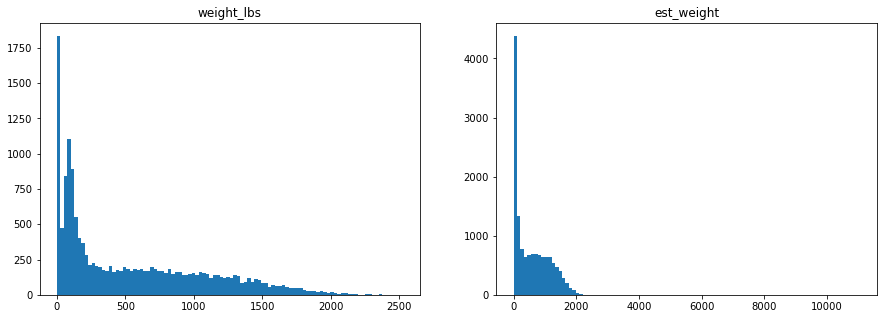

In [17]:
# Evaluate weight_lbs and est_weight

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].hist(us_pumpkins.weight_lbs, bins=100)
ax[0].set_title("weight_lbs")
ax[1].hist(us_pumpkins.est_weight, bins=100)
ax[1].set_title("est_weight")
plt.show()

In [18]:
# find outlier record
us_pumpkins[us_pumpkins.est_weight > 2500]

,id,place,weight_lbs,city,state_prov,country,ott,est_weight
20983,2019-P,1282.0,316.0,Littleton,Colorado,United States,1132.0,11033.0


In [19]:
us_pumpkins.loc[20983, "est_weight"] = np.nan
us_pumpkins.loc[20983]

/Users/ericellestad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


id                   2019-P
place                  1282
weight_lbs              316
city              Littleton
state_prov         Colorado
country       United States
ott                  1132.0
est_weight              NaN
Name: 20983, dtype: object

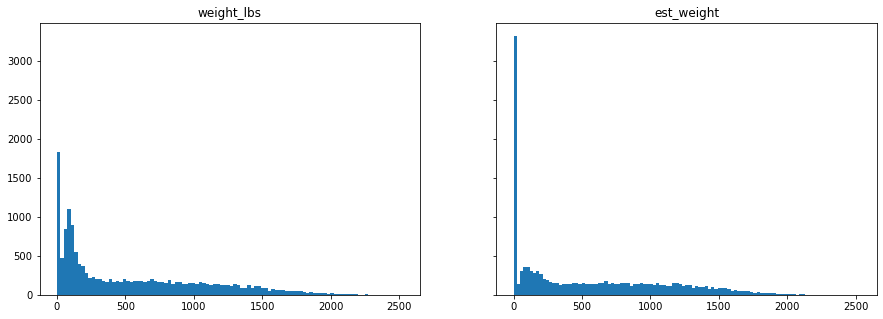

In [20]:
# Evaluate weight_lbs and est_weight after omitting outlier

fig, ax = plt.subplots(1,2, figsize=(15,5), sharex=True, sharey=True)

ax[0].hist(us_pumpkins.weight_lbs, bins=100)
ax[0].set_title("weight_lbs")
ax[1].hist(us_pumpkins.est_weight, bins=100)
ax[1].set_title("est_weight")
plt.show()

In [21]:
us_pumpkins.id.unique()

array(['2013-F', '2013-L', '2013-P', '2013-S', '2013-T', '2013-W',
       '2014-F', '2014-L', '2014-P', '2014-S', '2014-T', '2014-W',
       '2015-F', '2015-L', '2015-P', '2015-S', '2015-T', '2015-W',
       '2016-F', '2016-L', '2016-P', '2016-S', '2016-T', '2016-W',
       '2017-F', '2017-L', '2017-P', '2017-S', '2017-T', '2017-W',
       '2018-F', '2018-L', '2018-P', '2018-S', '2018-T', '2018-W',
       '2019-F', '2019-L', '2019-P', '2019-S', '2019-T', '2019-W',
       '2020-F', '2020-L', '2020-P', '2020-S', '2020-T', '2020-W',
       '2021-F', '2021-L', '2021-P', '2021-S', '2021-T', '2021-W'],
      dtype=object)

In [22]:
us_pumpkins.loc[:,"year"] = us_pumpkins.loc[:,"id"].str[:4]
us_pumpkins.year.unique()

/Users/ericellestad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ericellestad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


array(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'], dtype=object)

In [23]:
us_pumpkins.loc[:,"type"] = us_pumpkins.loc[:,"id"].str[-1]
us_pumpkins.type.unique()

array(['F', 'L', 'P', 'S', 'T', 'W'], dtype=object)

In [24]:
types = {
    "F" : "Field Pumpkin",
    "P" : "Giant Pumpkin", 
    "S" : "Giant Squash", 
    "W" : "Giant Watermelon", 
    "L" : "Long Gourd", #(length in inches, not weight in pounds) 
    "T" : "Tomato"
}

In [25]:
us_pumpkins["type"] = us_pumpkins["type"].map(types)
us_pumpkins

<ipython-input-25-26479dac6a7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_pumpkins["type"] = us_pumpkins["type"].map(types)


,id,place,weight_lbs,city,state_prov,country,ott,est_weight,year,type
0,2013-F,1.0,154.5,Gleason,Wisconsin,United States,184.0,129.0,2013,Field Pumpkin
1,2013-F,2.0,146.5,New Middletown,Ohio,United States,194.0,151.0,2013,Field Pumpkin
2,2013-F,3.0,145.0,Glenson,Wisconsin,United States,177.0,115.0,2013,Field Pumpkin
3,2013-F,4.0,140.8,Combined Locks,Wisconsin,United States,194.0,151.0,2013,Field Pumpkin
4,2013-F,5.0,139.0,NaN,Wisconsin,United States,0.0,0.0,2013,Field Pumpkin
...,...,...,...,...,...,...,...,...,...,...
28050,2021-W,222.0,16.0,Plankinton,South Dakota,United States,86.0,21.0,2021,Giant Watermelon
28052,2021-W,224.0,9.3,NaN,Utah,United States,0.0,0.0,2021,Giant Watermelon
28055,2021-W,227.0,6.0,Fond Du Lac,Wisconsin,United States,0.0,0.0,2021,Giant Watermelon
28057,2021-W,229.0,5.0,Fond Du Lac,Wisconsin,United States,0.0,0.0,2021,Giant Watermelon


In [26]:
# Decision on 12/6 to keep all types, not just "Giant Pumpkin"

us_pumpkins = us_pumpkins[us_pumpkins.type != "Long Gourd"]
us_pumpkins.reset_index()
us_pumpkins.drop(["id"], axis=1, inplace=True)
us_pumpkins

/Users/ericellestad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,place,weight_lbs,city,state_prov,country,ott,est_weight,year,type
0,1.0,154.5,Gleason,Wisconsin,United States,184.0,129.0,2013,Field Pumpkin
1,2.0,146.5,New Middletown,Ohio,United States,194.0,151.0,2013,Field Pumpkin
2,3.0,145.0,Glenson,Wisconsin,United States,177.0,115.0,2013,Field Pumpkin
3,4.0,140.8,Combined Locks,Wisconsin,United States,194.0,151.0,2013,Field Pumpkin
4,5.0,139.0,NaN,Wisconsin,United States,0.0,0.0,2013,Field Pumpkin
...,...,...,...,...,...,...,...,...,...
28050,222.0,16.0,Plankinton,South Dakota,United States,86.0,21.0,2021,Giant Watermelon
28052,224.0,9.3,NaN,Utah,United States,0.0,0.0,2021,Giant Watermelon
28055,227.0,6.0,Fond Du Lac,Wisconsin,United States,0.0,0.0,2021,Giant Watermelon
28057,229.0,5.0,Fond Du Lac,Wisconsin,United States,0.0,0.0,2021,Giant Watermelon


In [27]:
us_pumpkins.year.value_counts()

2015    1829
2014    1791
2018    1737
2019    1696
2016    1661
2013    1573
2017    1561
2021    1416
2020    1316
Name: year, dtype: int64

In [28]:
us_pumpkins.weight_lbs.describe()

count    14580.000000
mean       576.733278
std        536.542886
min          0.100000
25%         99.350000
50%        426.750000
75%        968.500000
max       2528.000000
Name: weight_lbs, dtype: float64

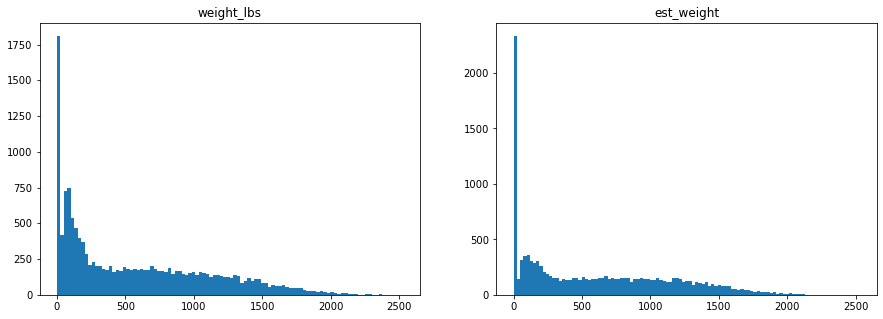

In [29]:
# Evaluate weight_lbs and est_weight after filtering for only Giant Pumpkins

fig, ax = plt.subplots(1,2, figsize=(15,5), sharex=True)

ax[0].hist(us_pumpkins.weight_lbs, bins=100)
ax[0].set_title("weight_lbs")
ax[1].hist(us_pumpkins.est_weight, bins=100)
ax[1].set_title("est_weight")
plt.show()

In [30]:
us_pumpkins.columns

Index(['place', 'weight_lbs', 'city', 'state_prov', 'country', 'ott',
       'est_weight', 'year', 'type'],
      dtype='object')

In [31]:
pumpkins_clean = us_pumpkins[["year","type","place","weight_lbs","est_weight","ott","city","state_prov"]]
pumpkins_clean.index = range(len(pumpkins_clean))
pumpkins_clean.columns = ["year","type","place","weight_lbs","est_weight","ott","city","state"]
pumpkins_clean

,year,type,place,weight_lbs,est_weight,ott,city,state
0,2013,Field Pumpkin,1.0,154.5,129.0,184.0,Gleason,Wisconsin
1,2013,Field Pumpkin,2.0,146.5,151.0,194.0,New Middletown,Ohio
2,2013,Field Pumpkin,3.0,145.0,115.0,177.0,Glenson,Wisconsin
3,2013,Field Pumpkin,4.0,140.8,151.0,194.0,Combined Locks,Wisconsin
4,2013,Field Pumpkin,5.0,139.0,0.0,0.0,NaN,Wisconsin
...,...,...,...,...,...,...,...,...
14575,2021,Giant Watermelon,222.0,16.0,21.0,86.0,Plankinton,South Dakota
14576,2021,Giant Watermelon,224.0,9.3,0.0,0.0,NaN,Utah
14577,2021,Giant Watermelon,227.0,6.0,0.0,0.0,Fond Du Lac,Wisconsin
14578,2021,Giant Watermelon,229.0,5.0,0.0,0.0,Fond Du Lac,Wisconsin


In [32]:
pumpkins_clean.type.value_counts()

Giant Pumpkin       9042
Giant Watermelon    1723
Tomato              1623
Field Pumpkin       1425
Giant Squash         767
Name: type, dtype: int64

# Import, Format, and Filter Weather Data

In [33]:
# Read in weather data for years 2013 - 2021

weather_2013 = pd.read_csv("source_data/weather/2013.csv.gz", header=None)
print(2013)
weather_2014 = pd.read_csv("source_data/weather/2014.csv.gz", header=None)
print(2014)
weather_2015 = pd.read_csv("source_data/weather/2015.csv.gz", header=None)
print(2015)
weather_2016 = pd.read_csv("source_data/weather/2016.csv.gz", header=None)
print(2016)
weather_2017 = pd.read_csv("source_data/weather/2017.csv.gz", header=None)
print(2017)
weather_2018 = pd.read_csv("source_data/weather/2018.csv.gz", header=None)
print(2018)
weather_2019 = pd.read_csv("source_data/weather/2019.csv.gz", header=None)
print(2019)
weather_2020 = pd.read_csv("source_data/weather/2020.csv.gz", header=None)
print(2020)
weather_2021 = pd.read_csv("source_data/weather/2021.csv.gz", header=None)
print(2021)

2013
2014
2015
2016
2017
2018
2019
2020
2021


In [34]:
print(weather_2013.shape)
print(weather_2014.shape)
print(weather_2015.shape)
print(weather_2016.shape)
print(weather_2017.shape)
print(weather_2018.shape)
print(weather_2019.shape)
print(weather_2020.shape)
print(weather_2021.shape)

(35299275, 8)
(34764328, 8)
(35361812, 8)
(35609538, 8)
(35346350, 8)
(35123833, 8)
(34739178, 8)
(34892486, 8)
(29955209, 8)


In [35]:
# Confirm csv files were correctly loaded

print(weather_2013.head(),"\n")
print(weather_2014.head(),"\n")
print(weather_2015.head(),"\n")
print(weather_2016.head(),"\n")
print(weather_2017.head(),"\n")
print(weather_2018.head(),"\n")
print(weather_2019.head(),"\n")
print(weather_2020.head(),"\n")
print(weather_2021.head(),"\n")

             0         1     2    3    4    5  6   7
0  AE000041196  20130101  TMAX  250  NaN  NaN  S NaN
1  AE000041196  20130101  TAVG  176    H  NaN  S NaN
2  AEM00041194  20130101  TMAX  241  NaN  NaN  S NaN
3  AEM00041194  20130101  TMIN  157  NaN  NaN  S NaN
4  AEM00041194  20130101  PRCP    0  NaN  NaN  S NaN 

             0         1     2    3    4    5  6   7
0  AE000041196  20140101  TMAX  244  NaN  NaN  S NaN
1  AE000041196  20140101  TMIN  128  NaN  NaN  S NaN
2  AE000041196  20140101  TAVG  182    H  NaN  S NaN
3  AEM00041194  20140101  TMAX  241  NaN  NaN  S NaN
4  AEM00041194  20140101  TMIN  159  NaN  NaN  S NaN 

             0         1     2    3    4    5  6   7
0  AE000041196  20150101  TMIN  125  NaN  NaN  S NaN
1  AE000041196  20150101  PRCP    0  NaN  NaN  S NaN
2  AE000041196  20150101  TAVG  206    H  NaN  S NaN
3  AEM00041194  20150101  TMAX  286  NaN  NaN  S NaN
4  AEM00041194  20150101  TMIN  180  NaN  NaN  S NaN 

             0         1     2    3    4

In [36]:
# Name Columns

names = [
    "station_id",
    "date",
    "element",
    "value",
    "measurement_flag",
    "quality_flag",
    "source_flag",
    "time_of_observation"
]

weather_2013.columns = names
weather_2014.columns = names
weather_2015.columns = names
weather_2016.columns = names
weather_2017.columns = names
weather_2018.columns = names
weather_2019.columns = names
weather_2020.columns = names
weather_2021.columns = names

In [37]:
# Filter out all records that are not PRCP, TMIN, TMAX, TAVG

weather_vars = [
    "PRCP", # PRCP = Precipitation (tenths of mm)
    "TMIN", # TMIN = Minimum temperature (tenths of degrees C)
    "TMAX"  # TMAX = Maximum temperature (tenths of degrees C)
#     "EVAP", # EVAP = Evaporation of water from evaporation pan (tenths of mm)
#     "TSUN", # TSUN = Daily total sunshine (minutes)
#     "PSUN", # PSUN = Daily percent of possible sunshine (percent) 
#     "ACSH", # ACSH = Average cloudiness sunrise to sunset from manual observations (percent)
#     "ACSC" # ACSC = Average cloudiness sunrise to sunset from 30-second ceilometer data (percent)"
]

weather_2013 = weather_2013[weather_2013.element.isin(weather_vars)]
weather_2014 = weather_2014[weather_2014.element.isin(weather_vars)]
weather_2015 = weather_2015[weather_2015.element.isin(weather_vars)]
weather_2016 = weather_2016[weather_2016.element.isin(weather_vars)]
weather_2017 = weather_2017[weather_2017.element.isin(weather_vars)]
weather_2018 = weather_2018[weather_2018.element.isin(weather_vars)]
weather_2019 = weather_2019[weather_2019.element.isin(weather_vars)]
weather_2020 = weather_2020[weather_2020.element.isin(weather_vars)]
weather_2021 = weather_2021[weather_2021.element.isin(weather_vars)]

In [38]:
print(weather_2013.shape)
print(weather_2014.shape)
print(weather_2015.shape)
print(weather_2016.shape)
print(weather_2017.shape)
print(weather_2018.shape)
print(weather_2019.shape)
print(weather_2020.shape)
print(weather_2021.shape)

(20666561, 8)
(20251440, 8)
(20221951, 8)
(20052784, 8)
(19845188, 8)
(19819069, 8)
(19574211, 8)
(19659384, 8)
(16200064, 8)


In [39]:
def row_vars_to_col_vars(df):
    df_PRCP = df[df.element == "PRCP"].loc[:,["station_id","date","element","value"]].rename(columns={"value":"PRCP"}).drop(["element"], axis=1)
    df_TMIN = df[df.element == "TMIN"].loc[:,["station_id","date","element","value"]].rename(columns={"value":"TMIN"}).drop(["element"], axis=1)
    df_TMAX = df[df.element == "TMAX"].loc[:,["station_id","date","element","value"]].rename(columns={"value":"TMAX"}).drop(["element"], axis=1)
#     df_EVAP = df[df.element == "EVAP"].loc[:,["station_id","date","element","value"]].rename(columns={"value":"EVAP"}).drop(["element"], axis=1)
#     df_TSUN = df[df.element == "TSUN"].loc[:,["station_id","date","element","value"]].rename(columns={"value":"TSUN"}).drop(["element"], axis=1)
#     df_PSUN = df[df.element == "PSUN"].loc[:,["station_id","date","element","value"]].rename(columns={"value":"PSUN"}).drop(["element"], axis=1)
#     df_ACSH = df[df.element == "ACSH"].loc[:,["station_id","date","element","value"]].rename(columns={"value":"ACSH"}).drop(["element"], axis=1)
#     df_ACSC = df[df.element == "ACSC"].loc[:,["station_id","date","element","value"]].rename(columns={"value":"ACSC"}).drop(["element"], axis=1)
    
    # Mandatory Variables : merge(how="inner")
    df_output = df_TMIN.merge(df_TMAX, how="inner", left_on=["station_id","date"], right_on=["station_id","date"])
    df_output = df_output.merge(df_PRCP, how="inner", left_on=["station_id","date"], right_on=["station_id","date"])
    
#     # Optional Variables : merge(how="left")
#     df_output = df_output.merge(df_EVAP, how="left", left_on=["station_id","date"], right_on=["station_id","date"])
#     df_output = df_output.merge(df_TSUN, how="left", left_on=["station_id","date"], right_on=["station_id","date"])
#     df_output = df_output.merge(df_PSUN, how="left", left_on=["station_id","date"], right_on=["station_id","date"])
#     df_output = df_output.merge(df_ACSH, how="left", left_on=["station_id","date"], right_on=["station_id","date"])
#     df_output = df_output.merge(df_ACSC, how="left", left_on=["station_id","date"], right_on=["station_id","date"])
    
    return df_output

In [40]:
# Convert Row Variables into Column Variables for Each Year

weather_2013_col_vars = row_vars_to_col_vars(weather_2013)
weather_2014_col_vars = row_vars_to_col_vars(weather_2014)
weather_2015_col_vars = row_vars_to_col_vars(weather_2015)
weather_2016_col_vars = row_vars_to_col_vars(weather_2016)
weather_2017_col_vars = row_vars_to_col_vars(weather_2017)
weather_2018_col_vars = row_vars_to_col_vars(weather_2018)
weather_2019_col_vars = row_vars_to_col_vars(weather_2019)
weather_2020_col_vars = row_vars_to_col_vars(weather_2020)
weather_2021_col_vars = row_vars_to_col_vars(weather_2021)

In [41]:
print(len(weather_2013_col_vars))
print(len(weather_2014_col_vars))
print(len(weather_2015_col_vars))
print(len(weather_2016_col_vars))
print(len(weather_2017_col_vars))
print(len(weather_2018_col_vars))
print(len(weather_2019_col_vars))
print(len(weather_2020_col_vars))
print(len(weather_2021_col_vars))


4018963
3855762
3829535
3781974
3684807
3616780
3483639
3399214
2737673


In [42]:
# Merge all years into a single dataset

print("2013")
weather_col_vars = weather_2013_col_vars.append(weather_2014_col_vars)
print("2014")
weather_col_vars = weather_col_vars.append(weather_2015_col_vars)
print("2015")
weather_col_vars = weather_col_vars.append(weather_2016_col_vars)
print("2016")
weather_col_vars = weather_col_vars.append(weather_2017_col_vars)
print("2017")
weather_col_vars = weather_col_vars.append(weather_2018_col_vars)
print("2018")
weather_col_vars = weather_col_vars.append(weather_2019_col_vars)
print("2019")
weather_col_vars = weather_col_vars.append(weather_2020_col_vars)
print("2020")
weather_col_vars = weather_col_vars.append(weather_2021_col_vars)
print("2021")

weather_col_vars

2013
2014
2015
2016
2017
2018
2019
2020
2021


,station_id,date,TMIN,TMAX,PRCP
0,AEM00041194,20130101,157,241,0
1,AG000060590,20130101,-5,170,0
2,AGE00147708,20130101,55,169,0
3,AGE00147716,20130101,91,160,0
4,AGM00060351,20130101,64,173,0
...,...,...,...,...,...
2737668,VQW00011624,20211128,233,311,0
2737669,VQW00011640,20211128,244,294,8
2737670,CQC00914080,20211129,217,283,396
2737671,CQC00914801,20211129,228,294,589


In [43]:
weather_col_vars.isna().sum()

station_id    0
date          0
TMIN          0
TMAX          0
PRCP          0
dtype: int64

In [44]:
weather = weather_col_vars

In [45]:
weather["date"] = pd.to_datetime(weather.date, format='%Y%m%d')
weather

,station_id,date,TMIN,TMAX,PRCP
0,AEM00041194,2013-01-01,157,241,0
1,AG000060590,2013-01-01,-5,170,0
2,AGE00147708,2013-01-01,55,169,0
3,AGE00147716,2013-01-01,91,160,0
4,AGM00060351,2013-01-01,64,173,0
...,...,...,...,...,...
2737668,VQW00011624,2021-11-28,233,311,0
2737669,VQW00011640,2021-11-28,244,294,8
2737670,CQC00914080,2021-11-29,217,283,396
2737671,CQC00914801,2021-11-29,228,294,589


In [46]:
weather_growing_season = weather[weather.date.dt.month.isin(range(5,10))]
weather_growing_season

,station_id,date,TMIN,TMAX,PRCP
1363338,AEM00041194,2013-05-01,248,317,0
1363339,AEM00041218,2013-05-01,237,328,0
1363340,AG000060611,2013-05-01,264,387,10
1363341,AGE00147708,2013-05-01,114,200,0
1363342,AGE00147716,2013-05-01,98,181,0
...,...,...,...,...,...
2342163,UY000002206,2021-09-30,114,222,0
2342164,UY000086490,2021-09-30,126,228,0
2342165,VQW00011624,2021-09-30,233,328,0
2342166,VQW00011640,2021-09-30,244,311,0


In [47]:
station_list_weather_complete = list(weather_growing_season.station_id.unique())
station_list_weather_complete

['AEM00041194',
 'AEM00041218',
 'AG000060611',
 'AGE00147708',
 'AGE00147716',
 'AGM00060351',
 'AGM00060367',
 'AGM00060402',
 'AGM00060403',
 'AGM00060419',
 'AGM00060421',
 'AGM00060423',
 'AGM00060430',
 'AGM00060437',
 'AGM00060444',
 'AGM00060445',
 'AGM00060457',
 'AGM00060467',
 'AGM00060475',
 'AGM00060490',
 'AGM00060507',
 'AGM00060514',
 'AGM00060515',
 'AGM00060520',
 'AGM00060522',
 'AGM00060531',
 'AGM00060535',
 'AGM00060536',
 'AGM00060540',
 'AGM00060549',
 'AGM00060550',
 'AGM00060557',
 'AGM00060559',
 'AGM00060580',
 'AGM00060581',
 'AGM00060602',
 'AGM00060603',
 'AGM00060620',
 'AGM00060640',
 'AGM00060670',
 'AM000037682',
 'AMM00037717',
 'AQW00061705',
 'AR000087129',
 'AR000087803',
 'AR000087828',
 'ARM00087046',
 'ARM00087289',
 'ARM00087320',
 'ARM00087349',
 'ARM00087395',
 'ASM00094299',
 'ASM00094995',
 'ASN00001006',
 'ASN00001007',
 'ASN00001013',
 'ASN00001018',
 'ASN00001019',
 'ASN00001020',
 'ASN00001025',
 'ASN00002012',
 'ASN00002032',
 'ASN000

In [48]:
# 75224695/176290652 # Original - PRCP, TMIN, TMAX - Row Format
# 75498845/176763439 # Expanded Vars - Row Format
13744803/32408347 # Expanded Vars - Column Format

0.42411305334394256

In [49]:
# weather_growing_season.element.value_counts()

In [50]:
# element_count = weather_growing_season.groupby(["station_id","element"]).date.count()
# element_count

In [51]:
# weather_grouped = weather_growing_season.groupby(["station_id","date"]).element.count().reset_index()
# day_element_count = weather_grouped.groupby(["station_id"]).element.sum().max()
# day_element_count

In [52]:
# weather_grouped_2 = weather_grouped.drop(["date"], axis=1).groupby("station_id").sum().reset_index()
# weather_grouped_2

In [53]:
# weather_grouped_2_filtered = weather_grouped_2[weather_grouped_2.element == 4131]
# weather_grouped_2_filtered

In [54]:
# station_list_complete = list(weather_grouped_2_filtered.station_id.unique())
# len(station_list_complete)

In [55]:
# weather_filtered = weather_growing_season[weather_growing_season.station_id.isin(station_list_complete)]
# weather_filtered

# Import Station Data

In [56]:
station_list = pd.read_csv('source_data/weather/ghcnd-stations.txt', names=['data'], header=None, error_bad_lines=False)
station_list

,data
0,ACW00011604 17.1167 -61.7833 10.1 ST JO...
1,ACW00011647 17.1333 -61.7833 19.2 ST JO...
2,AE000041196 25.3330 55.5170 34.0 SHARJ...
3,AEM00041194 25.2550 55.3640 10.4 DUBAI...
4,AEM00041217 24.4330 54.6510 26.8 ABU D...
...,...
119498,ZI000067969 -21.0500 29.3670 861.0 WEST ...
119499,ZI000067975 -20.0670 30.8670 1095.0 MASVI...
119500,ZI000067977 -21.0170 31.5830 430.0 BUFFA...
119501,ZI000067983 -20.2000 32.6160 1132.0 CHIPI...


In [57]:
station_list["id"] = station_list.data.str[0:11]
station_list["country"] = station_list.data.str[0:2]
station_list["state"] = station_list.data.str[38:40]
station_list["latitude"] = station_list.data.str[12:20]
station_list["longitude"] = station_list.data.str[21:30]

station_list.head(10)

,data,id,country,state,latitude,longitude
0,ACW00011604 17.1167 -61.7833 10.1 ST JO...,ACW00011604,AC,,17.1167,-61.7833
1,ACW00011647 17.1333 -61.7833 19.2 ST JO...,ACW00011647,AC,,17.1333,-61.7833
2,AE000041196 25.3330 55.5170 34.0 SHARJ...,AE000041196,AE,,25.3330,55.5170
3,AEM00041194 25.2550 55.3640 10.4 DUBAI...,AEM00041194,AE,,25.2550,55.3640
4,AEM00041217 24.4330 54.6510 26.8 ABU D...,AEM00041217,AE,,24.4330,54.6510
5,AEM00041218 24.2620 55.6090 264.9 AL AI...,AEM00041218,AE,,24.2620,55.6090
6,AF000040930 35.3170 69.0170 3366.0 NORTH...,AF000040930,AF,,35.3170,69.0170
7,AFM00040938 34.2100 62.2280 977.2 HERAT...,AFM00040938,AF,,34.2100,62.2280
8,AFM00040948 34.5660 69.2120 1791.3 KABUL...,AFM00040948,AF,,34.5660,69.2120
9,AFM00040990 31.5000 65.8500 1010.0 KANDA...,AFM00040990,AF,,31.5000,65.8500


In [58]:
us_stations = station_list[station_list.country == "US"]
us_stations = us_stations.drop(["data","country"], axis=1)
us_stations

,id,state,latitude,longitude
52607,US009052008,SD,43.7333,-96.6333
52608,US10RMHS145,CO,40.5268,-105.1113
52609,US10adam001,NE,40.5680,-98.5069
52610,US10adam002,NE,40.5093,-98.5493
52611,US10adam003,NE,40.4663,-98.6537
...,...,...,...,...
118706,USW00096405,AK,60.4731,-145.3542
118707,USW00096406,AK,64.5014,-154.1297
118708,USW00096407,AK,66.5620,-159.0036
118709,USW00096408,AK,63.4519,-150.8747


# Filter Station List Against Stations in Weather Data

In [59]:
stations_filtered = us_stations[us_stations.id.isin(station_list_weather_complete)]
stations_filtered

,id,state,latitude,longitude
52607,US009052008,SD,43.7333,-96.6333
92036,USC00010063,AL,34.2553,-87.1814
92042,USC00010160,AL,32.9453,-85.9481
92044,USC00010178,AL,33.1272,-88.1550
92046,USC00010252,AL,31.3072,-86.5225
...,...,...,...,...
118706,USW00096405,AK,60.4731,-145.3542
118707,USW00096406,AK,64.5014,-154.1297
118708,USW00096407,AK,66.5620,-159.0036
118709,USW00096408,AK,63.4519,-150.8747


In [60]:
stations_filtered.groupby(["state"]).id.count()

state
AK    252
AL    125
AR    114
AZ    195
CA    389
CO    357
CT     29
DE      7
FL    166
GA    124
HI     61
IA    143
ID    214
IL    147
IN    108
KS    171
KY     96
LA     88
MA     70
MD     40
ME     79
MI    218
MN    179
MO    169
MS     85
MT    326
NC    184
ND     97
NE    164
NH     65
NJ     40
NM    202
NV    161
NY    167
OH    117
OK    138
OR    251
PA    149
RI     10
SC     98
SD    144
TN    152
TX    426
UT    297
VA    126
VT     47
WA    220
WI    192
WV     89
WY    238
Name: id, dtype: int64

In [61]:
df_station_list_complete = pd.DataFrame({"station_id" : station_list_weather_complete})
df_station_list_complete

,station_id
0,AEM00041194
1,AEM00041218
2,AG000060611
3,AGE00147708
4,AGE00147716
...,...
14508,LYE00147751
14509,SPM00008420
14510,CA006078286
14511,CA002203914


In [62]:
unique_station_list = list(stations_filtered.id.unique())
station_list_common = list(df_station_list_complete[df_station_list_complete.station_id.isin(unique_station_list)].station_id.unique())
station_list_common

['US009052008',
 'USC00010063',
 'USC00010160',
 'USC00010178',
 'USC00010252',
 'USC00010260',
 'USC00010369',
 'USC00010390',
 'USC00010402',
 'USC00010425',
 'USC00010505',
 'USC00010583',
 'USC00010655',
 'USC00010764',
 'USC00011080',
 'USC00011084',
 'USC00011324',
 'USC00011490',
 'USC00011566',
 'USC00011620',
 'USC00011694',
 'USC00011803',
 'USC00012096',
 'USC00012172',
 'USC00012209',
 'USC00012245',
 'USC00012350',
 'USC00012675',
 'USC00012730',
 'USC00012758',
 'USC00012813',
 'USC00013043',
 'USC00013154',
 'USC00013160',
 'USC00013251',
 'USC00013519',
 'USC00013573',
 'USC00013575',
 'USC00013620',
 'USC00013645',
 'USC00013655',
 'USC00013761',
 'USC00013775',
 'USC00013781',
 'USC00013818',
 'USC00014193',
 'USC00014226',
 'USC00014502',
 'USC00015121',
 'USC00015439',
 'USC00015553',
 'USC00015635',
 'USC00015751',
 'USC00016121',
 'USC00016129',
 'USC00016196',
 'USC00016478',
 'USC00016988',
 'USC00017020',
 'USC00017131',
 'USC00017157',
 'USC00017207',
 'USC000

In [63]:
len(station_list_common)

7726

In [64]:
weather_growing_season = weather_growing_season[weather_growing_season.station_id.isin(station_list_common)]
weather_growing_season

,station_id,date,TMIN,TMAX,PRCP
1367453,US009052008,2013-05-01,1,78,94
1367454,USC00010063,2013-05-01,94,250,0
1367455,USC00010160,2013-05-01,117,267,0
1367456,USC00010178,2013-05-01,189,278,0
1367457,USC00010252,2013-05-01,161,200,160
...,...,...,...,...,...
2342154,USW00096404,2021-09-30,-73,37,0
2342155,USW00096405,2021-09-30,28,81,210
2342156,USW00096407,2021-09-30,-67,8,0
2342157,USW00096408,2021-09-30,-100,13,0


In [65]:
stations_filtered = stations_filtered[stations_filtered.id.isin(station_list_common)]
stations_filtered

,id,state,latitude,longitude
52607,US009052008,SD,43.7333,-96.6333
92036,USC00010063,AL,34.2553,-87.1814
92042,USC00010160,AL,32.9453,-85.9481
92044,USC00010178,AL,33.1272,-88.1550
92046,USC00010252,AL,31.3072,-86.5225
...,...,...,...,...
118706,USW00096405,AK,60.4731,-145.3542
118707,USW00096406,AK,64.5014,-154.1297
118708,USW00096407,AK,66.5620,-159.0036
118709,USW00096408,AK,63.4519,-150.8747


In [66]:
set(weather_growing_season.station_id.unique()) == set(stations_filtered.id.unique())

True

# State Abbbreviations

In [67]:
state_abbrev = pd.read_csv("source_data/weather/ghcnd-states.txt", header=None, names = ["data"])
state_abbrev["code"] = state_abbrev.data.str[:2]
state_abbrev["state"] = state_abbrev.data.str[3:]
state_abbrev["state"] = state_abbrev["state"].str.title()
state_abbrev.drop('data', axis=1, inplace=True)
state_abbrev.head(20)

,code,state
0,AB,Alberta
1,AK,Alaska
2,AL,Alabama
3,AR,Arkansas
4,AS,American Samoa
5,AZ,Arizona
6,BC,British Columbia
7,CA,California
8,CO,Colorado
9,CT,Connecticut


In [68]:
print(state_abbrev.state.values)

['Alberta' 'Alaska' 'Alabama' 'Arkansas' 'American Samoa' 'Arizona'
 'British Columbia' 'California' 'Colorado' 'Connecticut'
 'District Of Columbia' 'Delaware' 'Florida' 'Micronesia' 'Georgia' 'Guam'
 'Hawaii' 'Iowa' 'Idaho' 'Illinois' 'Indiana' 'Kansas' 'Kentucky'
 'Louisiana' 'Massachusetts' 'Manitoba' 'Maryland' 'Maine'
 'Marshall Islands' 'Michigan' 'Minnesota' 'Missouri'
 'Northern Mariana Islands' 'Mississippi' 'Montana' 'New Brunswick'
 'North Carolina' 'North Dakota' 'Nebraska' 'New Hampshire' 'New Jersey'
 'Newfoundland And Labrador' 'New Mexico' 'Nova Scotia'
 'Northwest Territories' 'Nunavut' 'Nevada' 'New York' 'Ohio' 'Oklahoma'
 'Ontario' 'Oregon' 'Pennsylvania' 'Prince Edward Island'
 'Pacific Islands' 'Puerto Rico' 'Palau' 'Quebec' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Saskatchewan' 'Tennessee' 'Texas'
 'U.S. Minor Outlying Islands' 'Utah' 'Virginia' 'Virgin Islands'
 'Vermont' 'Washington' 'Wisconsin' 'West Virginia' 'Wyoming'
 'Yukon Territory']


In [69]:
state_abbrev_dict = {}
for i in state_abbrev.index:
    state_abbrev_dict[state_abbrev.loc[i].code] = state_abbrev.loc[i].state
    
state_abbrev_dict

{'AB': 'Alberta',
 'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'BC': 'British Columbia',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District Of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'FM': 'Micronesia',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MB': 'Manitoba',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MH': 'Marshall Islands',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NB': 'New Brunswick',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NL': 'Newfoundland And Labrador',
 'NM': 'New Mexico',
 'NS': 'Nova Scotia',
 'NT': 'Northwest Territories',
 'NU': 'Nunavut',
 'NV': 'Nevada',
 'NY': 'New Y

In [70]:
for i in range(len(pumpkins_clean)):
    if pumpkins_clean.loc[i].state in state_abbrev.state.values:
        continue
    else:
        print(pumpkins_clean.loc[i].state)
        break

# City Latitude/Longitude

In [71]:
cities = pd.read_csv("source_data/uscities/worldcitiespop.csv")
cities

/Users/ericellestad/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6,NaN,42.466667,1.483333
...,...,...,...,...,...,...,...
3173953,zw,zimre park,Zimre Park,4,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,0,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,4,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,6,NaN,-20.033333,27.933333


In [72]:
us_cities = cities[cities.Country == "us"]
us_cities

,Country,City,AccentCity,Region,Population,Latitude,Longitude
2907718,us,abanda,Abanda,AL,NaN,33.100833,-85.529722
2907719,us,abbeville,Abbeville,AL,NaN,31.571667,-85.250556
2907720,us,abbot springs,Abbot Springs,AL,NaN,33.360833,-86.481667
2907721,us,abel,Abel,AL,NaN,33.548611,-85.712500
2907722,us,abercrombie,Abercrombie,AL,NaN,32.848611,-87.165000
...,...,...,...,...,...,...,...
3049702,us,wyoming,Wyoming,WY,NaN,41.477500,-105.636111
3049703,us,wyopo,Wyopo,WY,NaN,42.855556,-108.688611
3049704,us,y-o ranch,Y-O Ranch,WY,NaN,42.030833,-104.939444
3049705,us,yanceys,Yanceys,WY,NaN,44.930833,-110.435556


In [73]:
us_cities.columns

Index(['Country', 'City', 'AccentCity', 'Region', 'Population', 'Latitude',
       'Longitude'],
      dtype='object')

In [74]:
us_cities = us_cities[['AccentCity', 'Region', 'Latitude', 'Longitude']]
us_cities.columns = ['city', 'state_code', 'latitude', 'longitude']
us_cities = us_cities.merge(state_abbrev, how="left", left_on="state_code", right_on="code").drop(["code"],axis=1)
us_cities

,city,state_code,latitude,longitude,state
0,Abanda,AL,33.100833,-85.529722,Alabama
1,Abbeville,AL,31.571667,-85.250556,Alabama
2,Abbot Springs,AL,33.360833,-86.481667,Alabama
3,Abel,AL,33.548611,-85.712500,Alabama
4,Abercrombie,AL,32.848611,-87.165000,Alabama
...,...,...,...,...,...
141984,Wyoming,WY,41.477500,-105.636111,Wyoming
141985,Wyopo,WY,42.855556,-108.688611,Wyoming
141986,Y-O Ranch,WY,42.030833,-104.939444,Wyoming
141987,Yanceys,WY,44.930833,-110.435556,Wyoming


In [75]:
pumpkin_coord = pumpkins_clean.merge(us_cities, how="left", left_on=["city","state"], right_on=["city","state"])
pumpkin_coord

,year,type,place,weight_lbs,est_weight,ott,city,state,state_code,latitude,longitude
0,2013,Field Pumpkin,1.0,154.5,129.0,184.0,Gleason,Wisconsin,WI,45.308889,-89.496389
1,2013,Field Pumpkin,2.0,146.5,151.0,194.0,New Middletown,Ohio,OH,40.961111,-80.557778
2,2013,Field Pumpkin,3.0,145.0,115.0,177.0,Glenson,Wisconsin,NaN,NaN,NaN
3,2013,Field Pumpkin,4.0,140.8,151.0,194.0,Combined Locks,Wisconsin,WI,44.265833,-88.314167
4,2013,Field Pumpkin,5.0,139.0,0.0,0.0,NaN,Wisconsin,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14575,2021,Giant Watermelon,222.0,16.0,21.0,86.0,Plankinton,South Dakota,SD,43.715556,-98.484722
14576,2021,Giant Watermelon,224.0,9.3,0.0,0.0,NaN,Utah,NaN,NaN,NaN
14577,2021,Giant Watermelon,227.0,6.0,0.0,0.0,Fond Du Lac,Wisconsin,NaN,NaN,NaN
14578,2021,Giant Watermelon,229.0,5.0,0.0,0.0,Fond Du Lac,Wisconsin,NaN,NaN,NaN


In [76]:
pumpkin_filtered = pumpkin_coord.dropna(subset=['latitude', 'longitude'])
pumpkin_filtered.index = range(len(pumpkin_filtered))
print(f"{len(pumpkin_coord) - len(pumpkin_filtered)} pumpkins omitted due to failure to match city")

2207 pumpkins omitted due to failure to match city


In [77]:
pumpkin_filtered

,year,type,place,weight_lbs,est_weight,ott,city,state,state_code,latitude,longitude
0,2013,Field Pumpkin,1.0,154.5,129.0,184.0,Gleason,Wisconsin,WI,45.308889,-89.496389
1,2013,Field Pumpkin,2.0,146.5,151.0,194.0,New Middletown,Ohio,OH,40.961111,-80.557778
2,2013,Field Pumpkin,4.0,140.8,151.0,194.0,Combined Locks,Wisconsin,WI,44.265833,-88.314167
3,2013,Field Pumpkin,7.0,136.5,142.0,190.0,West Linn,Oregon,OR,45.365833,-122.611111
4,2013,Field Pumpkin,8.0,136.0,124.0,182.0,Saegertown,Pennsylvania,PA,41.718889,-80.147778
...,...,...,...,...,...,...,...,...,...,...,...
12368,2021,Giant Watermelon,216.0,18.5,0.0,0.0,Lakewood,Colorado,CO,39.704722,-105.080833
12369,2021,Giant Watermelon,217.0,18.0,0.0,0.0,Centennial,Colorado,CO,39.579167,-104.876389
12370,2021,Giant Watermelon,219.0,17.5,17.0,81.0,Huntsburg,Ohio,OH,41.534722,-81.051944
12371,2021,Giant Watermelon,222.0,16.0,21.0,86.0,Plankinton,South Dakota,SD,43.715556,-98.484722


In [78]:
pumpkin_filtered.isna().sum()

year             0
type             0
place            0
weight_lbs       0
est_weight    1366
ott           1365
city             0
state            0
state_code       0
latitude         0
longitude        0
dtype: int64

# Calculate Nearest Station to Each Pumpkin

In [79]:
def distance(lat_a, long_a, lat_b, long_b):
    return ((float(lat_b) - float(lat_a))**2 + (float(long_b) - float(long_a))**2)**.5

In [80]:
stations_filtered.head(5)

,id,state,latitude,longitude
52607,US009052008,SD,43.7333,-96.6333
92036,USC00010063,AL,34.2553,-87.1814
92042,USC00010160,AL,32.9453,-85.9481
92044,USC00010178,AL,33.1272,-88.1550
92046,USC00010252,AL,31.3072,-86.5225


In [81]:
pumpkin_filtered.head(5)

,year,type,place,weight_lbs,est_weight,ott,city,state,state_code,latitude,longitude
0,2013,Field Pumpkin,1.0,154.5,129.0,184.0,Gleason,Wisconsin,WI,45.308889,-89.496389
1,2013,Field Pumpkin,2.0,146.5,151.0,194.0,New Middletown,Ohio,OH,40.961111,-80.557778
2,2013,Field Pumpkin,4.0,140.8,151.0,194.0,Combined Locks,Wisconsin,WI,44.265833,-88.314167
3,2013,Field Pumpkin,7.0,136.5,142.0,190.0,West Linn,Oregon,OR,45.365833,-122.611111
4,2013,Field Pumpkin,8.0,136.0,124.0,182.0,Saegertown,Pennsylvania,PA,41.718889,-80.147778


In [82]:
pumpkin_filtered["nearest_station"] = ""
for i in range(len(pumpkin_filtered)):
    
    state_stations = stations_filtered[stations_filtered.state == pumpkin_filtered.loc[i,"state_code"]]
    
    pumpkin_lat = pumpkin_filtered.loc[i,"latitude"]
    pumpkin_long = pumpkin_filtered.loc[i,"longitude"]
    
    closest_distance = 1000000000000000000.0
    nearest_station = ""
    
    for index, row in state_stations.iterrows():
        check = distance(pumpkin_lat, pumpkin_long, row["latitude"], row["longitude"])
        if check < closest_distance:
            closest_distance = check
            nearest_station = row["id"]
    
    pumpkin_filtered.loc[i, "nearest_station"] = nearest_station
    print(pumpkin_filtered.loc[i, "nearest_station"])
    print(closest_distance)
    print(f"{i+1} pumpkins located. {len(pumpkin_filtered) - (i+1)} left. {(i+1)/len(pumpkin_filtered)*100:.0f}% done.\n")

USC00475364
0.21048267683211674
1 pumpkins located. 12372 left. 0% done.

USW00014852
0.31544055572492846
2 pumpkins located. 12371 left. 0% done.

USC00470265
0.12412761464629317
3 pumpkins located. 12370 left. 0% done.

USC00356334
0.011906691904136612
4 pumpkins located. 12369 left. 0% done.

USW00004843
0.11433731147815063
5 pumpkins located. 12368 left. 0% done.

USC00331458
0.1490026303935672
6 pumpkins located. 12367 left. 0% done.

USW00004843

<ipython-input-82-5b81b6a364fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumpkin_filtered["nearest_station"] = ""
/Users/ericellestad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)



0.11433731147815063
7 pumpkins located. 12366 left. 0% done.

USC00475364
0.21048267683211674
8 pumpkins located. 12365 left. 0% done.

USW00024232
0.05023286428793387
9 pumpkins located. 12364 left. 0% done.

USW00024227
0.06487028119810126
10 pumpkins located. 12363 left. 0% done.

USW00004843
0.11433731147815063
11 pumpkins located. 12362 left. 0% done.

USC00470265
0.12412761464629317
12 pumpkins located. 12361 left. 0% done.

USC00366233
0.1391318515511442
13 pumpkins located. 12360 left. 0% done.

USC00306314
0.026595639148740295
14 pumpkins located. 12359 left. 0% done.

USW00024227
0.12729738143516653
15 pumpkins located. 12358 left. 0% done.

USC00055402
0.05009463895568037
16 pumpkins located. 12357 left. 0% done.

USC00200220
0.038505056188762425
17 pumpkins located. 12356 left. 0% done.

USC00120784
0.010222268635198397
18 pumpkins located. 12355 left. 0% done.

USC00470265
0.12412761464629317
19 pumpkins located. 12354 left. 0% done.

USC00455704
0.08345213109441987
20 pu

USC00360132
0.12593279806662466
118 pumpkins located. 12255 left. 1% done.

USC00473058
0.06021719535191382
119 pumpkins located. 12254 left. 1% done.

USC00473058
0.06021719535191382
120 pumpkins located. 12253 left. 1% done.

USC00203278
0.17155629753581336
121 pumpkins located. 12252 left. 1% done.

USC00129724
0.039444652891490684
122 pumpkins located. 12251 left. 1% done.

USW00014702
0.09055936097527688
123 pumpkins located. 12250 left. 1% done.

USC00455224
0.08178740334354581
124 pumpkins located. 12249 left. 1% done.

USC00435982
0.04680747783987019
125 pumpkins located. 12248 left. 1% done.

USC00426919
0.06237395330873433
126 pumpkins located. 12247 left. 1% done.

USC00150397
0.22455465891459944
127 pumpkins located. 12246 left. 1% done.

USC00336465
0.09447667710101808
128 pumpkins located. 12245 left. 1% done.

USC00338769
0.30461280547647823
129 pumpkins located. 12244 left. 1% done.

USC00203947
0.013668127311377102
130 pumpkins located. 12243 left. 1% done.

USC0036499

USC00046074
0.027695905549372776
226 pumpkins located. 12147 left. 2% done.

USC00203947
0.013668127311377102
227 pumpkins located. 12146 left. 2% done.

USC00046074
0.027695905549372776
228 pumpkins located. 12145 left. 2% done.

USW00004843
0.11433731147815063
229 pumpkins located. 12144 left. 2% done.

USW00024232
0.05023286428793387
230 pumpkins located. 12143 left. 2% done.

USC00047965
0.015244436370361748
231 pumpkins located. 12142 left. 2% done.

USC00470486
0.2162781891328183
232 pumpkins located. 12141 left. 2% done.

USW00004725
0.3657781797179567
233 pumpkins located. 12140 left. 2% done.

USC00470486
0.2162781891328183
234 pumpkins located. 12139 left. 2% done.

USC00301102
0.04629671478898174
235 pumpkins located. 12138 left. 2% done.

USC00436995
0.09577009497801203
236 pumpkins located. 12137 left. 2% done.

USC00455224
0.06133547016408797
237 pumpkins located. 12136 left. 2% done.

USC00047965
0.015244436370361748
238 pumpkins located. 12135 left. 2% done.

USC0047026

USC00211468
0.037545125152547834
335 pumpkins located. 12038 left. 3% done.

USC00046074
0.027695905549372776
336 pumpkins located. 12037 left. 3% done.

USC00173862
0.1558591218511122
337 pumpkins located. 12036 left. 3% done.

USC00338025
0.3233614413181729
338 pumpkins located. 12035 left. 3% done.

USC00202308
0.010991581582289802
339 pumpkins located. 12034 left. 3% done.

USW00094290
0.0481192000026066
340 pumpkins located. 12033 left. 3% done.

USC00454169
0.11087193356680025
341 pumpkins located. 12032 left. 3% done.

USC00455704
0.08345213109441987
342 pumpkins located. 12031 left. 3% done.

USC00069388
0.029881288649591678
343 pumpkins located. 12030 left. 3% done.

USC00046074
0.027695905549372776
344 pumpkins located. 12029 left. 3% done.

USC00201476
0.01739604645027681
345 pumpkins located. 12028 left. 3% done.

USC00473058
0.06021719535191382
346 pumpkins located. 12027 left. 3% done.

USC00274218
0.07722510618755889
347 pumpkins located. 12026 left. 3% done.

USC0033876

USC00454169
0.11087193356680025
449 pumpkins located. 11924 left. 4% done.

USC00331783
0.2533502309929891
450 pumpkins located. 11923 left. 4% done.

USC00058995
0.04120353106347237
451 pumpkins located. 11922 left. 4% done.

USC00048560
0.050207274230735024
452 pumpkins located. 11921 left. 4% done.

USC00060808
0.12251314546652445
453 pumpkins located. 11920 left. 4% done.

USC00275712
0.07634526483816617
454 pumpkins located. 11919 left. 4% done.

USC00040383
0.16407112695941115
455 pumpkins located. 11918 left. 4% done.

USC00131635
0.09023815043854808
456 pumpkins located. 11917 left. 4% done.

USC00470265
0.12412761464629317
457 pumpkins located. 11916 left. 4% done.

USW00014860
0.1089473293005888
458 pumpkins located. 11915 left. 4% done.

USC00118389
0.038660690425808816
459 pumpkins located. 11914 left. 4% done.

USC00478229
0.0076029168218430246
460 pumpkins located. 11913 left. 4% done.

USC00305597
0.04139643007217125
461 pumpkins located. 11912 left. 4% done.

USC0042760

USC00367186
0.07217755882388954
558 pumpkins located. 11815 left. 5% done.

USC00475120
0.16891999968061772
559 pumpkins located. 11814 left. 5% done.

USC00455704
0.08345213109441987
560 pumpkins located. 11813 left. 5% done.

USC00055402
0.05009463895568037
561 pumpkins located. 11812 left. 5% done.

USC00336118
0.14224477724275228
562 pumpkins located. 11811 left. 5% done.

USW00014750
0.1437593372280558
563 pumpkins located. 11810 left. 5% done.

USW00014897
0.1536894456451677
564 pumpkins located. 11809 left. 5% done.

USC00205662
0.23364573185609738
565 pumpkins located. 11808 left. 5% done.

USW00024227
0.06487028119810126
566 pumpkins located. 11807 left. 5% done.

USW00014752
0.07220191732689317
567 pumpkins located. 11806 left. 5% done.

USW00023271
0.23195434671876297
568 pumpkins located. 11805 left. 5% done.

USC00352997
0.008385385582077999
569 pumpkins located. 11804 left. 5% done.

USW00054797
0.12404107760967494
570 pumpkins located. 11803 left. 5% done.

USC00304844
0

USC00053038
0.07086569144657275
672 pumpkins located. 11701 left. 5% done.

USW00004826
0.08188833206807151
673 pumpkins located. 11700 left. 5% done.

USW00094908
0.15587665105525686
674 pumpkins located. 11699 left. 5% done.

USC00051401
0.06322464127379154
675 pumpkins located. 11698 left. 5% done.

USC00338769
0.30461280547647823
676 pumpkins located. 11697 left. 5% done.

USC00130214
0.035862548276584076
677 pumpkins located. 11696 left. 5% done.

USC00203278
0.17155629753581336
678 pumpkins located. 11695 left. 5% done.

USC00058995
0.04085271281323469
679 pumpkins located. 11694 left. 5% done.

USC00427271
0.08304393921443044
680 pumpkins located. 11693 left. 5% done.

USC00366921
0.05929227714372054
681 pumpkins located. 11692 left. 6% done.

USC00360475
0.08628635768028305
682 pumpkins located. 11691 left. 6% done.

USC00054762
0.05943962013447954
683 pumpkins located. 11690 left. 6% done.

USC00043417
0.1575034652960032
684 pumpkins located. 11689 left. 6% done.

USW00014897


USC00310982
0.08520927656564013
783 pumpkins located. 11590 left. 6% done.

USW00023271
0.15385691493907191
784 pumpkins located. 11589 left. 6% done.

USC00479335
0.012458962880196007
785 pumpkins located. 11588 left. 6% done.

USC00052223
0.026034680673659914
786 pumpkins located. 11587 left. 6% done.

USC00352112
0.14200961057114642
787 pumpkins located. 11586 left. 6% done.

USC00201476
0.01739604645027681
788 pumpkins located. 11585 left. 6% done.

USC00048273
0.20379477219212294
789 pumpkins located. 11584 left. 6% done.

USC00331592
0.013601196806533643
790 pumpkins located. 11583 left. 6% done.

USC00212088
0.1584063613076243
791 pumpkins located. 11582 left. 6% done.

USC00046646
0.06399742210472228
792 pumpkins located. 11581 left. 6% done.

USC00455704
0.08345213109441987
793 pumpkins located. 11580 left. 6% done.

USC00129724
0.039444652891490684
794 pumpkins located. 11579 left. 6% done.

USC00470904
0.00973229962804106
795 pumpkins located. 11578 left. 6% done.

USW000547

USC00043714
0.018128776660598856
893 pumpkins located. 11480 left. 7% done.

USC00314970
0.022631612987591684
894 pumpkins located. 11479 left. 7% done.

USW00093037
0.134669057886737
895 pumpkins located. 11478 left. 7% done.

USC00455704
0.08345213109441987
896 pumpkins located. 11477 left. 7% done.

USC00176011
0.171089913514562
897 pumpkins located. 11476 left. 7% done.

USW00004836
0.06714720486906829
898 pumpkins located. 11475 left. 7% done.

USC00336616
0.20736217427546239
899 pumpkins located. 11474 left. 7% done.

USW00023244
0.08447045906451162
900 pumpkins located. 11473 left. 7% done.

USC00353445
0.016167805717841956
901 pumpkins located. 11472 left. 7% done.

USW00014991
0.1183458105054766
902 pumpkins located. 11471 left. 7% done.

USC00336616
0.20736217427546239
903 pumpkins located. 11470 left. 7% done.

USW00023062
0.050902312074900875
904 pumpkins located. 11469 left. 7% done.

USC00428119
0.0570321139857156
905 pumpkins located. 11468 left. 7% done.

USC00478937
0.

USW00023271
0.2046737276119446
1003 pumpkins located. 11370 left. 8% done.

USW00014895
0.14905256380813459
1004 pumpkins located. 11369 left. 8% done.

USC00120784
0.010222268635198397
1005 pumpkins located. 11368 left. 8% done.

USW00064776
0.17536776411690974
1006 pumpkins located. 11367 left. 8% done.

USW00093037
0.134669057886737
1007 pumpkins located. 11366 left. 8% done.

USC00391392
0.011291374092201927
1008 pumpkins located. 11365 left. 8% done.

USC00339299
0.1277317003510516
1009 pumpkins located. 11364 left. 8% done.

USC00422726
0.015783313520303047
1010 pumpkins located. 11363 left. 8% done.

USW00023271
0.15385691493907191
1011 pumpkins located. 11362 left. 8% done.

USC00333500
0.09896673903171528
1012 pumpkins located. 11361 left. 8% done.

USW00064776
0.17536776411690974
1013 pumpkins located. 11360 left. 8% done.

USC00357823
0.008061331416090306
1014 pumpkins located. 11359 left. 8% done.

USC00043417
0.1575034652960032
1015 pumpkins located. 11358 left. 8% done.



USC00218477
0.02402055959402577
1111 pumpkins located. 11262 left. 9% done.

USW00013883
0.12226748106682002
1112 pumpkins located. 11261 left. 9% done.

USC00212561
0.038710819937707974
1113 pumpkins located. 11260 left. 9% done.

USW00004843
0.11433731147815063
1114 pumpkins located. 11259 left. 9% done.

USW00004843
0.11433731147815063
1115 pumpkins located. 11258 left. 9% done.

USW00014737
0.05927652368559523
1116 pumpkins located. 11257 left. 9% done.

USC00190593
0.09117617702986446
1117 pumpkins located. 11256 left. 9% done.

USC00366233
0.1391318515511442
1118 pumpkins located. 11255 left. 9% done.

USW00054704
0.0674191102885435
1119 pumpkins located. 11254 left. 9% done.

USC00331458
0.1490026303935672
1120 pumpkins located. 11253 left. 9% done.

USC00190593
0.09117617702986446
1121 pumpkins located. 11252 left. 9% done.

USC00476330
0.01584558401700195
1122 pumpkins located. 11251 left. 9% done.

USC00470265
0.12412761464629317
1123 pumpkins located. 11250 left. 9% done.

U

USC00313238
0.06143147755483927
1223 pumpkins located. 11150 left. 10% done.

USC00229400
0.006917135709240421
1224 pumpkins located. 11149 left. 10% done.

USC00333758
0.3725287595513298
1225 pumpkins located. 11148 left. 10% done.

USC00150397
0.22455465891459944
1226 pumpkins located. 11147 left. 10% done.

USC00319476
0.1935491556691957
1227 pumpkins located. 11146 left. 10% done.

USC00200094
0.19139881901863587
1228 pumpkins located. 11145 left. 10% done.

USC00157049
0.009781759845749888
1229 pumpkins located. 11144 left. 10% done.

USC00364325
0.24006869358941857
1230 pumpkins located. 11143 left. 10% done.

USC00333758
0.3725287595513298
1231 pumpkins located. 11142 left. 10% done.

USC00230163
0.11349310258588798
1232 pumpkins located. 11141 left. 10% done.

USC00030220
0.02308083776859227
1233 pumpkins located. 11140 left. 10% done.

USW00093981
0.015401034517200157
1234 pumpkins located. 11139 left. 10% done.

USW00053905
0.02996083443848281
1235 pumpkins located. 11138 lef

USC00368469
0.24239195398067692
1331 pumpkins located. 11042 left. 11% done.

USC00134963
0.2160034926609517
1332 pumpkins located. 11041 left. 11% done.

USC00333780
0.2085394114180119
1333 pumpkins located. 11040 left. 11% done.

USC00338769
0.2242949816295588
1334 pumpkins located. 11039 left. 11% done.

USC00395360
0.3874635747050442
1335 pumpkins located. 11038 left. 11% done.

USC00436995
0.2027147260171303
1336 pumpkins located. 11037 left. 11% done.

USC00338769
0.2242949816295588
1337 pumpkins located. 11036 left. 11% done.

USC00317548
0.1586688486054554
1338 pumpkins located. 11035 left. 11% done.

USC00395360
0.3874635747050442
1339 pumpkins located. 11034 left. 11% done.

USC00203712
0.11095753868980968
1340 pumpkins located. 11033 left. 11% done.

USC00207820
0.17251528205701153
1341 pumpkins located. 11032 left. 11% done.

USW00094830
0.1208431639679345
1342 pumpkins located. 11031 left. 11% done.

USC00194131
0.191499730638366
1343 pumpkins located. 11030 left. 11% done

USC00055402
0.05009463895568037
1441 pumpkins located. 10932 left. 12% done.

USC00133517
0.1626868261172361
1442 pumpkins located. 10931 left. 12% done.

USC00455704
0.08345213109441987
1443 pumpkins located. 10930 left. 12% done.

USW00094290
0.13564977479425563
1444 pumpkins located. 10929 left. 12% done.

USC00177479
0.019163030598782722
1445 pumpkins located. 10928 left. 12% done.

USW00014737
0.2606632516826614
1446 pumpkins located. 10927 left. 12% done.

USW00014898
0.07088266936318022
1447 pumpkins located. 10926 left. 12% done.

USC00475120
0.3327981256583814
1448 pumpkins located. 10925 left. 12% done.

USW00014737
0.2606632516826614
1449 pumpkins located. 10924 left. 12% done.

USC00303773
0.08793931687305458
1450 pumpkins located. 10923 left. 12% done.

USC00352112
0.14200961057114642
1451 pumpkins located. 10922 left. 12% done.

USC00190998
0.042223042307856076
1452 pumpkins located. 10921 left. 12% done.

USC00203278
0.17155629753581336
1453 pumpkins located. 10920 left.

USC00045032
0.2610542293551292
1557 pumpkins located. 10816 left. 13% done.

USW00024227
0.12729738143516653
1558 pumpkins located. 10815 left. 13% done.

USC00426869
0.12398446773790396
1559 pumpkins located. 10814 left. 13% done.

USW00014733
0.11689185987143282
1560 pumpkins located. 10813 left. 13% done.

USC00355050
0.17836819126338332
1561 pumpkins located. 10812 left. 13% done.

USC00470265
0.12412761464629317
1562 pumpkins located. 10811 left. 13% done.

USC00331592
0.013601196806533643
1563 pumpkins located. 10810 left. 13% done.

USC00362071
0.18376549203864714
1564 pumpkins located. 10809 left. 13% done.

USC00436995
0.09577009497801203
1565 pumpkins located. 10808 left. 13% done.

USC00046074
0.027695905549372776
1566 pumpkins located. 10807 left. 13% done.

USW00004843
0.11433731147815063
1567 pumpkins located. 10806 left. 13% done.

USC00046074
0.027695905549372776
1568 pumpkins located. 10805 left. 13% done.

USW00094847
0.14049111991357052
1569 pumpkins located. 10804 l

USC00047965
0.015244436370361748
1665 pumpkins located. 10708 left. 13% done.

USC00364934
0.15209945825587345
1666 pumpkins located. 10707 left. 13% done.

USW00093759
0.2368850745252665
1667 pumpkins located. 10706 left. 13% done.

USW00014742
0.2162669458463062
1668 pumpkins located. 10705 left. 13% done.

USC00200230
0.07637334439821711
1669 pumpkins located. 10704 left. 13% done.

USC00173862
0.1558591218511122
1670 pumpkins located. 10703 left. 13% done.

USC00258088
0.13797361631939098
1671 pumpkins located. 10702 left. 14% done.

USC00203278
0.17155629753581336
1672 pumpkins located. 10701 left. 14% done.

USC00046074
0.027695905549372776
1673 pumpkins located. 10700 left. 14% done.

USC00046074
0.027695905549372776
1674 pumpkins located. 10699 left. 14% done.

USC00367938
0.09105606119446248
1675 pumpkins located. 10698 left. 14% done.

USC00426405
0.04246094420427252
1676 pumpkins located. 10697 left. 14% done.

USC00470265
0.12412761464629317
1677 pumpkins located. 10696 lef

USC00470486
0.2162781891328183
1778 pumpkins located. 10595 left. 14% done.

USC00470486
0.2162781891328183
1779 pumpkins located. 10594 left. 14% done.

USC00046074
0.027695905549372776
1780 pumpkins located. 10593 left. 14% done.

USC00443204
0.16350347562131964
1781 pumpkins located. 10592 left. 14% done.

USC00047965
0.015244436370361748
1782 pumpkins located. 10591 left. 14% done.

USC00063420
0.016532962712414185
1783 pumpkins located. 10590 left. 14% done.

USC00331458
0.1490026303935672
1784 pumpkins located. 10589 left. 14% done.

USC00046074
0.027695905549372776
1785 pumpkins located. 10588 left. 14% done.

USC00379423
0.06014059808298128
1786 pumpkins located. 10587 left. 14% done.

USC00202375
0.11576047634321791
1787 pumpkins located. 10586 left. 14% done.

USC00055402
0.05009463895568037
1788 pumpkins located. 10585 left. 14% done.

USC00118389
0.038660690425808816
1789 pumpkins located. 10584 left. 14% done.

USW00014933
0.07998493842324576
1790 pumpkins located. 10583 l

USC00055402
0.05009463895568037
1892 pumpkins located. 10481 left. 15% done.

USC00196486
0.06415593068244581
1893 pumpkins located. 10480 left. 15% done.

USC00060808
0.12251314546652445
1894 pumpkins located. 10479 left. 15% done.

USC00333758
0.443486510848073
1895 pumpkins located. 10478 left. 15% done.

USC00200230
0.07637334439821711
1896 pumpkins located. 10477 left. 15% done.

USC00129138
0.24605482642374973
1897 pumpkins located. 10476 left. 15% done.

USW00014852
0.23764802214386
1898 pumpkins located. 10475 left. 15% done.

USW00094830
0.1208431639679345
1899 pumpkins located. 10474 left. 15% done.

USC00455704
0.08345213109441987
1900 pumpkins located. 10473 left. 15% done.

USW00094281
0.07855264689728711
1901 pumpkins located. 10472 left. 15% done.

USC00206300
0.21261557105736467
1902 pumpkins located. 10471 left. 15% done.

USC00202308
0.1459710530428014
1903 pumpkins located. 10470 left. 15% done.

USC00206982
0.13335769064002817
1904 pumpkins located. 10469 left. 15% 

USW00024127
0.09178318953779793
1997 pumpkins located. 10376 left. 16% done.

USW00014825
0.22585108429621828
1998 pumpkins located. 10375 left. 16% done.

USC00360868
0.09091672210204249
1999 pumpkins located. 10374 left. 16% done.

USC00312740
0.08559828556753377
2000 pumpkins located. 10373 left. 16% done.

USC00317548
0.1586688486054554
2001 pumpkins located. 10372 left. 16% done.

USW00004826
0.08188833206807151
2002 pumpkins located. 10371 left. 16% done.

USW00094298
0.018348873427265794
2003 pumpkins located. 10370 left. 16% done.

USC00129724
0.039444652891490684
2004 pumpkins located. 10369 left. 16% done.

USC00312740
0.08559828556753377
2005 pumpkins located. 10368 left. 16% done.

USW00014944
0.0475820344247692
2006 pumpkins located. 10367 left. 16% done.

USC00478027
0.013112919159754962
2007 pumpkins located. 10366 left. 16% done.

USC00158432
0.19091295742327438
2008 pumpkins located. 10365 left. 16% done.

USC00040383
0.16407112695941115
2009 pumpkins located. 10364 le

USC00478937
0.13536426312494623
2110 pumpkins located. 10263 left. 17% done.

USC00336616
0.20736217427546239
2111 pumpkins located. 10262 left. 17% done.

USC00479335
0.012458962880196007
2112 pumpkins located. 10261 left. 17% done.

USC00202375
0.11576047634321791
2113 pumpkins located. 10260 left. 17% done.

USC00314970
0.022631612987591684
2114 pumpkins located. 10259 left. 17% done.

USC00303025
0.16072348008955892
2115 pumpkins located. 10258 left. 17% done.

USC00048273
0.20379477219212294
2116 pumpkins located. 10257 left. 17% done.

USC00205452
0.12326986793311548
2117 pumpkins located. 10256 left. 17% done.

USW00093205
0.061655926886637964
2118 pumpkins located. 10255 left. 17% done.

USW00014752
0.07220191732689317
2119 pumpkins located. 10254 left. 17% done.

USC00455704
0.08345213109441987
2120 pumpkins located. 10253 left. 17% done.

USC00152040
0.16327195115686646
2121 pumpkins located. 10252 left. 17% done.

USW00014895
0.05117350065111961
2122 pumpkins located. 10251 

USC00040383
0.10075485418445333
2223 pumpkins located. 10150 left. 18% done.

USC00055402
0.05009463895568037
2224 pumpkins located. 10149 left. 18% done.

USC00356749
0.015418567482430316
2225 pumpkins located. 10148 left. 18% done.

USC00230143
0.19585946286074676
2226 pumpkins located. 10147 left. 18% done.

USW00014852
0.23764802214386
2227 pumpkins located. 10146 left. 18% done.

USC00472425
0.194153273163877
2228 pumpkins located. 10145 left. 18% done.

USW00014897
0.1536894456451677
2229 pumpkins located. 10144 left. 18% done.

USC00193624
0.18868619820245686
2230 pumpkins located. 10143 left. 18% done.

USC00190593
0.17688760818353153
2231 pumpkins located. 10142 left. 18% done.

USC00317400
0.14202395003730892
2232 pumpkins located. 10141 left. 18% done.

USW00014926
0.18680134641966656
2233 pumpkins located. 10140 left. 18% done.

USC00358407
0.02980165788744816
2234 pumpkins located. 10139 left. 18% done.

USC00190593
0.09117617702986446
2235 pumpkins located. 10138 left. 18

USC00361139
0.028688263707832548
2332 pumpkins located. 10041 left. 19% done.

USC00408405
0.031166769486918634
2333 pumpkins located. 10040 left. 19% done.

USW00023271
0.23568781789519946
2334 pumpkins located. 10039 left. 19% done.

USC00454169
0.11087193356680025
2335 pumpkins located. 10038 left. 19% done.

USC00363321
0.10166593411880291
2336 pumpkins located. 10037 left. 19% done.

USC00301595
0.04460565818066181
2337 pumpkins located. 10036 left. 19% done.

USC00058995
0.04085271281323469
2338 pumpkins located. 10035 left. 19% done.

USC00055984
0.07596328912421955
2339 pumpkins located. 10034 left. 19% done.

USC00356749
0.08819710468359906
2340 pumpkins located. 10033 left. 19% done.

USW00093808
0.15071331800540597
2341 pumpkins located. 10032 left. 19% done.

USW00093807
0.04052799852201156
2342 pumpkins located. 10031 left. 19% done.

USC00049792
0.04955186977077184
2343 pumpkins located. 10030 left. 19% done.

USC00408405
0.031166769486918634
2344 pumpkins located. 10029 

USC00360132
0.12593279806662466
2438 pumpkins located. 9935 left. 20% done.

USW00004836
0.07024671854030187
2439 pumpkins located. 9934 left. 20% done.

USC00391392
0.011291374092201927
2440 pumpkins located. 9933 left. 20% done.

USW00023293
0.03592979062798361
2441 pumpkins located. 9932 left. 20% done.

USC00190998
0.042223042307856076
2442 pumpkins located. 9931 left. 20% done.

USC00454169
0.11087193356680025
2443 pumpkins located. 9930 left. 20% done.

USC00353522
0.04037342246737994
2444 pumpkins located. 9929 left. 20% done.

USC00173295
0.07589540555395662
2445 pumpkins located. 9928 left. 20% done.

USW00014852
0.14872820322511776
2446 pumpkins located. 9927 left. 20% done.

USC00047668
0.13973666562591794
2447 pumpkins located. 9926 left. 20% done.

USC00352112
0.14200961057114642
2448 pumpkins located. 9925 left. 20% done.

USC00195285
0.05506201333135027
2449 pumpkins located. 9924 left. 20% done.

USW00013883
0.12226748106682002
2450 pumpkins located. 9923 left. 20% done

USW00094290
0.13564977479425563
2549 pumpkins located. 9824 left. 21% done.

USC00069388
0.029881288649591678
2550 pumpkins located. 9823 left. 21% done.

USC00470265
0.1658596257764986
2551 pumpkins located. 9822 left. 21% done.

USC00334681
0.06231173045341595
2552 pumpkins located. 9821 left. 21% done.

USC00455704
0.08345213109441987
2553 pumpkins located. 9820 left. 21% done.

USC00275629
0.04422947915609613
2554 pumpkins located. 9819 left. 21% done.

USC00055402
0.05009463895568037
2555 pumpkins located. 9818 left. 21% done.

USC00055402
0.05009463895568037
2556 pumpkins located. 9817 left. 21% done.

USC00470265
0.12412761464629317
2557 pumpkins located. 9816 left. 21% done.

USC00455704
0.08345213109441987
2558 pumpkins located. 9815 left. 21% done.

USW00014737
0.2606632516826614
2559 pumpkins located. 9814 left. 21% done.

USW00093037
0.134669057886737
2560 pumpkins located. 9813 left. 21% done.

USW00014836
0.3096447936177408
2561 pumpkins located. 9812 left. 21% done.

USC

USC00431580
0.2698932069916769
2656 pumpkins located. 9717 left. 21% done.

USW00004843
0.11433731147815063
2657 pumpkins located. 9716 left. 21% done.

USC00203278
0.17155629753581336
2658 pumpkins located. 9715 left. 21% done.

USC00375270
0.14760910141902042
2659 pumpkins located. 9714 left. 21% done.

USC00432843
0.1173096161214885
2660 pumpkins located. 9713 left. 21% done.

USC00478229
0.0076029168218430246
2661 pumpkins located. 9712 left. 22% done.

USC00473022
0.004964608024809739
2662 pumpkins located. 9711 left. 22% done.

USC00333758
0.3725287595513298
2663 pumpkins located. 9710 left. 22% done.

USC00120784
0.010222268635198397
2664 pumpkins located. 9709 left. 22% done.

USC00408886
0.16295101268802029
2665 pumpkins located. 9708 left. 22% done.

USC00431580
0.2698932069916769
2666 pumpkins located. 9707 left. 22% done.

USC00435982
0.04680747783987019
2667 pumpkins located. 9706 left. 22% done.

USC00473268
0.21901541848195788
2668 pumpkins located. 9705 left. 22% done.


USC00408179
0.07156648449321505
2766 pumpkins located. 9607 left. 22% done.

USC00150955
0.19872667275231676
2767 pumpkins located. 9606 left. 22% done.

USC00314684
0.24786469024226007
2768 pumpkins located. 9605 left. 22% done.

USC00150955
0.19872667275231676
2769 pumpkins located. 9604 left. 22% done.

USC00408179
0.07156648449321505
2770 pumpkins located. 9603 left. 22% done.

USC00408179
0.07156648449321505
2771 pumpkins located. 9602 left. 22% done.

USC00010764
0.053734113189391725
2772 pumpkins located. 9601 left. 22% done.

USC00313238
0.06143147755483927
2773 pumpkins located. 9600 left. 22% done.

USC00331197
0.1557517032076975
2774 pumpkins located. 9599 left. 22% done.

USC00313238
0.06143147755483927
2775 pumpkins located. 9598 left. 22% done.

USC00408179
0.07156648449321505
2776 pumpkins located. 9597 left. 22% done.

USC00314684
0.24786469024226007
2777 pumpkins located. 9596 left. 22% done.

USC00030220
0.02308083776859227
2778 pumpkins located. 9595 left. 22% done.


USC00046074
0.027695905549372776
2876 pumpkins located. 9497 left. 23% done.

USW00094281
0.07855264689728711
2877 pumpkins located. 9496 left. 23% done.

USC00470265
0.12412761464629317
2878 pumpkins located. 9495 left. 23% done.

USC00478229
0.0076029168218430246
2879 pumpkins located. 9494 left. 23% done.

USC00470265
0.12412761464629317
2880 pumpkins located. 9493 left. 23% done.

USW00014944
0.0475820344247692
2881 pumpkins located. 9492 left. 23% done.

USC00406271
0.038182853261765425
2882 pumpkins located. 9491 left. 23% done.

USC00030220
0.02308083776859227
2883 pumpkins located. 9490 left. 23% done.

USC00069388
0.029881288649591678
2884 pumpkins located. 9489 left. 23% done.

USC00471676
0.14883086063643203
2885 pumpkins located. 9488 left. 23% done.

USC00203712
0.11095753868980968
2886 pumpkins located. 9487 left. 23% done.

USW00014737
0.2606632516826614
2887 pumpkins located. 9486 left. 23% done.

USC00237632
0.029614479274833745
2888 pumpkins located. 9485 left. 23% do

USC00473022
0.004964608024809739
2985 pumpkins located. 9388 left. 24% done.

USC00338769
0.2953440632512837
2986 pumpkins located. 9387 left. 24% done.

USC00306314
0.026595639148740295
2987 pumpkins located. 9386 left. 24% done.

USC00177479
0.019163030598782722
2988 pumpkins located. 9385 left. 24% done.

USC00107210
0.004216972379562929
2989 pumpkins located. 9384 left. 24% done.

USC00123206
0.0857588070357852
2990 pumpkins located. 9383 left. 24% done.

USC00406829
0.07429019801918804
2991 pumpkins located. 9382 left. 24% done.

USW00014737
0.2606632516826614
2992 pumpkins located. 9381 left. 24% done.

USC00366233
0.1391318515511442
2993 pumpkins located. 9380 left. 24% done.

USC00478027
0.13233816564551382
2994 pumpkins located. 9379 left. 24% done.

USC00203278
0.17155629753581336
2995 pumpkins located. 9378 left. 24% done.

USC00130214
0.035862548276584076
2996 pumpkins located. 9377 left. 24% done.

USW00014742
0.2162669458463062
2997 pumpkins located. 9376 left. 24% done.


USC00040383
0.16407112695941115
3098 pumpkins located. 9275 left. 25% done.

USC00211691
0.17775999223741804
3099 pumpkins located. 9274 left. 25% done.

USW00004843
0.11433731147815063
3100 pumpkins located. 9273 left. 25% done.

USW00054733
0.06242707745842296
3101 pumpkins located. 9272 left. 25% done.

USC00362071
0.18376549203864714
3102 pumpkins located. 9271 left. 25% done.

USC00046074
0.027695905549372776
3103 pumpkins located. 9270 left. 25% done.

USC00470486
0.2162781891328183
3104 pumpkins located. 9269 left. 25% done.

USC00472425
0.194153273163877
3105 pumpkins located. 9268 left. 25% done.

USC00473022
0.004964608024809739
3106 pumpkins located. 9267 left. 25% done.

USW00004843
0.11433731147815063
3107 pumpkins located. 9266 left. 25% done.

USW00024227
0.12729738143516653
3108 pumpkins located. 9265 left. 25% done.

USW00024227
0.12729738143516653
3109 pumpkins located. 9264 left. 25% done.

USC00478229
0.0076029168218430246
3110 pumpkins located. 9263 left. 25% done.

USW00024227
0.06487028119810126
3213 pumpkins located. 9160 left. 26% done.

USC00473058
0.06021719535191382
3214 pumpkins located. 9159 left. 26% done.

USW00014752
0.07220191732689317
3215 pumpkins located. 9158 left. 26% done.

USC00472425
0.194153273163877
3216 pumpkins located. 9157 left. 26% done.

USW00024227
0.06487028119810126
3217 pumpkins located. 9156 left. 26% done.

USC00203278
0.17155629753581336
3218 pumpkins located. 9155 left. 26% done.

USC00206012
0.09678332852433912
3219 pumpkins located. 9154 left. 26% done.

USW00014925
0.11950501789350987
3220 pumpkins located. 9153 left. 26% done.

USC00355681
0.08614514970546636
3221 pumpkins located. 9152 left. 26% done.

USC00331458
0.1490026303935672
3222 pumpkins located. 9151 left. 26% done.

USC00190593
0.09117617702986446
3223 pumpkins located. 9150 left. 26% done.

USC00368184
0.09479744258285007
3224 pumpkins located. 9149 left. 26% done.

USC00131635
0.09023815043854808
3225 pumpkins located. 9148 left. 26% done.

US

USC00478229
0.0076029168218430246
3326 pumpkins located. 9047 left. 27% done.

USC00202375
0.06059758559752951
3327 pumpkins located. 9046 left. 27% done.

USC00045915
0.06206883401555357
3328 pumpkins located. 9045 left. 27% done.

USC00477226
0.27296394105186983
3329 pumpkins located. 9044 left. 27% done.

USC00367186
0.07217755882388954
3330 pumpkins located. 9043 left. 27% done.

USW00024227
0.06487028119810126
3331 pumpkins located. 9042 left. 27% done.

USC00304207
0.0774637098435128
3332 pumpkins located. 9041 left. 27% done.

USC00431580
0.2698932069916769
3333 pumpkins located. 9040 left. 27% done.

USW00024126
0.037229466290151454
3334 pumpkins located. 9039 left. 27% done.

USW00014898
0.07088266936318022
3335 pumpkins located. 9038 left. 27% done.

USC00179721
0.08113619725917871
3336 pumpkins located. 9037 left. 27% done.

USC00069388
0.029881288649591678
3337 pumpkins located. 9036 left. 27% done.

USW00094644
0.08964179076803332
3338 pumpkins located. 9035 left. 27% done

USC00478589
0.12113213294620846
3439 pumpkins located. 8934 left. 28% done.

USC00352112
0.03658333637393762
3440 pumpkins located. 8933 left. 28% done.

USC00206982
0.13335769064002817
3441 pumpkins located. 8932 left. 28% done.

USC00190593
0.09117617702986446
3442 pumpkins located. 8931 left. 28% done.

USC00125174
0.263697337400477
3443 pumpkins located. 8930 left. 28% done.

USC00336616
0.20736217427546239
3444 pumpkins located. 8929 left. 28% done.

USC00319476
0.1935491556691957
3445 pumpkins located. 8928 left. 28% done.

USC00427606
0.1111249868580343
3446 pumpkins located. 8927 left. 28% done.

USW00014833
0.22202928884816234
3447 pumpkins located. 8926 left. 28% done.

USC00205452
0.12326986793311548
3448 pumpkins located. 8925 left. 28% done.

USC00120177
0.1564294051696511
3449 pumpkins located. 8924 left. 28% done.

USC00120177
0.1564294051696511
3450 pumpkins located. 8923 left. 28% done.

USW00094128
0.07614499098009302
3451 pumpkins located. 8922 left. 28% done.

USW00

USW00064776
0.17536776411690974
3547 pumpkins located. 8826 left. 29% done.

USC00156882
0.18609444741917597
3548 pumpkins located. 8825 left. 29% done.

USC00355945
0.09606377775233099
3549 pumpkins located. 8824 left. 29% done.

USW00064776
0.17536776411690974
3550 pumpkins located. 8823 left. 29% done.

USC00115097
0.0696003559200811
3551 pumpkins located. 8822 left. 29% done.

USC00203278
0.17155629753581336
3552 pumpkins located. 8821 left. 29% done.

USC00366233
0.23316927540330015
3553 pumpkins located. 8820 left. 29% done.

USW00014895
0.05117350065111961
3554 pumpkins located. 8819 left. 29% done.

USC00478540
0.14121677774889746
3555 pumpkins located. 8818 left. 29% done.

USC00478951
0.10112175463395537
3556 pumpkins located. 8817 left. 29% done.

USC00173862
0.09169615821886953
3557 pumpkins located. 8816 left. 29% done.

USW00024127
0.09178318953779793
3558 pumpkins located. 8815 left. 29% done.

USW00014852
0.10617777185480241
3559 pumpkins located. 8814 left. 29% done.



USW00004826
0.08188833206807151
3656 pumpkins located. 8717 left. 30% done.

USC00455704
0.08345213109441987
3657 pumpkins located. 8716 left. 30% done.

USW00094908
0.15587665105525686
3658 pumpkins located. 8715 left. 30% done.

USC00273055
0.10204348854566965
3659 pumpkins located. 8714 left. 30% done.

USW00014764
0.14745338647926085
3660 pumpkins located. 8713 left. 30% done.

USW00054767
0.10981313097517253
3661 pumpkins located. 8712 left. 30% done.

USC00356334
0.06296274375953918
3662 pumpkins located. 8711 left. 30% done.

USW00014739
0.10412220946656771
3663 pumpkins located. 8710 left. 30% done.

USC00210355
0.01247858085881283
3664 pumpkins located. 8709 left. 30% done.

USC00406829
0.07429019801918804
3665 pumpkins located. 8708 left. 30% done.

USW00094705
0.07716219055574741
3666 pumpkins located. 8707 left. 30% done.

USW00014837
0.12162460582760483
3667 pumpkins located. 8706 left. 30% done.

USC00218681
0.3590964356871513
3668 pumpkins located. 8705 left. 30% done.



USC00055402
0.05009463895568037
3764 pumpkins located. 8609 left. 30% done.

USC00338769
0.11023378321425428
3765 pumpkins located. 8608 left. 30% done.

USC00351862
0.08531346776289198
3766 pumpkins located. 8607 left. 30% done.

USC00218681
0.3590964356871513
3767 pumpkins located. 8606 left. 30% done.

USC00151890
0.19087732380437455
3768 pumpkins located. 8605 left. 30% done.

USC00210059
0.043114889903131365
3769 pumpkins located. 8604 left. 30% done.

USC00054762
0.05943962013447954
3770 pumpkins located. 8603 left. 30% done.

USC00301595
0.04460565818066181
3771 pumpkins located. 8602 left. 30% done.

USC00426919
0.005766416714916022
3772 pumpkins located. 8601 left. 30% done.

USC00126830
0.1338066596102363
3773 pumpkins located. 8600 left. 30% done.

USC00366921
0.0924134053140035
3774 pumpkins located. 8599 left. 31% done.

USW00014895
0.11218967691555398
3775 pumpkins located. 8598 left. 31% done.

USW00014733
0.14737505033663303
3776 pumpkins located. 8597 left. 31% done.



USW00003017
0.10107425084659269
3872 pumpkins located. 8501 left. 31% done.

USW00004787
0.12189472991778193
3873 pumpkins located. 8500 left. 31% done.

USC00307484
0.1087126163871036
3874 pumpkins located. 8499 left. 31% done.

USC00366921
0.05929227714372054
3875 pumpkins located. 8498 left. 31% done.

USC00470265
0.1658596257764986
3876 pumpkins located. 8497 left. 31% done.

USC00237452
0.14391958788775883
3877 pumpkins located. 8496 left. 31% done.

USC00150397
0.22455465891459944
3878 pumpkins located. 8495 left. 31% done.

USC00038052
0.031782675473439166
3879 pumpkins located. 8494 left. 31% done.

USC00043714
0.018128776660598856
3880 pumpkins located. 8493 left. 31% done.

USW00094746
0.06872140457252952
3881 pumpkins located. 8492 left. 31% done.

USC00043417
0.006979654843186276
3882 pumpkins located. 8491 left. 31% done.

USC00142881
0.10996861495249781
3883 pumpkins located. 8490 left. 31% done.

USC00195285
0.05506201333135027
3884 pumpkins located. 8489 left. 31% done.

USC00043417
0.1575034652960032
3986 pumpkins located. 8387 left. 32% done.

USC00055116
0.02398796273238228
3987 pumpkins located. 8386 left. 32% done.

USC00338794
0.2775132489667864
3988 pumpkins located. 8385 left. 32% done.

USC00043417
0.1575034652960032
3989 pumpkins located. 8384 left. 32% done.

USC00473405
0.19240593186295396
3990 pumpkins located. 8383 left. 32% done.

USC00338794
0.2775132489667864
3991 pumpkins located. 8382 left. 32% done.

USC00053006
0.15714729596429705
3992 pumpkins located. 8381 left. 32% done.

USC00130214
0.035862548276584076
3993 pumpkins located. 8380 left. 32% done.

USC00190998
0.1786875307034343
3994 pumpkins located. 8379 left. 32% done.

USC00126830
0.1338066596102363
3995 pumpkins located. 8378 left. 32% done.

USC00053006
0.15714729596429705
3996 pumpkins located. 8377 left. 32% done.

USC00212561
0.038710819937707974
3997 pumpkins located. 8376 left. 32% done.

USW00003812
0.040055283697662064
3998 pumpkins located. 8375 left. 32% done.

US

USW00014737
0.2606632516826614
4096 pumpkins located. 8277 left. 33% done.

USW00014737
0.2606632516826614
4097 pumpkins located. 8276 left. 33% done.

USC00375270
0.14760910141902042
4098 pumpkins located. 8275 left. 33% done.

USW00014733
0.11689185987143282
4099 pumpkins located. 8274 left. 33% done.

USC00473022
0.004964608024809739
4100 pumpkins located. 8273 left. 33% done.

USC00355681
0.08614514970546636
4101 pumpkins located. 8272 left. 33% done.

USC00307705
0.283643119705121
4102 pumpkins located. 8271 left. 33% done.

USC00202308
0.010991581582289802
4103 pumpkins located. 8270 left. 33% done.

USC00375270
0.14760910141902042
4104 pumpkins located. 8269 left. 33% done.

USC00473022
0.004964608024809739
4105 pumpkins located. 8268 left. 33% done.

USW00093037
0.134669057886737
4106 pumpkins located. 8267 left. 33% done.

USW00014733
0.11689185987143282
4107 pumpkins located. 8266 left. 33% done.

USC00203278
0.17155629753581336
4108 pumpkins located. 8265 left. 33% done.

US

USC00508615
0.10168873910971495
4204 pumpkins located. 8169 left. 34% done.

USW00004843
0.11433731147815063
4205 pumpkins located. 8168 left. 34% done.

USC00470265
0.12412761464629317
4206 pumpkins located. 8167 left. 34% done.

USW00023050
0.05506287263410796
4207 pumpkins located. 8166 left. 34% done.

USW00014918
0.0417026185280935
4208 pumpkins located. 8165 left. 34% done.

USC00362071
0.18376549203864714
4209 pumpkins located. 8164 left. 34% done.

USC00406829
0.018636228808429953
4210 pumpkins located. 8163 left. 34% done.

USC00211691
0.17775999223741804
4211 pumpkins located. 8162 left. 34% done.

USW00064775
0.1884451337448054
4212 pumpkins located. 8161 left. 34% done.

USC00306314
0.026595639148740295
4213 pumpkins located. 8160 left. 34% done.

USW00004843
0.11433731147815063
4214 pumpkins located. 8159 left. 34% done.

USC00354819
0.005882645474612106
4215 pumpkins located. 8158 left. 34% done.

USC00055519
0.07974621866960362
4216 pumpkins located. 8157 left. 34% done.

USC00202308
0.08547307694947423
4314 pumpkins located. 8059 left. 35% done.

USC00203278
0.17155629753581336
4315 pumpkins located. 8058 left. 35% done.

USW00023293
0.03592979062798361
4316 pumpkins located. 8057 left. 35% done.

USC00455704
0.08345213109441987
4317 pumpkins located. 8056 left. 35% done.

USC00135796
0.016530274530392568
4318 pumpkins located. 8055 left. 35% done.

USC00120784
0.010222268635198397
4319 pumpkins located. 8054 left. 35% done.

USC00120177
0.1564294051696511
4320 pumpkins located. 8053 left. 35% done.

USC00473058
0.015748025782639438
4321 pumpkins located. 8052 left. 35% done.

USC00471064
0.1238784074489923
4322 pumpkins located. 8051 left. 35% done.

USC00129138
0.24605482642374973
4323 pumpkins located. 8050 left. 35% done.

USW00023293
0.03592979062798361
4324 pumpkins located. 8049 left. 35% done.

USC00455704
0.08345213109441987
4325 pumpkins located. 8048 left. 35% done.

USC00123777
0.0822753561111229
4326 pumpkins located. 8047 left. 35% done.


USC00470265
0.1658596257764986
4426 pumpkins located. 7947 left. 36% done.

USC00395360
0.3874635747050442
4427 pumpkins located. 7946 left. 36% done.

USC00033428
0.054861269166603256
4428 pumpkins located. 7945 left. 36% done.

USW00003812
0.040055283697662064
4429 pumpkins located. 7944 left. 36% done.

USC00395360
0.3874635747050442
4430 pumpkins located. 7943 left. 36% done.

USC00120177
0.1564294051696511
4431 pumpkins located. 7942 left. 36% done.

USC00130214
0.035862548276584076
4432 pumpkins located. 7941 left. 36% done.

USC00068330
0.15816792998598306
4433 pumpkins located. 7940 left. 36% done.

USC00420061
0.014463666594603276
4434 pumpkins located. 7939 left. 36% done.

USC00069388
0.029881288649591678
4435 pumpkins located. 7938 left. 36% done.

USC00204793
0.02143057748545281
4436 pumpkins located. 7937 left. 36% done.

USC00443204
0.16350347562131964
4437 pumpkins located. 7936 left. 36% done.

USC00130214
0.035862548276584076
4438 pumpkins located. 7935 left. 36% done

USC00202308
0.010991581582289802
4536 pumpkins located. 7837 left. 37% done.

USC00476330
0.01584558401700195
4537 pumpkins located. 7836 left. 37% done.

USC00207820
0.17251528205701153
4538 pumpkins located. 7835 left. 37% done.

USC00455704
0.08345213109441987
4539 pumpkins located. 7834 left. 37% done.

USW00014836
0.3096447936177408
4540 pumpkins located. 7833 left. 37% done.

USC00352112
0.14200961057114642
4541 pumpkins located. 7832 left. 37% done.

USC00395360
0.3874635747050442
4542 pumpkins located. 7831 left. 37% done.

USC00360868
0.09091672210204249
4543 pumpkins located. 7830 left. 37% done.

USC00202308
0.010991581582289802
4544 pumpkins located. 7829 left. 37% done.

USC00426869
0.12398446773790396
4545 pumpkins located. 7828 left. 37% done.

USC00360868
0.09091672210204249
4546 pumpkins located. 7827 left. 37% done.

USC00331458
0.1490026303935672
4547 pumpkins located. 7826 left. 37% done.

USC00206982
0.09498900894446291
4548 pumpkins located. 7825 left. 37% done.



USW00024227
0.06487028119810126
4645 pumpkins located. 7728 left. 38% done.

USC00355681
0.08614514970546636
4646 pumpkins located. 7727 left. 38% done.

USC00371875
0.13005575484726414
4647 pumpkins located. 7726 left. 38% done.

USC00470486
0.2162781891328183
4648 pumpkins located. 7725 left. 38% done.

USC00375270
0.16580633210592538
4649 pumpkins located. 7724 left. 38% done.

USC00115097
0.0633080834852164
4650 pumpkins located. 7723 left. 38% done.

USW00004843
0.11433731147815063
4651 pumpkins located. 7722 left. 38% done.

USC00060973
0.14057243269778888
4652 pumpkins located. 7721 left. 38% done.

USC00114530
0.030641306579354925
4653 pumpkins located. 7720 left. 38% done.

USC00204793
0.1001106822114407
4654 pumpkins located. 7719 left. 38% done.

USC00355681
0.08614514970546636
4655 pumpkins located. 7718 left. 38% done.

USW00004843
0.11433731147815063
4656 pumpkins located. 7717 left. 38% done.

USC00364325
0.24006869358941857
4657 pumpkins located. 7716 left. 38% done.

U

USW00054733
0.06242707745842296
4752 pumpkins located. 7621 left. 38% done.

USC00366233
0.1391318515511442
4753 pumpkins located. 7620 left. 38% done.

USW00014833
0.22202928884816234
4754 pumpkins located. 7619 left. 38% done.

USC00212500
0.03130568178621618
4755 pumpkins located. 7618 left. 38% done.

USW00054791
0.18168748879380137
4756 pumpkins located. 7617 left. 38% done.

USC00406829
0.018636228808429953
4757 pumpkins located. 7616 left. 38% done.

USC00470265
0.20100513757454241
4758 pumpkins located. 7615 left. 38% done.

USC00368184
0.09479744258285007
4759 pumpkins located. 7614 left. 38% done.

USW00026409
0.04529254446598572
4760 pumpkins located. 7613 left. 38% done.

USC00115097
0.0696003559200811
4761 pumpkins located. 7612 left. 38% done.

USC00336616
0.20736217427546239
4762 pumpkins located. 7611 left. 38% done.

USC00476380
0.04651150644840225
4763 pumpkins located. 7610 left. 38% done.

USC00331197
0.1557517032076975
4764 pumpkins located. 7609 left. 39% done.

U

USC00046074
0.027695905549372776
4860 pumpkins located. 7513 left. 39% done.

USW00064775
0.1884451337448054
4861 pumpkins located. 7512 left. 39% done.

USC00304207
0.0774637098435128
4862 pumpkins located. 7511 left. 39% done.

USC00377581
0.0763342736930823
4863 pumpkins located. 7510 left. 39% done.

USC00275712
0.07634526483816617
4864 pumpkins located. 7509 left. 39% done.

USC00331592
0.013601196806533643
4865 pumpkins located. 7508 left. 39% done.

USC00338769
0.11023378321425428
4866 pumpkins located. 7507 left. 39% done.

USW00014742
0.2162669458463062
4867 pumpkins located. 7506 left. 39% done.

USC00306062
0.11769990798742849
4868 pumpkins located. 7505 left. 39% done.

USC00046074
0.027695905549372776
4869 pumpkins located. 7504 left. 39% done.

USC00478540
0.09665428575377548
4870 pumpkins located. 7503 left. 39% done.

USC00046074
0.027695905549372776
4871 pumpkins located. 7502 left. 39% done.

USC00477464
0.10804571876848924
4872 pumpkins located. 7501 left. 39% done.


USC00356334
0.06296274375953918
4967 pumpkins located. 7406 left. 40% done.

USW00024255
0.06183813241237485
4968 pumpkins located. 7405 left. 40% done.

USC00321435
0.22476664058913665
4969 pumpkins located. 7404 left. 40% done.

USC00045123
0.03250039240410069
4970 pumpkins located. 7403 left. 40% done.

USC00435982
0.04680747783987019
4971 pumpkins located. 7402 left. 40% done.

USC00212768
0.04094444900350017
4972 pumpkins located. 7401 left. 40% done.

USC00068330
0.02218116994773589
4973 pumpkins located. 7400 left. 40% done.

USC00120784
0.010222268635198397
4974 pumpkins located. 7399 left. 40% done.

USC00363311
0.13823088177412424
4975 pumpkins located. 7398 left. 40% done.

USC00177479
0.019163030598782722
4976 pumpkins located. 7397 left. 40% done.

USC00206982
0.13335769064002817
4977 pumpkins located. 7396 left. 40% done.

USW00014833
0.18782872459559802
4978 pumpkins located. 7395 left. 40% done.

USC00352997
0.04413984077011547
4979 pumpkins located. 7394 left. 40% done

USC00458278
0.031406306734776686
5077 pumpkins located. 7296 left. 41% done.

USC00206982
0.13335769064002817
5078 pumpkins located. 7295 left. 41% done.

USC00473198
0.07434895684009886
5079 pumpkins located. 7294 left. 41% done.

USC00477349
0.18566953525080704
5080 pumpkins located. 7293 left. 41% done.

USC00429111
0.01701914518182066
5081 pumpkins located. 7292 left. 41% done.

USC00478229
0.0076029168218430246
5082 pumpkins located. 7291 left. 41% done.

USC00308600
0.175658174737475
5083 pumpkins located. 7290 left. 41% done.

USC00120784
0.010222268635198397
5084 pumpkins located. 7289 left. 41% done.

USC00479052
0.11546233252494355
5085 pumpkins located. 7288 left. 41% done.

USC00308600
0.175658174737475
5086 pumpkins located. 7287 left. 41% done.

USW00014910
0.24225711090227375
5087 pumpkins located. 7286 left. 41% done.

USW00014733
0.14737505033663303
5088 pumpkins located. 7285 left. 41% done.

USC00173862
0.09169615821886953
5089 pumpkins located. 7284 left. 41% done.


USC00040383
0.16407112695941115
5192 pumpkins located. 7181 left. 42% done.

USC00478540
0.14121677774889746
5193 pumpkins located. 7180 left. 42% done.

USC00425186
0.023851671106439223
5194 pumpkins located. 7179 left. 42% done.

USC00361139
0.028688263707832548
5195 pumpkins located. 7178 left. 42% done.

USC00466212
0.016379201890518995
5196 pumpkins located. 7177 left. 42% done.

USC00366921
0.20352427691694835
5197 pumpkins located. 7176 left. 42% done.

USC00107210
0.004216972379562929
5198 pumpkins located. 7175 left. 42% done.

USW00004846
0.059007206971421644
5199 pumpkins located. 7174 left. 42% done.

USW00024127
0.09178318953779793
5200 pumpkins located. 7173 left. 42% done.

USC00356334
0.0019031687681372277
5201 pumpkins located. 7172 left. 42% done.

USC00470486
0.2162781891328183
5202 pumpkins located. 7171 left. 42% done.

USC00420819
0.029746109180184794
5203 pumpkins located. 7170 left. 42% done.

USC00455224
0.06133547016408797
5204 pumpkins located. 7169 left. 42%

USW00014852
0.34387005894094375
5304 pumpkins located. 7069 left. 43% done.

USS0022C12S
0.25559553539929497
5305 pumpkins located. 7068 left. 43% done.

USC00473453
0.03564261404623952
5306 pumpkins located. 7067 left. 43% done.

USC00301595
0.04460565818066181
5307 pumpkins located. 7066 left. 43% done.

USC00361726
0.2226655944274577
5308 pumpkins located. 7065 left. 43% done.

USW00024127
0.12096166918227358
5309 pumpkins located. 7064 left. 43% done.

USC00040383
0.16407112695941115
5310 pumpkins located. 7063 left. 43% done.

USC00432843
0.0843916073031617
5311 pumpkins located. 7062 left. 43% done.

USC00457507
0.12247441437317022
5312 pumpkins located. 7061 left. 43% done.

USC00304174
0.0485206490344041
5313 pumpkins located. 7060 left. 43% done.

USW00014752
0.16359761684099028
5314 pumpkins located. 7059 left. 43% done.

USW00024227
0.06487028119810126
5315 pumpkins located. 7058 left. 43% done.

USC00043714
0.018128776660598856
5316 pumpkins located. 7057 left. 43% done.

U

USC00142881
0.22162240304816344
5419 pumpkins located. 6954 left. 44% done.

USC00211468
0.16007748148249387
5420 pumpkins located. 6953 left. 44% done.

USC00472425
0.02971265474676077
5421 pumpkins located. 6952 left. 44% done.

USC00256570
0.004357671141797792
5422 pumpkins located. 6951 left. 44% done.

USC00451484
0.12335427061022113
5423 pumpkins located. 6950 left. 44% done.

USW00004990
0.1488200218442746
5424 pumpkins located. 6949 left. 44% done.

USW00024222
0.1025261134276211
5425 pumpkins located. 6948 left. 44% done.

USW00023293
0.03068236036847199
5426 pumpkins located. 6947 left. 44% done.

USW00024222
0.1025261134276211
5427 pumpkins located. 6946 left. 44% done.

USC00130214
0.035862548276584076
5428 pumpkins located. 6945 left. 44% done.

USW00014765
0.11067083877233008
5429 pumpkins located. 6944 left. 44% done.

USC00123777
0.0822753561111229
5430 pumpkins located. 6943 left. 44% done.

USW00093759
0.2368850745252665
5431 pumpkins located. 6942 left. 44% done.

US

USC00206982
0.09498900894446291
5528 pumpkins located. 6845 left. 45% done.

USC00367186
0.07217755882388954
5529 pumpkins located. 6844 left. 45% done.

USW00024227
0.06487028119810126
5530 pumpkins located. 6843 left. 45% done.

USC00432843
0.0843916073031617
5531 pumpkins located. 6842 left. 45% done.

USC00338794
0.2775132489667864
5532 pumpkins located. 6841 left. 45% done.

USC00043573
0.017017993679927384
5533 pumpkins located. 6840 left. 45% done.

USW00014836
0.3096447936177408
5534 pumpkins located. 6839 left. 45% done.

USC00206982
0.13335769064002817
5535 pumpkins located. 6838 left. 45% done.

USC00361139
0.24428354351977355
5536 pumpkins located. 6837 left. 45% done.

USC00120784
0.010222268635198397
5537 pumpkins located. 6836 left. 45% done.

USC00338794
0.2775132489667864
5538 pumpkins located. 6835 left. 45% done.

USC00048560
0.050207274230735024
5539 pumpkins located. 6834 left. 45% done.

USC00508615
0.10168873910971495
5540 pumpkins located. 6833 left. 45% done.



USW00014737
0.2606632516826614
5639 pumpkins located. 6734 left. 46% done.

USC00352112
0.14200961057114642
5640 pumpkins located. 6733 left. 46% done.

USC00120784
0.010222268635198397
5641 pumpkins located. 6732 left. 46% done.

USC00123206
0.0857588070357852
5642 pumpkins located. 6731 left. 46% done.

USC00050848
0.02333452377915494
5643 pumpkins located. 6730 left. 46% done.

USC00476330
0.01584558401700195
5644 pumpkins located. 6729 left. 46% done.

USC00473268
0.21901541848195788
5645 pumpkins located. 6728 left. 46% done.

USC00478540
0.09665428575377548
5646 pumpkins located. 6727 left. 46% done.

USW00004843
0.11433731147815063
5647 pumpkins located. 6726 left. 46% done.

USW00014771
0.14126344192917387
5648 pumpkins located. 6725 left. 46% done.

USC00355050
0.17836819126338332
5649 pumpkins located. 6724 left. 46% done.

USW00014702
0.09055936097527688
5650 pumpkins located. 6723 left. 46% done.

USC00431580
0.2698932069916769
5651 pumpkins located. 6722 left. 46% done.

U

USC00417300
0.15321997343770125
5746 pumpkins located. 6627 left. 46% done.

USC00038052
0.031782675473439166
5747 pumpkins located. 6626 left. 46% done.

USC00140693
0.19523826268447353
5748 pumpkins located. 6625 left. 46% done.

USC00395360
0.3874635747050442
5749 pumpkins located. 6624 left. 46% done.

USC00206982
0.09498900894446291
5750 pumpkins located. 6623 left. 46% done.

USC00319476
0.20339467538401695
5751 pumpkins located. 6622 left. 46% done.

USC00030220
0.02308083776859227
5752 pumpkins located. 6621 left. 46% done.

USC00150397
0.22455465891459944
5753 pumpkins located. 6620 left. 46% done.

USC00204793
0.1001106822114407
5754 pumpkins located. 6619 left. 47% done.

USC00206982
0.09498900894446291
5755 pumpkins located. 6618 left. 47% done.

USW00004808
0.06582867091603045
5756 pumpkins located. 6617 left. 47% done.

USC00126830
0.1338066596102363
5757 pumpkins located. 6616 left. 47% done.

USC00331592
0.013601196806533643
5758 pumpkins located. 6615 left. 47% done.



USW00014836
0.3096447936177408
5861 pumpkins located. 6512 left. 47% done.

USC00331458
0.1490026303935672
5862 pumpkins located. 6511 left. 47% done.

USC00069388
0.029881288649591678
5863 pumpkins located. 6510 left. 47% done.

USC00069388
0.029881288649591678
5864 pumpkins located. 6509 left. 47% done.

USC00379423
0.06014059808298128
5865 pumpkins located. 6508 left. 47% done.

USC00470265
0.1658596257764986
5866 pumpkins located. 6507 left. 47% done.

USC00256570
0.004357671141797792
5867 pumpkins located. 6506 left. 47% done.

USC00331458
0.1490026303935672
5868 pumpkins located. 6505 left. 47% done.

USC00361139
0.028688263707832548
5869 pumpkins located. 6504 left. 47% done.

USC00361139
0.028688263707832548
5870 pumpkins located. 6503 left. 47% done.

USW00014836
0.3096447936177408
5871 pumpkins located. 6502 left. 47% done.

USC00236452
0.15360377432349626
5872 pumpkins located. 6501 left. 47% done.

USC00142881
0.10996861495249781
5873 pumpkins located. 6500 left. 47% done.


USW00094128
0.07614499098009302
5973 pumpkins located. 6400 left. 48% done.

USW00014702
0.09055936097527688
5974 pumpkins located. 6399 left. 48% done.

USC00130214
0.035862548276584076
5975 pumpkins located. 6398 left. 48% done.

USC00123777
0.0822753561111229
5976 pumpkins located. 6397 left. 48% done.

USW00014898
0.07088266936318022
5977 pumpkins located. 6396 left. 48% done.

USW00094290
0.0481192000026066
5978 pumpkins located. 6395 left. 48% done.

USC00473405
0.19240593186295396
5979 pumpkins located. 6394 left. 48% done.

USC00470265
0.1658596257764986
5980 pumpkins located. 6393 left. 48% done.

USC00367938
0.09105606119446248
5981 pumpkins located. 6392 left. 48% done.

USC00126830
0.1338066596102363
5982 pumpkins located. 6391 left. 48% done.

USC00457507
0.12247441437317022
5983 pumpkins located. 6390 left. 48% done.

USC00509891
0.012969550284037115
5984 pumpkins located. 6389 left. 48% done.

USC00130214
0.035862548276584076
5985 pumpkins located. 6388 left. 48% done.



USC00478229
0.0076029168218430246
6092 pumpkins located. 6281 left. 49% done.

USC00202375
0.11576047634321791
6093 pumpkins located. 6280 left. 49% done.

USC00202308
0.010991581582289802
6094 pumpkins located. 6279 left. 49% done.

USC00157510
0.027747492503814863
6095 pumpkins located. 6278 left. 49% done.

USC00211468
0.037545125152547834
6096 pumpkins located. 6277 left. 49% done.

USC00202308
0.010991581582289802
6097 pumpkins located. 6276 left. 49% done.

USW00094908
0.15587665105525686
6098 pumpkins located. 6275 left. 49% done.

USC00175675
0.18363443397208964
6099 pumpkins located. 6274 left. 49% done.

USC00211691
0.17775999223741804
6100 pumpkins located. 6273 left. 49% done.

USC00470265
0.1658596257764986
6101 pumpkins located. 6272 left. 49% done.

USC00335297
0.23902731336826086
6102 pumpkins located. 6271 left. 49% done.

USC00047965
0.015244436370361748
6103 pumpkins located. 6270 left. 49% done.

USC00230657
0.11622637394325776
6104 pumpkins located. 6269 left. 49% 

USW00054788
0.05292164221346986
6210 pumpkins located. 6163 left. 50% done.

USW00093037
0.134669057886737
6211 pumpkins located. 6162 left. 50% done.

USC00207820
0.06781464734531853
6212 pumpkins located. 6161 left. 50% done.

USC00090969
0.025797455535372965
6213 pumpkins located. 6160 left. 50% done.

USC00473268
0.21901541848195788
6214 pumpkins located. 6159 left. 50% done.

USW00014702
0.09055936097527688
6215 pumpkins located. 6158 left. 50% done.

USC00157510
0.027747492503814863
6216 pumpkins located. 6157 left. 50% done.

USW00094290
0.13564977479425563
6217 pumpkins located. 6156 left. 50% done.

USW00014860
0.1089473293005888
6218 pumpkins located. 6155 left. 50% done.

USW00094298
0.018348873427265794
6219 pumpkins located. 6154 left. 50% done.

USC00216287
0.23519772102647443
6220 pumpkins located. 6153 left. 50% done.

USW00004857
0.22063038243033034
6221 pumpkins located. 6152 left. 50% done.

USC00287301
0.06879485373376079
6222 pumpkins located. 6151 left. 50% done.


USC00046074
0.027695905549372776
6318 pumpkins located. 6055 left. 51% done.

USC00212737
0.21154203580399714
6319 pumpkins located. 6054 left. 51% done.

USC00331592
0.013601196806533643
6320 pumpkins located. 6053 left. 51% done.

USC00056323
0.01134388699256635
6321 pumpkins located. 6052 left. 51% done.

USC00303025
0.16072348008955892
6322 pumpkins located. 6051 left. 51% done.

USC00334681
0.06231173045341595
6323 pumpkins located. 6050 left. 51% done.

USW00014836
0.18089082070291354
6324 pumpkins located. 6049 left. 51% done.

USC00212088
0.1584063613076243
6325 pumpkins located. 6048 left. 51% done.

USW00014702
0.09055936097527688
6326 pumpkins located. 6047 left. 51% done.

USC00047965
0.015244436370361748
6327 pumpkins located. 6046 left. 51% done.

USW00093067
0.028883524578895724
6328 pumpkins located. 6045 left. 51% done.

USC00107210
0.004216972379562929
6329 pumpkins located. 6044 left. 51% done.

USC00309389
0.0036311623827602595
6330 pumpkins located. 6043 left. 51% 

USC00338769
0.30461280547647823
6426 pumpkins located. 5947 left. 52% done.

USC00213455
0.1620102574286565
6427 pumpkins located. 5946 left. 52% done.

USC00042706
0.034077439483177555
6428 pumpkins located. 5945 left. 52% done.

USC00196938
0.04203996180882973
6429 pumpkins located. 5944 left. 52% done.

USC00479052
0.01792377866773664
6430 pumpkins located. 5943 left. 52% done.

USC00058995
0.04085271281323469
6431 pumpkins located. 5942 left. 52% done.

USC00212500
0.11656381964983685
6432 pumpkins located. 5941 left. 52% done.

USC00331592
0.013601196806533643
6433 pumpkins located. 5940 left. 52% done.

USC00462211
0.08338540479065032
6434 pumpkins located. 5939 left. 52% done.

USC00368469
0.24239195398067692
6435 pumpkins located. 5938 left. 52% done.

USW00004826
0.08188833206807151
6436 pumpkins located. 5937 left. 52% done.

USC00351862
0.08531346776289198
6437 pumpkins located. 5936 left. 52% done.

USC00356334
0.09176691909535008
6438 pumpkins located. 5935 left. 52% done.

USC00362470
0.19779341116490703
6534 pumpkins located. 5839 left. 53% done.

USW00014833
0.06856353952428668
6535 pumpkins located. 5838 left. 53% done.

USW00014752
0.16359761684099028
6536 pumpkins located. 5837 left. 53% done.

USW00014750
0.05799578842096523
6537 pumpkins located. 5836 left. 53% done.

USC00130753
0.012477632056208355
6538 pumpkins located. 5835 left. 53% done.

USW00094290
0.0481192000026066
6539 pumpkins located. 5834 left. 53% done.

USC00319147
0.0738521468731991
6540 pumpkins located. 5833 left. 53% done.

USC00317400
0.14202395003730892
6541 pumpkins located. 5832 left. 53% done.

USC00459074
0.005354143451564714
6542 pumpkins located. 5831 left. 53% done.

USC00048273
0.20379477219212294
6543 pumpkins located. 5830 left. 53% done.

USW00014737
0.18012097963368526
6544 pumpkins located. 5829 left. 53% done.

USC00232318
0.003415310950708232
6545 pumpkins located. 5828 left. 53% done.

USW00094746
0.06872140457252952
6546 pumpkins located. 5827 left. 53% done.

USC00455224
0.08178740334354581
6641 pumpkins located. 5732 left. 54% done.

USW00024233
0.0267711429447989
6642 pumpkins located. 5731 left. 54% done.

USC00194313
0.09686965364745713
6643 pumpkins located. 5730 left. 54% done.

USS0022C12S
0.25559553539929497
6644 pumpkins located. 5729 left. 54% done.

USC00338794
0.2775132489667864
6645 pumpkins located. 5728 left. 54% done.

USC00055402
0.05009463895568037
6646 pumpkins located. 5727 left. 54% done.

USW00004846
0.059007206971421644
6647 pumpkins located. 5726 left. 54% done.

USC00397882
0.014441924113505207
6648 pumpkins located. 5725 left. 54% done.

USC00428973
0.056671949577284865
6649 pumpkins located. 5724 left. 54% done.

USW00094248
0.04919537561325816
6650 pumpkins located. 5723 left. 54% done.

USW00014847
0.01985556309150272
6651 pumpkins located. 5722 left. 54% done.

USC00424970
0.04569522628984372
6652 pumpkins located. 5721 left. 54% done.

USW00024013
0.03205603857137511
6653 pumpkins located. 5720 left. 54% done.

USW00003102
0.050223606291166296
6747 pumpkins located. 5626 left. 55% done.

USC00427064
0.013804491879463126
6748 pumpkins located. 5625 left. 55% done.

USC00150955
0.06838504934976541
6749 pumpkins located. 5624 left. 55% done.

USC00129138
0.24605482642374973
6750 pumpkins located. 5623 left. 55% done.

USC00457507
0.12247441437317022
6751 pumpkins located. 5622 left. 55% done.

USC00115493
0.031502879425530685
6752 pumpkins located. 5621 left. 55% done.

USC00337926
0.03860052994582863
6753 pumpkins located. 5620 left. 55% done.

USW00014737
0.05927652368559523
6754 pumpkins located. 5619 left. 55% done.

USC00065077
0.11203541963189591
6755 pumpkins located. 5618 left. 55% done.

USC00360022
0.030792209223932374
6756 pumpkins located. 5617 left. 55% done.

USC00130214
0.035862548276584076
6757 pumpkins located. 5616 left. 55% done.

USC00451484
0.12335427061022113
6758 pumpkins located. 5615 left. 55% done.

USC00405777
0.03242563262853314
6759 pumpkins located. 5614 left. 55% d

USC00471064
0.17983725091331007
6868 pumpkins located. 5505 left. 56% done.

USW00024227
0.12729738143516653
6869 pumpkins located. 5504 left. 56% done.

USC00364325
0.24006869358941857
6870 pumpkins located. 5503 left. 56% done.

USC00284987
0.025289070024814883
6871 pumpkins located. 5502 left. 56% done.

USC00354819
0.005882645474612106
6872 pumpkins located. 5501 left. 56% done.

USC00354819
0.005882645474612106
6873 pumpkins located. 5500 left. 56% done.

USC00356334
0.011906691904136612
6874 pumpkins located. 5499 left. 56% done.

USC00470265
0.12412761464629317
6875 pumpkins located. 5498 left. 56% done.

USC00202691
0.1260219494853982
6876 pumpkins located. 5497 left. 56% done.

USC00471064
0.17983725091331007
6877 pumpkins located. 5496 left. 56% done.

USW00064775
0.1884451337448054
6878 pumpkins located. 5495 left. 56% done.

USC00364325
0.24006869358941857
6879 pumpkins located. 5494 left. 56% done.

USC00202691
0.1260219494853982
6880 pumpkins located. 5493 left. 56% done.

USC00351862
0.08531346776289198
6980 pumpkins located. 5393 left. 56% done.

USC00351862
0.08531346776289198
6981 pumpkins located. 5392 left. 56% done.

USC00110338
0.022505140109750486
6982 pumpkins located. 5391 left. 56% done.

USW00054791
0.18168748879380137
6983 pumpkins located. 5390 left. 56% done.

USC00195175
0.23566478606038269
6984 pumpkins located. 5389 left. 56% done.

USC00355681
0.08614514970546636
6985 pumpkins located. 5388 left. 56% done.

USC00230789
0.018978822518795846
6986 pumpkins located. 5387 left. 56% done.

USC00123206
0.0857588070357852
6987 pumpkins located. 5386 left. 56% done.

USC00046074
0.027695905549372776
6988 pumpkins located. 5385 left. 56% done.

USC00352112
0.03658333637393762
6989 pumpkins located. 5384 left. 56% done.

USW00054791
0.18168748879380137
6990 pumpkins located. 5383 left. 56% done.

USW00014836
0.3096447936177408
6991 pumpkins located. 5382 left. 57% done.

USC00429111
0.01701914518182066
6992 pumpkins located. 5381 left. 57% done.

USC00204793
0.1001106822114407
7091 pumpkins located. 5282 left. 57% done.

USC00033909
0.2337372795392671
7092 pumpkins located. 5281 left. 57% done.

USC00364325
0.24006869358941857
7093 pumpkins located. 5280 left. 57% done.

USC00038052
0.031782675473439166
7094 pumpkins located. 5279 left. 57% done.

USC00204793
0.1001106822114407
7095 pumpkins located. 5278 left. 57% done.

USC00211691
0.17775999223741804
7096 pumpkins located. 5277 left. 57% done.

USC00202375
0.11576047634321791
7097 pumpkins located. 5276 left. 57% done.

USC00319476
0.20339467538401695
7098 pumpkins located. 5275 left. 57% done.

USC00211691
0.17775999223741804
7099 pumpkins located. 5274 left. 57% done.

USC00151810
0.10053348290097003
7100 pumpkins located. 5273 left. 57% done.

USC00129138
0.24605482642374973
7101 pumpkins located. 5272 left. 57% done.

USC00413133
0.23837823800542468
7102 pumpkins located. 5271 left. 57% done.

USC00204793
0.02143057748545281
7103 pumpkins located. 5270 left. 57% done.

U

USW00014737
0.2606632516826614
7198 pumpkins located. 5175 left. 58% done.

USC00352997
0.04413984077011547
7199 pumpkins located. 5174 left. 58% done.

USC00367186
0.07217755882388954
7200 pumpkins located. 5173 left. 58% done.

USC00455704
0.08345213109441987
7201 pumpkins located. 5172 left. 58% done.

USC00455704
0.08345213109441987
7202 pumpkins located. 5171 left. 58% done.

USC00455704
0.08345213109441987
7203 pumpkins located. 5170 left. 58% done.

USC00303773
0.08793931687305458
7204 pumpkins located. 5169 left. 58% done.

USW00094298
0.018348873427265794
7205 pumpkins located. 5168 left. 58% done.

USC00356334
0.011906691904136612
7206 pumpkins located. 5167 left. 58% done.

USW00014836
0.3096447936177408
7207 pumpkins located. 5166 left. 58% done.

USC00356334
0.011906691904136612
7208 pumpkins located. 5165 left. 58% done.

USC00356334
0.011906691904136612
7209 pumpkins located. 5164 left. 58% done.

USC00356334
0.011906691904136612
7210 pumpkins located. 5163 left. 58% don

USC00230657
0.07989022808954677
7321 pumpkins located. 5052 left. 59% done.

USC00509891
0.012969550284037115
7322 pumpkins located. 5051 left. 59% done.

USW00014944
0.0475820344247692
7323 pumpkins located. 5050 left. 59% done.

USC00473405
0.19240593186295396
7324 pumpkins located. 5049 left. 59% done.

USC00055402
0.05009463895568037
7325 pumpkins located. 5048 left. 59% done.

USC00130753
0.012477632056208355
7326 pumpkins located. 5047 left. 59% done.

USW00014944
0.0475820344247692
7327 pumpkins located. 5046 left. 59% done.

USC00069388
0.029881288649591678
7328 pumpkins located. 5045 left. 59% done.

USC00069388
0.029881288649591678
7329 pumpkins located. 5044 left. 59% done.

USC00052223
0.026034680673659914
7330 pumpkins located. 5043 left. 59% done.

USC00352693
0.02574163578407676
7331 pumpkins located. 5042 left. 59% done.

USC00277833
0.12157266601998842
7332 pumpkins located. 5041 left. 59% done.

USC00355050
0.17836819126338332
7333 pumpkins located. 5040 left. 59% don

USW00026409
0.04529254446598572
7442 pumpkins located. 4931 left. 60% done.

USC00275712
0.07634526483816617
7443 pumpkins located. 4930 left. 60% done.

USC00120784
0.010222268635198397
7444 pumpkins located. 4929 left. 60% done.

USW00094298
0.018348873427265794
7445 pumpkins located. 4928 left. 60% done.

USC00475120
0.3327981256583814
7446 pumpkins located. 4927 left. 60% done.

USC00454769
0.12507907873041818
7447 pumpkins located. 4926 left. 60% done.

USC00048045
0.23951545520122758
7448 pumpkins located. 4925 left. 60% done.

USW00014702
0.09055936097527688
7449 pumpkins located. 4924 left. 60% done.

USW00094119
0.051475220643058504
7450 pumpkins located. 4923 left. 60% done.

USC00306085
0.019857937617486672
7451 pumpkins located. 4922 left. 60% done.

USW00094908
0.15587665105525686
7452 pumpkins located. 4921 left. 60% done.

USC00307705
0.182625438097349
7453 pumpkins located. 4920 left. 60% done.

USC00470265
0.1658596257764986
7454 pumpkins located. 4919 left. 60% done.


USC00120177
0.1564294051696511
7566 pumpkins located. 4807 left. 61% done.

USC00471064
0.17983725091331007
7567 pumpkins located. 4806 left. 61% done.

USW00024255
0.06183813241237485
7568 pumpkins located. 4805 left. 61% done.

USC00487760
0.007536973620760556
7569 pumpkins located. 4804 left. 61% done.

USC00274399
0.0811783930961917
7570 pumpkins located. 4803 left. 61% done.

USC00046074
0.027695905549372776
7571 pumpkins located. 4802 left. 61% done.

USW00014752
0.07220191732689317
7572 pumpkins located. 4801 left. 61% done.

USC00148563
0.18484013544708916
7573 pumpkins located. 4800 left. 61% done.

USW00024227
0.06487028119810126
7574 pumpkins located. 4799 left. 61% done.

USW00003166
0.05447975682948384
7575 pumpkins located. 4798 left. 61% done.

USW00024227
0.06487028119810126
7576 pumpkins located. 4797 left. 61% done.

USC00203947
0.013668127311377102
7577 pumpkins located. 4796 left. 61% done.

USC00420928
0.03205861796273037
7578 pumpkins located. 4795 left. 61% done.

USC00218681
0.3590964356871513
7684 pumpkins located. 4689 left. 62% done.

USC00457507
0.12247441437317022
7685 pumpkins located. 4688 left. 62% done.

USC00010764
0.053734113189391725
7686 pumpkins located. 4687 left. 62% done.

USW00003102
0.050223606291166296
7687 pumpkins located. 4686 left. 62% done.

USC00193276
0.05527127996428713
7688 pumpkins located. 4685 left. 62% done.

USC00455224
0.08178740334354581
7689 pumpkins located. 4684 left. 62% done.

USW00054788
0.14879787390205765
7690 pumpkins located. 4683 left. 62% done.

USC00331783
0.2533502309929891
7691 pumpkins located. 4682 left. 62% done.

USW00024127
0.09178318953779793
7692 pumpkins located. 4681 left. 62% done.

USC00367029
0.2553071695994599
7693 pumpkins located. 4680 left. 62% done.

USC00361726
0.0219197524091796
7694 pumpkins located. 4679 left. 62% done.

USC00448800
0.2745453976523605
7695 pumpkins located. 4678 left. 62% done.

USC00362071
0.18376549203864714
7696 pumpkins located. 4677 left. 62% done.

US

USC00472851
0.09753981691191949
7805 pumpkins located. 4568 left. 63% done.

USC00454169
0.13823871569779836
7806 pumpkins located. 4567 left. 63% done.

USW00014918
0.0417026185280935
7807 pumpkins located. 4566 left. 63% done.

USC00027880
0.02833933137389724
7808 pumpkins located. 4565 left. 63% done.

USC00156882
0.18609444741917597
7809 pumpkins located. 4564 left. 63% done.

USC00406829
0.07429019801918804
7810 pumpkins located. 4563 left. 63% done.

USC00044303
0.13077784874820794
7811 pumpkins located. 4562 left. 63% done.

USC00130753
0.012477632056208355
7812 pumpkins located. 4561 left. 63% done.

USC00243885
0.09604559823463789
7813 pumpkins located. 4560 left. 63% done.

USC00010764
0.053734113189391725
7814 pumpkins located. 4559 left. 63% done.

USC00194313
0.07110822855963285
7815 pumpkins located. 4558 left. 63% done.

USC00202308
0.010991581582289802
7816 pumpkins located. 4557 left. 63% done.

USW00023271
0.23195434671876297
7817 pumpkins located. 4556 left. 63% done

USC00475255
0.2871584264035679
7917 pumpkins located. 4456 left. 64% done.

USC00398931
0.029757349750935167
7918 pumpkins located. 4455 left. 64% done.

USW00024225
0.05447955102835152
7919 pumpkins located. 4454 left. 64% done.

USC00309690
0.09985162514056575
7920 pumpkins located. 4453 left. 64% done.

USC00123082
0.16507158345457404
7921 pumpkins located. 4452 left. 64% done.

USC00045032
0.14903530466319517
7922 pumpkins located. 4451 left. 64% done.

USC00151810
0.10145533271372414
7923 pumpkins located. 4450 left. 64% done.

USC00207096
0.07741586899403974
7924 pumpkins located. 4449 left. 64% done.

USC00313919
0.10686069128416871
7925 pumpkins located. 4448 left. 64% done.

USC00193624
0.18868619820245686
7926 pumpkins located. 4447 left. 64% done.

USW00023232
0.08119427812506402
7927 pumpkins located. 4446 left. 64% done.

USC00366921
0.0766741747563673
7928 pumpkins located. 4445 left. 64% done.

USW00003102
0.050223606291166296
7929 pumpkins located. 4444 left. 64% done.


USC00040383
0.13797513273981482
8027 pumpkins located. 4346 left. 65% done.

USC00340546
0.0344298048818167
8028 pumpkins located. 4345 left. 65% done.

USW00014765
0.11067083877233008
8029 pumpkins located. 4344 left. 65% done.

USC00455224
0.06485839546828932
8030 pumpkins located. 4343 left. 65% done.

USC00231674
0.275020804345275
8031 pumpkins located. 4342 left. 65% done.

USC00427395
0.031673718170096433
8032 pumpkins located. 4341 left. 65% done.

USC00457507
0.12247441437317022
8033 pumpkins located. 4340 left. 65% done.

USC00426919
0.005766416714916022
8034 pumpkins located. 4339 left. 65% done.

USW00023271
0.15385691493907191
8035 pumpkins located. 4338 left. 65% done.

USC00454769
0.12507907873041818
8036 pumpkins located. 4337 left. 65% done.

USC00040383
0.16407112695941115
8037 pumpkins located. 4336 left. 65% done.

USC00132110
0.009782867690511444
8038 pumpkins located. 4335 left. 65% done.

USC00422726
0.015783313520303047
8039 pumpkins located. 4334 left. 65% done.

USC00340546
0.0344298048818167
8138 pumpkins located. 4235 left. 66% done.

USC00396948
0.021223408367173038
8139 pumpkins located. 4234 left. 66% done.

USC00426919
0.06237395330873433
8140 pumpkins located. 4233 left. 66% done.

USW00003812
0.040055283697662064
8141 pumpkins located. 4232 left. 66% done.

USC00281335
0.06601013937457481
8142 pumpkins located. 4231 left. 66% done.

USC00338794
0.2775132489667864
8143 pumpkins located. 4230 left. 66% done.

USC00470265
0.1658596257764986
8144 pumpkins located. 4229 left. 66% done.

USC00234544
0.013875651487402078
8145 pumpkins located. 4228 left. 66% done.

USC00489770
0.014666186423188253
8146 pumpkins located. 4227 left. 66% done.

USW00023271
0.15385691493907191
8147 pumpkins located. 4226 left. 66% done.

USC00046719
0.0012076406957357245
8148 pumpkins located. 4225 left. 66% done.

USC00336616
0.19045343982903762
8149 pumpkins located. 4224 left. 66% done.

USC00047776
0.1510196062114069
8150 pumpkins located. 4223 left. 66% done

USC00455224
0.06133547016408797
8250 pumpkins located. 4123 left. 67% done.

USC00361139
0.24428354351977355
8251 pumpkins located. 4122 left. 67% done.

USC00307705
0.182625438097349
8252 pumpkins located. 4121 left. 67% done.

USC00356334
0.06296274375953918
8253 pumpkins located. 4120 left. 67% done.

USC00046074
0.027695905549372776
8254 pumpkins located. 4119 left. 67% done.

USC00475120
0.3327981256583814
8255 pumpkins located. 4118 left. 67% done.

USC00396948
0.021223408367173038
8256 pumpkins located. 4117 left. 67% done.

USW00014836
0.3096447936177408
8257 pumpkins located. 4116 left. 67% done.

USC00481676
0.017957013472177208
8258 pumpkins located. 4115 left. 67% done.

USW00014836
0.3096447936177408
8259 pumpkins located. 4114 left. 67% done.

USC00218681
0.3590964356871513
8260 pumpkins located. 4113 left. 67% done.

USC00173862
0.1558591218511122
8261 pumpkins located. 4112 left. 67% done.

USC00043573
0.017017993679927384
8262 pumpkins located. 4111 left. 67% done.

US

USC00356334
0.011906691904136612
8361 pumpkins located. 4012 left. 68% done.

USC00331458
0.1490026303935672
8362 pumpkins located. 4011 left. 68% done.

USW00003122
0.034161096319205574
8363 pumpkins located. 4010 left. 68% done.

USC00355681
0.08614514970546636
8364 pumpkins located. 4009 left. 68% done.

USC00331458
0.1490026303935672
8365 pumpkins located. 4008 left. 68% done.

USC00367186
0.07217755882388954
8366 pumpkins located. 4007 left. 68% done.

USC00367186
0.07217755882388954
8367 pumpkins located. 4006 left. 68% done.

USW00014771
0.14126344192917387
8368 pumpkins located. 4005 left. 68% done.

USC00362071
0.18376549203864714
8369 pumpkins located. 4004 left. 68% done.

USC00216287
0.23519772102647443
8370 pumpkins located. 4003 left. 68% done.

USC00130214
0.035862548276584076
8371 pumpkins located. 4002 left. 68% done.

USW00094960
0.12197864659718387
8372 pumpkins located. 4001 left. 68% done.

USC00050848
0.02333452377915494
8373 pumpkins located. 4000 left. 68% done.

USC00319476
0.1935491556691957
8480 pumpkins located. 3893 left. 69% done.

USC00406829
0.018636228808429953
8481 pumpkins located. 3892 left. 69% done.

USC00333758
0.443486510848073
8482 pumpkins located. 3891 left. 69% done.

USC00319476
0.20339467538401695
8483 pumpkins located. 3890 left. 69% done.

USC00018812
0.06360718490940404
8484 pumpkins located. 3889 left. 69% done.

USC00443204
0.16350347562131964
8485 pumpkins located. 3888 left. 69% done.

USC00408179
0.07156648449321505
8486 pumpkins located. 3887 left. 69% done.

USC00333758
0.3725287595513298
8487 pumpkins located. 3886 left. 69% done.

USC00150955
0.19872667275231676
8488 pumpkins located. 3885 left. 69% done.

USC00319476
0.1935491556691957
8489 pumpkins located. 3884 left. 69% done.

USC00473022
0.004964608024809739
8490 pumpkins located. 3883 left. 69% done.

USC00313238
0.06143147755483927
8491 pumpkins located. 3882 left. 69% done.

USC00313238
0.06143147755483927
8492 pumpkins located. 3881 left. 69% done.

US

USC00331783
0.2533502309929891
8589 pumpkins located. 3784 left. 69% done.

USC00477349
0.18566953525080704
8590 pumpkins located. 3783 left. 69% done.

USC00126830
0.1338066596102363
8591 pumpkins located. 3782 left. 69% done.

USC00153430
0.2485128333025211
8592 pumpkins located. 3781 left. 69% done.

USC00150397
0.22455465891459944
8593 pumpkins located. 3780 left. 69% done.

USC00336650
0.0967775224948971
8594 pumpkins located. 3779 left. 69% done.

USC00068330
0.15816792998598306
8595 pumpkins located. 3778 left. 69% done.

USC00352112
0.14200961057114642
8596 pumpkins located. 3777 left. 69% done.

USC00058992
0.09079439021531492
8597 pumpkins located. 3776 left. 69% done.

USC00273055
0.10204348854566965
8598 pumpkins located. 3775 left. 69% done.

USW00003758
0.10490496562527814
8599 pumpkins located. 3774 left. 69% done.

USC00405777
0.08524108049062325
8600 pumpkins located. 3773 left. 70% done.

USC00368469
0.24239195398067692
8601 pumpkins located. 3772 left. 70% done.

USC

USC00455704
0.08345213109441987
8710 pumpkins located. 3663 left. 70% done.

USC00360132
0.12593279806662466
8711 pumpkins located. 3662 left. 70% done.

USC00136910
0.19733484502674528
8712 pumpkins located. 3661 left. 70% done.

USC00368469
0.24239195398067692
8713 pumpkins located. 3660 left. 70% done.

USC00352112
0.03658333637393762
8714 pumpkins located. 3659 left. 70% done.

USC00130112
0.18449444928248918
8715 pumpkins located. 3658 left. 70% done.

USC00473022
0.004964608024809739
8716 pumpkins located. 3657 left. 70% done.

USC00334551
0.029978667963077018
8717 pumpkins located. 3656 left. 70% done.

USC00451484
0.12335427061022113
8718 pumpkins located. 3655 left. 70% done.

USC00063210
0.2399065810922203
8719 pumpkins located. 3654 left. 70% done.

USC00362470
0.19779341116490703
8720 pumpkins located. 3653 left. 70% done.

USC00455224
0.06133547016408797
8721 pumpkins located. 3652 left. 70% done.

USW00024225
0.05447955102835152
8722 pumpkins located. 3651 left. 70% done.

USW00094298
0.018348873427265794
8830 pumpkins located. 3543 left. 71% done.

USW00024227
0.06487028119810126
8831 pumpkins located. 3542 left. 71% done.

USC00431580
0.2698932069916769
8832 pumpkins located. 3541 left. 71% done.

USC00046074
0.027695905549372776
8833 pumpkins located. 3540 left. 71% done.

USW00014742
0.2162669458463062
8834 pumpkins located. 3539 left. 71% done.

USC00046074
0.027695905549372776
8835 pumpkins located. 3538 left. 71% done.

USC00175675
0.06311134369286764
8836 pumpkins located. 3537 left. 71% done.

USC00331458
0.1490026303935672
8837 pumpkins located. 3536 left. 71% done.

USC00202375
0.06059758559752951
8838 pumpkins located. 3535 left. 71% done.

USC00360475
0.17077262809268204
8839 pumpkins located. 3534 left. 71% done.

USC00212088
0.1584063613076243
8840 pumpkins located. 3533 left. 71% done.

USC00455224
0.06955151528025111
8841 pumpkins located. 3532 left. 71% done.

USC00202375
0.06059758559752951
8842 pumpkins located. 3531 left. 71% done.



USC00455224
0.06133547016408797
8948 pumpkins located. 3425 left. 72% done.

USW00014895
0.11218967691555398
8949 pumpkins located. 3424 left. 72% done.

USW00093037
0.134669057886737
8950 pumpkins located. 3423 left. 72% done.

USC00213455
0.1620102574286565
8951 pumpkins located. 3422 left. 72% done.

USC00423809
0.05175389179616578
8952 pumpkins located. 3421 left. 72% done.

USC00478376
0.007458664776622689
8953 pumpkins located. 3420 left. 72% done.

USC00406829
0.018636228808429953
8954 pumpkins located. 3419 left. 72% done.

USC00364976
0.17209067485298957
8955 pumpkins located. 3418 left. 72% done.

USC00455224
0.08178740334354581
8956 pumpkins located. 3417 left. 72% done.

USW00014836
0.3096447936177408
8957 pumpkins located. 3416 left. 72% done.

USC00352997
0.04413984077011547
8958 pumpkins located. 3415 left. 72% done.

USC00202375
0.11576047634321791
8959 pumpkins located. 3414 left. 72% done.

USC00352997
0.04413984077011547
8960 pumpkins located. 3413 left. 72% done.

U

USC00396948
0.021223408367173038
9058 pumpkins located. 3315 left. 73% done.

USC00432843
0.1173096161214885
9059 pumpkins located. 3314 left. 73% done.

USC00475563
0.20220672681413907
9060 pumpkins located. 3313 left. 73% done.

USC00306062
0.11769990798742849
9061 pumpkins located. 3312 left. 73% done.

USW00094765
0.10586557295825799
9062 pumpkins located. 3311 left. 73% done.

USW00014745
0.09621040663150665
9063 pumpkins located. 3310 left. 73% done.

USC00336616
0.20736217427546239
9064 pumpkins located. 3309 left. 73% done.

USC00218681
0.3590964356871513
9065 pumpkins located. 3308 left. 73% done.

USC00471064
0.17983725091331007
9066 pumpkins located. 3307 left. 73% done.

USC00304912
0.0997992874612862
9067 pumpkins located. 3306 left. 73% done.

USC00202375
0.06059758559752951
9068 pumpkins located. 3305 left. 73% done.

USC00442663
0.026539098931585372
9069 pumpkins located. 3304 left. 73% done.

USC00366233
0.1391318515511442
9070 pumpkins located. 3303 left. 73% done.

U

USC00353522
0.07107921412237002
9171 pumpkins located. 3202 left. 74% done.

USC00420819
0.029746109180184794
9172 pumpkins located. 3201 left. 74% done.

USC00304844
0.14158948414429331
9173 pumpkins located. 3200 left. 74% done.

USC00356749
0.015418567482430316
9174 pumpkins located. 3199 left. 74% done.

USW00023271
0.15385691493907191
9175 pumpkins located. 3198 left. 74% done.

USC00338025
0.23239292118317323
9176 pumpkins located. 3197 left. 74% done.

USC00306047
0.018790394742265418
9177 pumpkins located. 3196 left. 74% done.

USC00470265
0.1658596257764986
9178 pumpkins located. 3195 left. 74% done.

USC00472851
0.09753981691191949
9179 pumpkins located. 3194 left. 74% done.

USC00312740
0.08559828556753377
9180 pumpkins located. 3193 left. 74% done.

USC00351862
0.08531346776289198
9181 pumpkins located. 3192 left. 74% done.

USW00094290
0.0565801711416629
9182 pumpkins located. 3191 left. 74% done.

USC00455224
0.09074478201373316
9183 pumpkins located. 3190 left. 74% done.

USC00357466
0.038477434708285824
9278 pumpkins located. 3095 left. 75% done.

USC00451484
0.12335427061022113
9279 pumpkins located. 3094 left. 75% done.

USC00206982
0.13335769064002817
9280 pumpkins located. 3093 left. 75% done.

USC00210190
0.04318368379006756
9281 pumpkins located. 3092 left. 75% done.

USC00470265
0.027035522266083453
9282 pumpkins located. 3091 left. 75% done.

USC00338951
0.10917202022496708
9283 pumpkins located. 3090 left. 75% done.

USC00472851
0.09753981691191949
9284 pumpkins located. 3089 left. 75% done.

USC00475563
0.20220672681413907
9285 pumpkins located. 3088 left. 75% done.

USC00455224
0.08178740334354581
9286 pumpkins located. 3087 left. 75% done.

USC00040383
0.013267330469244066
9287 pumpkins located. 3086 left. 75% done.

USC00193624
0.18868619820245686
9288 pumpkins located. 3085 left. 75% done.

USC00475096
0.19231619936390768
9289 pumpkins located. 3084 left. 75% done.

USC00446161
0.33677137072757113
9290 pumpkins located. 3083 left. 75% don

USC00455704
0.09259092623066197
9386 pumpkins located. 2987 left. 76% done.

USC00470265
0.027035522266083453
9387 pumpkins located. 2986 left. 76% done.

USC00489770
0.014666186423188253
9388 pumpkins located. 2985 left. 76% done.

USC00475563
0.20220672681413907
9389 pumpkins located. 2984 left. 76% done.

USC00176011
0.171089913514562
9390 pumpkins located. 2983 left. 76% done.

USC00123527
0.00838266135305398
9391 pumpkins located. 2982 left. 76% done.

USC00470265
0.1658596257764986
9392 pumpkins located. 2981 left. 76% done.

USW00023271
0.13892306584297304
9393 pumpkins located. 2980 left. 76% done.

USC00048273
0.20379477219212294
9394 pumpkins located. 2979 left. 76% done.

USS0022C12S
0.25559553539929497
9395 pumpkins located. 2978 left. 76% done.

USC00458278
0.031406306734776686
9396 pumpkins located. 2977 left. 76% done.

USC00454169
0.13823871569779836
9397 pumpkins located. 2976 left. 76% done.

USC00173862
0.09169615821886953
9398 pumpkins located. 2975 left. 76% done.


USC00134101
0.15019121224642873
9494 pumpkins located. 2879 left. 77% done.

USC00458278
0.031406306734776686
9495 pumpkins located. 2878 left. 77% done.

USC00042706
0.05701852677902166
9496 pumpkins located. 2877 left. 77% done.

USS0022C12S
0.25559553539929497
9497 pumpkins located. 2876 left. 77% done.

USC00054762
0.05943962013447954
9498 pumpkins located. 2875 left. 77% done.

USC00455224
0.09074478201373316
9499 pumpkins located. 2874 left. 77% done.

USW00094910
0.05157925499345559
9500 pumpkins located. 2873 left. 77% done.

USC00506870
0.017363083415118045
9501 pumpkins located. 2872 left. 77% done.

USC00131705
0.005524748114606779
9502 pumpkins located. 2871 left. 77% done.

USW00014787
0.014997512551099896
9503 pumpkins located. 2870 left. 77% done.

USW00014836
0.18089082070291354
9504 pumpkins located. 2869 left. 77% done.

USW00014765
0.11067083877233008
9505 pumpkins located. 2868 left. 77% done.

USW00093812
0.06990380549527309
9506 pumpkins located. 2867 left. 77% do

USC00506870
0.017363083415118045
9601 pumpkins located. 2772 left. 78% done.

USC00338951
0.10917202022496708
9602 pumpkins located. 2771 left. 78% done.

USC00040383
0.16407112695941115
9603 pumpkins located. 2770 left. 78% done.

USC00396948
0.021223408367173038
9604 pumpkins located. 2769 left. 78% done.

USC00404946
0.07194836051121234
9605 pumpkins located. 2768 left. 78% done.

USC00336616
0.20736217427546239
9606 pumpkins located. 2767 left. 78% done.

USC00336616
0.20736217427546239
9607 pumpkins located. 2766 left. 78% done.

USC00454154
0.035012291933253836
9608 pumpkins located. 2765 left. 78% done.

USC00489770
0.014666186423188253
9609 pumpkins located. 2764 left. 78% done.

USW00023271
0.13892306584297304
9610 pumpkins located. 2763 left. 78% done.

USC00472425
0.0752712552320051
9611 pumpkins located. 2762 left. 78% done.

USC00338025
0.23239292118317323
9612 pumpkins located. 2761 left. 78% done.

USC00346130
0.38915706189875826
9613 pumpkins located. 2760 left. 78% don

USC00473022
0.004964608024809739
9710 pumpkins located. 2663 left. 78% done.

USW00053905
0.02996083443848281
9711 pumpkins located. 2662 left. 78% done.

USW00093824
0.12120341951335062
9712 pumpkins located. 2661 left. 78% done.

USW00024227
0.06487028119810126
9713 pumpkins located. 2660 left. 79% done.

USC00230657
0.027286396085962037
9714 pumpkins located. 2659 left. 79% done.

USC00230657
0.027286396085962037
9715 pumpkins located. 2658 left. 79% done.

USC00475096
0.009938101068118666
9716 pumpkins located. 2657 left. 79% done.

USC00120177
0.1564294051696511
9717 pumpkins located. 2656 left. 79% done.

USC00038052
0.031782675473439166
9718 pumpkins located. 2655 left. 79% done.

USW00064775
0.1884451337448054
9719 pumpkins located. 2654 left. 79% done.

USC00354819
0.005882645474612106
9720 pumpkins located. 2653 left. 79% done.

USW00014918
0.0417026185280935
9721 pumpkins located. 2652 left. 79% done.

USC00354819
0.005882645474612106
9722 pumpkins located. 2651 left. 79% do

USC00356749
0.015418567482430316
9821 pumpkins located. 2552 left. 79% done.

USC00304844
0.14158948414429331
9822 pumpkins located. 2551 left. 79% done.

USC00375270
0.14760910141902042
9823 pumpkins located. 2550 left. 79% done.

USC00338025
0.23239292118317323
9824 pumpkins located. 2549 left. 79% done.

USW00024227
0.12729738143516653
9825 pumpkins located. 2548 left. 79% done.

USC00338025
0.23239292118317323
9826 pumpkins located. 2547 left. 79% done.

USW00003758
0.10490496562527814
9827 pumpkins located. 2546 left. 79% done.

USC00471064
0.17983725091331007
9828 pumpkins located. 2545 left. 79% done.

USC00476330
0.01584558401700195
9829 pumpkins located. 2544 left. 79% done.

USC00338025
0.23239292118317323
9830 pumpkins located. 2543 left. 79% done.

USC00046074
0.027695905549372776
9831 pumpkins located. 2542 left. 79% done.

USC00356334
0.011906691904136612
9832 pumpkins located. 2541 left. 79% done.

USC00473268
0.21901541848195788
9833 pumpkins located. 2540 left. 79% don

USW00013740
0.11652181523825937
9928 pumpkins located. 2445 left. 80% done.

USC00038052
0.031782675473439166
9929 pumpkins located. 2444 left. 80% done.

USC00038052
0.031782675473439166
9930 pumpkins located. 2443 left. 80% done.

USC00151810
0.10053348290097003
9931 pumpkins located. 2442 left. 80% done.

USC00068330
0.15816792998598306
9932 pumpkins located. 2441 left. 80% done.

USC00038052
0.031782675473439166
9933 pumpkins located. 2440 left. 80% done.

USC00443204
0.16350347562131964
9934 pumpkins located. 2439 left. 80% done.

USC00140693
0.19523826268447353
9935 pumpkins located. 2438 left. 80% done.

USC00140693
0.19523826268447353
9936 pumpkins located. 2437 left. 80% done.

USC00319476
0.20339467538401695
9937 pumpkins located. 2436 left. 80% done.

USC00473022
0.004964608024809739
9938 pumpkins located. 2435 left. 80% done.

USC00124902
0.244174719622486
9939 pumpkins located. 2434 left. 80% done.

USC00319476
0.1935491556691957
9940 pumpkins located. 2433 left. 80% done.

10036 pumpkins located. 2337 left. 81% done.

USC00375270
0.14760910141902042
10037 pumpkins located. 2336 left. 81% done.

USC00445050
0.27993912975661916
10038 pumpkins located. 2335 left. 81% done.

USC00126830
0.1338066596102363
10039 pumpkins located. 2334 left. 81% done.

USW00014895
0.11218967691555398
10040 pumpkins located. 2333 left. 81% done.

USC00126830
0.1338066596102363
10041 pumpkins located. 2332 left. 81% done.

USW00054788
0.11554511453470367
10042 pumpkins located. 2331 left. 81% done.

USC00150955
0.06838504934976541
10043 pumpkins located. 2330 left. 81% done.

USW00094908
0.15587665105525686
10044 pumpkins located. 2329 left. 81% done.

USC00352112
0.14200961057114642
10045 pumpkins located. 2328 left. 81% done.

USC00207280
0.011424953921136521
10046 pumpkins located. 2327 left. 81% done.

USC00130214
0.035862548276584076
10047 pumpkins located. 2326 left. 81% done.

USC00319476
0.20339467538401695
10048 pumpkins located. 2325 left. 81% done.

USC00368469
0.2423

USC00457507
0.12247441437317022
10145 pumpkins located. 2228 left. 82% done.

USC00338769
0.30461280547647823
10146 pumpkins located. 2227 left. 82% done.

USC00306062
0.11769990798742849
10147 pumpkins located. 2226 left. 82% done.

USC00123206
0.0857588070357852
10148 pumpkins located. 2225 left. 82% done.

USW00014737
0.2606632516826614
10149 pumpkins located. 2224 left. 82% done.

USC00275629
0.04422947915609613
10150 pumpkins located. 2223 left. 82% done.

USC00470347
0.05176503282342658
10151 pumpkins located. 2222 left. 82% done.

USC00349768
0.028694480709891376
10152 pumpkins located. 2221 left. 82% done.

USC00349768
0.028694480709891376
10153 pumpkins located. 2220 left. 82% done.

USC00123206
0.0857588070357852
10154 pumpkins located. 2219 left. 82% done.

USC00134101
0.15019121224642873
10155 pumpkins located. 2218 left. 82% done.

USC00136910
0.19733484502674528
10156 pumpkins located. 2217 left. 82% done.

USC00126830
0.1338066596102363
10157 pumpkins located. 2216 left.

USC00046074
0.027695905549372776
10251 pumpkins located. 2122 left. 83% done.

USW00054704
0.04308402977590573
10252 pumpkins located. 2121 left. 83% done.

USC00203947
0.013668127311377102
10253 pumpkins located. 2120 left. 83% done.

USC00355681
0.08614514970546636
10254 pumpkins located. 2119 left. 83% done.

USC00046074
0.027695905549372776
10255 pumpkins located. 2118 left. 83% done.

USC00470486
0.2162781891328183
10256 pumpkins located. 2117 left. 83% done.

USW00014895
0.11218967691555398
10257 pumpkins located. 2116 left. 83% done.

USC00366233
0.24234412171819078
10258 pumpkins located. 2115 left. 83% done.

USC00470265
0.1658596257764986
10259 pumpkins located. 2114 left. 83% done.

USW00014742
0.2162669458463062
10260 pumpkins located. 2113 left. 83% done.

USC00432843
0.1173096161214885
10261 pumpkins located. 2112 left. 83% done.

USW00054768
0.13406369105857516
10262 pumpkins located. 2111 left. 83% done.

USC00304996
0.2081026035782705
10263 pumpkins located. 2110 left.

USC00046962
0.0642996162728827
10358 pumpkins located. 2015 left. 84% done.

USW00094908
0.15587665105525686
10359 pumpkins located. 2014 left. 84% done.

USC00367186
0.07217755882388954
10360 pumpkins located. 2013 left. 84% done.

USW00014757
0.040718534679183294
10361 pumpkins located. 2012 left. 84% done.

USC00120177
0.1564294051696511
10362 pumpkins located. 2011 left. 84% done.

USC00338769
0.183692028197228
10363 pumpkins located. 2010 left. 84% done.

USC00045032
0.14903530466319517
10364 pumpkins located. 2009 left. 84% done.

USC00361212
0.21952696271813524
10365 pumpkins located. 2008 left. 84% done.

USC00477997
0.36002641866403723
10366 pumpkins located. 2007 left. 84% done.

USC00336949
0.16216109763571224
10367 pumpkins located. 2006 left. 84% done.

USW00054779
0.19367181762385838
10368 pumpkins located. 2005 left. 84% done.

USC00120784
0.010222268635198397
10369 pumpkins located. 2004 left. 84% done.

USW00064775
0.1884451337448054
10370 pumpkins located. 2003 left. 

USW00064776
0.17536776411690974
10465 pumpkins located. 1908 left. 85% done.

USC00425182
0.06334479380130212
10466 pumpkins located. 1907 left. 85% done.

USW00094128
0.07614499098009302
10467 pumpkins located. 1906 left. 85% done.

USC00436995
0.11499053159303857
10468 pumpkins located. 1905 left. 85% done.

USW00093812
0.2078986911531836
10469 pumpkins located. 1904 left. 85% done.

USW00094908
0.15587665105525686
10470 pumpkins located. 1903 left. 85% done.

USC00123206
0.0857588070357852
10471 pumpkins located. 1902 left. 85% done.

USC00306085
0.019857937617486672
10472 pumpkins located. 1901 left. 85% done.

USC00398931
0.029757349750935167
10473 pumpkins located. 1900 left. 85% done.

USC00215838
0.1321402348722782
10474 pumpkins located. 1899 left. 85% done.

USC00042706
0.05869248589255385
10475 pumpkins located. 1898 left. 85% done.

USC00306085
0.019857937617486672
10476 pumpkins located. 1897 left. 85% done.

USC00427606
0.011696856061776053
10477 pumpkins located. 1896 le

USC00046175
0.23081384651749032
10571 pumpkins located. 1802 left. 85% done.

USC00132689
0.01029105755887583
10572 pumpkins located. 1801 left. 85% done.

USW00054788
0.14879787390205765
10573 pumpkins located. 1800 left. 85% done.

USC00360868
0.09091672210204249
10574 pumpkins located. 1799 left. 85% done.

USC00309049
0.10705986156249747
10575 pumpkins located. 1798 left. 85% done.

USC00272800
0.17722033458974723
10576 pumpkins located. 1797 left. 85% done.

USC00126435
0.024314573951008597
10577 pumpkins located. 1796 left. 85% done.

USW00014852
0.31544055572492846
10578 pumpkins located. 1795 left. 85% done.

USC00357823
0.008061331416090306
10579 pumpkins located. 1794 left. 86% done.

USC00379423
0.06014059808298128
10580 pumpkins located. 1793 left. 86% done.

USC00475335
0.24305254240876673
10581 pumpkins located. 1792 left. 86% done.

USC00363343
0.08899977308335892
10582 pumpkins located. 1791 left. 86% done.

USC00120177
0.1564294051696511
10583 pumpkins located. 1790 le

USC00304808
0.14218853924054692
10678 pumpkins located. 1695 left. 86% done.

USW00023129
0.1291431768576607
10679 pumpkins located. 1694 left. 86% done.

USW00014836
0.3096447936177408
10680 pumpkins located. 1693 left. 86% done.

USC00048560
0.050207274230735024
10681 pumpkins located. 1692 left. 86% done.

USC00338025
0.41960064046692563
10682 pumpkins located. 1691 left. 86% done.

USC00054762
0.05943962013447954
10683 pumpkins located. 1690 left. 86% done.

USC00428973
0.012988138900542569
10684 pumpkins located. 1689 left. 86% done.

USC00054762
0.05943962013447954
10685 pumpkins located. 1688 left. 86% done.

USW00093067
0.028883524578895724
10686 pumpkins located. 1687 left. 86% done.

USW00014991
0.1183458105054766
10687 pumpkins located. 1686 left. 86% done.

USC00275712
0.07634526483816617
10688 pumpkins located. 1685 left. 86% done.

USC00124181
0.16429954177929987
10689 pumpkins located. 1684 left. 86% done.

USC00053553
0.023134069510134313
10690 pumpkins located. 1683 le

USC00489770
0.014666186423188253
10785 pumpkins located. 1588 left. 87% done.

USW00003166
0.05447975682948384
10786 pumpkins located. 1587 left. 87% done.

USW00023136
0.04663433769337418
10787 pumpkins located. 1586 left. 87% done.

USC00053005
0.009081169310722729
10788 pumpkins located. 1585 left. 87% done.

USC00450257
0.19836600855209977
10789 pumpkins located. 1584 left. 87% done.

USC00202015
0.09079029295342055
10790 pumpkins located. 1583 left. 87% done.

USC00347002
0.028787043823576587
10791 pumpkins located. 1582 left. 87% done.

USC00053489
0.0529236334755074
10792 pumpkins located. 1581 left. 87% done.

USC00489770
0.014666186423188253
10793 pumpkins located. 1580 left. 87% done.

USW00024225
0.05447955102835152
10794 pumpkins located. 1579 left. 87% done.

USC00202015
0.06740851120748757
10795 pumpkins located. 1578 left. 87% done.

USC00040192
0.1274736909898395
10796 pumpkins located. 1577 left. 87% done.

USC00202015
0.09079029295342055
10797 pumpkins located. 1576 l

USC00470265
0.027035522266083453
10890 pumpkins located. 1483 left. 88% done.

USW00014765
0.11067083877233008
10891 pumpkins located. 1482 left. 88% done.

USW00014898
0.07088266936318022
10892 pumpkins located. 1481 left. 88% done.

USC00489770
0.014666186423188253
10893 pumpkins located. 1480 left. 88% done.

USC00056323
0.12302611745499362
10894 pumpkins located. 1479 left. 88% done.

USC00123206
0.0857588070357852
10895 pumpkins located. 1478 left. 88% done.

USC00202015
0.09079029295342055
10896 pumpkins located. 1477 left. 88% done.

USC00123206
0.0857588070357852
10897 pumpkins located. 1476 left. 88% done.

USW00023271
0.15385691493907191
10898 pumpkins located. 1475 left. 88% done.

USC00445453
0.09237863504133757
10899 pumpkins located. 1474 left. 88% done.

USW00024160
0.06267818172380105
10900 pumpkins located. 1473 left. 88% done.

USW00024227
0.12729738143516653
10901 pumpkins located. 1472 left. 88% done.

USW00024227
0.12729738143516653
10902 pumpkins located. 1471 lef

USW00014836
0.3096447936177408
10998 pumpkins located. 1375 left. 89% done.

USC00206982
0.13335769064002817
10999 pumpkins located. 1374 left. 89% done.

USC00055402
0.05009463895568037
11000 pumpkins located. 1373 left. 89% done.

USC00455224
0.08178740334354581
11001 pumpkins located. 1372 left. 89% done.

USC00478229
0.1641987901686328
11002 pumpkins located. 1371 left. 89% done.

USC00129435
0.009213662694609312
11003 pumpkins located. 1370 left. 89% done.

USC00120784
0.010222268635198397
11004 pumpkins located. 1369 left. 89% done.

USW00094908
0.15587665105525686
11005 pumpkins located. 1368 left. 89% done.

USC00055402
0.05009463895568037
11006 pumpkins located. 1367 left. 89% done.

USC00129435
0.009213662694609312
11007 pumpkins located. 1366 left. 89% done.

USC00331783
0.2533502309929891
11008 pumpkins located. 1365 left. 89% done.

USC00055402
0.05009463895568037
11009 pumpkins located. 1364 left. 89% done.

USC00055402
0.05009463895568037
11010 pumpkins located. 1363 lef

USC00140693
0.19523826268447353
11105 pumpkins located. 1268 left. 90% done.

USC00340546
0.37892076620872445
11106 pumpkins located. 1267 left. 90% done.

USC00339299
0.021838904078717584
11107 pumpkins located. 1266 left. 90% done.

USC00352112
0.03658333637393762
11108 pumpkins located. 1265 left. 90% done.

USC00204793
0.02143057748545281
11109 pumpkins located. 1264 left. 90% done.

USC00177479
0.019163030598782722
11110 pumpkins located. 1263 left. 90% done.

USC00411800
0.0389549414479061
11111 pumpkins located. 1262 left. 90% done.

USC00150955
0.06838504934976541
11112 pumpkins located. 1261 left. 90% done.

USC00404871
0.29185444902309887
11113 pumpkins located. 1260 left. 90% done.

USC00130753
0.012477632056208355
11114 pumpkins located. 1259 left. 90% done.

USC00129435
0.009213662694609312
11115 pumpkins located. 1258 left. 90% done.

USC00155280
0.10340534895303988
11116 pumpkins located. 1257 left. 90% done.

USC00151810
0.10145533271372414
11117 pumpkins located. 1256 

USC00202375
0.06059758559752951
11212 pumpkins located. 1161 left. 91% done.

USW00024227
0.06487028119810126
11213 pumpkins located. 1160 left. 91% done.

USC00470175
0.11519935409626424
11214 pumpkins located. 1159 left. 91% done.

USC00455224
0.06133547016408797
11215 pumpkins located. 1158 left. 91% done.

USW00014836
0.3096447936177408
11216 pumpkins located. 1157 left. 91% done.

USC00130214
0.035862548276584076
11217 pumpkins located. 1156 left. 91% done.

USW00014836
0.3096447936177408
11218 pumpkins located. 1155 left. 91% done.

USC00301708
0.07705039633936168
11219 pumpkins located. 1154 left. 91% done.

USC00130214
0.035862548276584076
11220 pumpkins located. 1153 left. 91% done.

USC00470265
0.1658596257764986
11221 pumpkins located. 1152 left. 91% done.

USW00094298
0.018348873427265794
11222 pumpkins located. 1151 left. 91% done.

USW00014733
0.11689185987143282
11223 pumpkins located. 1150 left. 91% done.

USC00210059
0.043114889903131365
11224 pumpkins located. 1149 le

USC00063210
0.2399065810922203
11324 pumpkins located. 1049 left. 92% done.

USC00046074
0.027695905549372776
11325 pumpkins located. 1048 left. 92% done.

USC00331458
0.1490026303935672
11326 pumpkins located. 1047 left. 92% done.

USC00202375
0.06059758559752951
11327 pumpkins located. 1046 left. 92% done.

USC00115110
0.18355458030814908
11328 pumpkins located. 1045 left. 92% done.

USC00475563
0.20220672681413907
11329 pumpkins located. 1044 left. 92% done.

USC00210667
0.017062698873265513
11330 pumpkins located. 1043 left. 92% done.

USW00014702
0.0683095028004216
11331 pumpkins located. 1042 left. 92% done.

USC00153430
0.2485128333025211
11332 pumpkins located. 1041 left. 92% done.

USC00174550
0.17018121507149286
11333 pumpkins located. 1040 left. 92% done.

USC00046074
0.027695905549372776
11334 pumpkins located. 1039 left. 92% done.

USC00360475
0.17077262809268204
11335 pumpkins located. 1038 left. 92% done.

USC00212500
0.03130568178621618
11336 pumpkins located. 1037 left

USC00190593
0.09117617702986446
11438 pumpkins located. 935 left. 92% done.

USC00462211
0.08338540479065032
11439 pumpkins located. 934 left. 92% done.

USC00338830
0.016351152260620137
11440 pumpkins located. 933 left. 92% done.

USW00014933
0.07998493842324576
11441 pumpkins located. 932 left. 92% done.

USC00045032
0.14903530466319517
11442 pumpkins located. 931 left. 92% done.

USC00148563
0.18484013544708916
11443 pumpkins located. 930 left. 92% done.

USC00470486
0.19243145640994247
11444 pumpkins located. 929 left. 92% done.

USW00093210
0.14632036612587224
11445 pumpkins located. 928 left. 92% done.

USC00212881
0.10284399635573918
11446 pumpkins located. 927 left. 93% done.

USC00338830
0.016351152260620137
11447 pumpkins located. 926 left. 93% done.

USW00014836
0.3096447936177408
11448 pumpkins located. 925 left. 93% done.

USC00058995
0.04120353106347237
11449 pumpkins located. 924 left. 93% done.

USW00014836
0.3096447936177408
11450 pumpkins located. 923 left. 93% done.


USC00476380
0.0827821813832531
11548 pumpkins located. 825 left. 93% done.

USC00342849
0.10433892042076331
11549 pumpkins located. 824 left. 93% done.

USC00069388
0.029881288649591678
11550 pumpkins located. 823 left. 93% done.

USW00094790
0.33984798590210774
11551 pumpkins located. 822 left. 93% done.

USC00130112
0.18449444928248918
11552 pumpkins located. 821 left. 93% done.

USC00047965
0.015244436370361748
11553 pumpkins located. 820 left. 93% done.

USC00448170
0.10475769404550075
11554 pumpkins located. 819 left. 93% done.

USC00234825
0.03061323495761338
11555 pumpkins located. 818 left. 93% done.

USC00153430
0.2485128333025211
11556 pumpkins located. 817 left. 93% done.

USC00307705
0.182625438097349
11557 pumpkins located. 816 left. 93% done.

USC00475335
0.01728653465128451
11558 pumpkins located. 815 left. 93% done.

USC00219001
0.15970069820266625
11559 pumpkins located. 814 left. 93% done.

USC00435982
0.04680747783987019
11560 pumpkins located. 813 left. 93% done.

U

USC00430661
0.06327802162086213
11664 pumpkins located. 709 left. 94% done.

USW00014836
0.3096447936177408
11665 pumpkins located. 708 left. 94% done.

USC00436995
0.2027147260171303
11666 pumpkins located. 707 left. 94% done.

USC00049792
0.04955186977077184
11667 pumpkins located. 706 left. 94% done.

USW00093205
0.061655926886637964
11668 pumpkins located. 705 left. 94% done.

USC00203823
0.10882563603203778
11669 pumpkins located. 704 left. 94% done.

USW00004787
0.12189472991778193
11670 pumpkins located. 703 left. 94% done.

USC00450176
0.002378969535336015
11671 pumpkins located. 702 left. 94% done.

USC00124902
0.244174719622486
11672 pumpkins located. 701 left. 94% done.

USC00275629
0.04422947915609613
11673 pumpkins located. 700 left. 94% done.

USC00131354
0.016197080974672963
11674 pumpkins located. 699 left. 94% done.

USC00487760
0.007536973620760556
11675 pumpkins located. 698 left. 94% done.

USC00043417
0.09511544390313909
11676 pumpkins located. 697 left. 94% done.


USW00054787
0.09140234363367555
11772 pumpkins located. 601 left. 95% done.

USC00211691
0.12890474860182144
11773 pumpkins located. 600 left. 95% done.

USC00045032
0.029221399967321218
11774 pumpkins located. 599 left. 95% done.

USC00475189
0.025703994664811526
11775 pumpkins located. 598 left. 95% done.

USC00454169
0.13823871569779836
11776 pumpkins located. 597 left. 95% done.

USC00457507
0.12247441437317022
11777 pumpkins located. 596 left. 95% done.

USW00014828
0.006692676004390668
11778 pumpkins located. 595 left. 95% done.

USC00203278
0.17155629753581336
11779 pumpkins located. 594 left. 95% done.

USC00303025
0.16072348008955892
11780 pumpkins located. 593 left. 95% done.

USW00094982
0.19303881305115672
11781 pumpkins located. 592 left. 95% done.

USC00475581
0.16584152264908714
11782 pumpkins located. 591 left. 95% done.

USW00014752
0.16359761684099028
11783 pumpkins located. 590 left. 95% done.

USC00130112
0.18449444928248918
11784 pumpkins located. 589 left. 95% don

USC00336616
0.22592841391920282
11880 pumpkins located. 493 left. 96% done.

USC00124272
0.1041304037265232
11881 pumpkins located. 492 left. 96% done.

USC00306062
0.19215526017927997
11882 pumpkins located. 491 left. 96% done.

USC00489770
0.014666186423188253
11883 pumpkins located. 490 left. 96% done.

USC00215838
0.09867333809778561
11884 pumpkins located. 489 left. 96% done.

USC00055402
0.05009463895568037
11885 pumpkins located. 488 left. 96% done.

USC00068330
0.15816792998598306
11886 pumpkins located. 487 left. 96% done.

USW00014828
0.09377496630593568
11887 pumpkins located. 486 left. 96% done.

USC00336616
0.19045343982903762
11888 pumpkins located. 485 left. 96% done.

USW00093067
0.028883524578895724
11889 pumpkins located. 484 left. 96% done.

USW00054733
0.06242707745842296
11890 pumpkins located. 483 left. 96% done.

USC00471205
0.034845940862174594
11891 pumpkins located. 482 left. 96% done.

USW00014765
0.11067083877233008
11892 pumpkins located. 481 left. 96% done

USC00487388
0.02265319474379215
11987 pumpkins located. 386 left. 97% done.

USC00478672
0.12084423127355241
11988 pumpkins located. 385 left. 97% done.

USW00094290
0.0910203513995072
11989 pumpkins located. 384 left. 97% done.

USC00427395
0.031673718170096433
11990 pumpkins located. 383 left. 97% done.

USW00014944
0.15964207645407652
11991 pumpkins located. 382 left. 97% done.

USW00023271
0.23568781789519946
11992 pumpkins located. 381 left. 97% done.

USC00478672
0.12084423127355241
11993 pumpkins located. 380 left. 97% done.

USW00054788
0.10020274803901211
11994 pumpkins located. 379 left. 97% done.

USC00055236
0.03868995818296576
11995 pumpkins located. 378 left. 97% done.

USW00023293
0.03592979062798361
11996 pumpkins located. 377 left. 97% done.

USW00023232
0.07478527473894632
11997 pumpkins located. 376 left. 97% done.

USC00153929
0.04248415331873634
11998 pumpkins located. 375 left. 97% done.

USC00336616
0.20736217427546239
11999 pumpkins located. 374 left. 97% done.


USC00306085
0.019857937617486672
12096 pumpkins located. 277 left. 98% done.

USC00202015
0.09079029295342055
12097 pumpkins located. 276 left. 98% done.

USC00045032
0.1948743506410739
12098 pumpkins located. 275 left. 98% done.

USW00024227
0.06487028119810126
12099 pumpkins located. 274 left. 98% done.

USC00478110
0.2237059157526245
12100 pumpkins located. 273 left. 98% done.

USW00024255
0.06183813241237485
12101 pumpkins located. 272 left. 98% done.

USC00478027
0.13233816564551382
12102 pumpkins located. 271 left. 98% done.

USC00471064
0.17983725091331007
12103 pumpkins located. 270 left. 98% done.

USC00307705
0.182625438097349
12104 pumpkins located. 269 left. 98% done.

USC00462211
0.08338540479065032
12105 pumpkins located. 268 left. 98% done.

USW00024255
0.06183813241237485
12106 pumpkins located. 267 left. 98% done.

USC00478229
0.0076029168218430246
12107 pumpkins located. 266 left. 98% done.

USC00120784
0.010222268635198397
12108 pumpkins located. 265 left. 98% done.


USC00275629
0.04422947915609613
12205 pumpkins located. 168 left. 99% done.

USC00055402
0.05009463895568037
12206 pumpkins located. 167 left. 99% done.

USW00094963
0.1445676143958284
12207 pumpkins located. 166 left. 99% done.

USC00272800
0.17722033458974723
12208 pumpkins located. 165 left. 99% done.

USW00023062
0.050902312074900875
12209 pumpkins located. 164 left. 99% done.

USW00093067
0.028883524578895724
12210 pumpkins located. 163 left. 99% done.

USC00470486
0.21748262852950892
12211 pumpkins located. 162 left. 99% done.

USW00093067
0.028883524578895724
12212 pumpkins located. 161 left. 99% done.

USW00093067
0.028883524578895724
12213 pumpkins located. 160 left. 99% done.

USC00230657
0.027286396085962037
12214 pumpkins located. 159 left. 99% done.

USC00272174
0.12578939022365612
12215 pumpkins located. 158 left. 99% done.

USW00023062
0.050902312074900875
12216 pumpkins located. 157 left. 99% done.

USC00156988
0.3774085319650226
12217 pumpkins located. 156 left. 99% do

USC00130112
0.18449444928248918
12313 pumpkins located. 60 left. 100% done.

USC00130753
0.012477632056208355
12314 pumpkins located. 59 left. 100% done.

USC00476330
0.01584558401700195
12315 pumpkins located. 58 left. 100% done.

USC00130214
0.035862548276584076
12316 pumpkins located. 57 left. 100% done.

USC00275629
0.04422947915609613
12317 pumpkins located. 56 left. 100% done.

USW00014897
0.03365555925682363
12318 pumpkins located. 55 left. 100% done.

USC00148563
0.18484013544708916
12319 pumpkins located. 54 left. 100% done.

USW00013740
0.11652181523825937
12320 pumpkins located. 53 left. 100% done.

USW00013764
0.2512410012176599
12321 pumpkins located. 52 left. 100% done.

USC00338769
0.30461280547647823
12322 pumpkins located. 51 left. 100% done.

USC00338769
0.30461280547647823
12323 pumpkins located. 50 left. 100% done.

USC00356334
0.09176691909535008
12324 pumpkins located. 49 left. 100% done.

USC00237452
0.09452876098225438
12325 pumpkins located. 48 left. 100% done.

In [83]:
len(pumpkin_filtered.nearest_station.unique())

1020

In [84]:
pumpkin_filtered.isna().sum()

year                  0
type                  0
place                 0
weight_lbs            0
est_weight         1366
ott                1365
city                  0
state                 0
state_code            0
latitude              0
longitude             0
nearest_station       0
dtype: int64

In [85]:
nearest_station_list = list(pumpkin_filtered.nearest_station.unique())
nearest_station_list

['USC00475364',
 'USW00014852',
 'USC00470265',
 'USC00356334',
 'USW00004843',
 'USC00331458',
 'USW00024232',
 'USW00024227',
 'USC00366233',
 'USC00306314',
 'USC00055402',
 'USC00200220',
 'USC00120784',
 'USC00455704',
 'USC00472314',
 'USC00362470',
 'USC00476330',
 'USC00477209',
 'USC00457507',
 'USC00301102',
 'USC00211691',
 'USW00054792',
 'USC00206982',
 'USC00471676',
 'USC00454769',
 'USC00354819',
 'USC00338769',
 'USW00014733',
 'USW00014742',
 'USC00338025',
 'USC00068330',
 'USC00134101',
 'USC00361354',
 'USC00203278',
 'USC00473058',
 'USW00054768',
 'USC00202308',
 'USC00133517',
 'USC00126830',
 'USC00123777',
 'USC00455224',
 'USC00107210',
 'USC00304808',
 'USW00024221',
 'USC00190998',
 'USC00475178',
 'USC00336650',
 'USC00473022',
 'USC00360868',
 'USC00478171',
 'USC00212088',
 'USC00136566',
 'USC00158537',
 'USC00432843',
 'USC00336465',
 'USW00014827',
 'USC00426919',
 'USW00014898',
 'USC00360132',
 'USC00129724',
 'USW00014702',
 'USC00435982',
 'USC001

In [86]:
weather_filtered = weather_growing_season[weather_growing_season.station_id.isin(nearest_station_list)]
weather_filtered["year"] = weather_filtered.date.dt.year
weather_filtered

<ipython-input-86-8ef36bc138f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_filtered["year"] = weather_filtered.date.dt.year


,station_id,date,TMIN,TMAX,PRCP,year
1367453,US009052008,2013-05-01,1,78,94,2013
1367460,USC00010390,2013-05-01,172,244,0,2013
1367466,USC00010764,2013-05-01,178,233,0,2013
1367477,USC00012209,2013-05-01,156,261,0,2013
1367496,USC00013781,2013-05-01,183,233,0,2013
...,...,...,...,...,...,...
2342134,USW00094957,2021-09-30,178,294,356,2021
2342136,USW00094960,2021-09-30,139,272,0,2021
2342138,USW00094963,2021-09-30,161,267,0,2021
2342143,USW00094982,2021-09-30,150,317,0,2021


In [87]:
len(weather_filtered.station_id.unique())

1020

In [88]:
weather_filtered.groupby(["station_id","date"]).count().sum()

TMIN    1205354
TMAX    1205354
PRCP    1205354
year    1205354
dtype: int64

# Export Cleaned and Filtered Datasets

In [89]:
# Export Weather Dataset
weather_filtered.to_csv(r'weather.csv', index = False)

In [90]:
# Export Pumpkin Dataset
pumpkin_filtered.to_csv(r'pumpkin.csv', index = False)

# Import Datasets, Aggregate Weather Variables, Merge

In [91]:
import pandas as pd
pumpkin = pd.read_csv("pumpkin.csv")
pumpkin

,year,type,place,weight_lbs,est_weight,ott,city,state,state_code,latitude,longitude,nearest_station
0,2013,Field Pumpkin,1.0,154.5,129.0,184.0,Gleason,Wisconsin,WI,45.308889,-89.496389,USC00475364
1,2013,Field Pumpkin,2.0,146.5,151.0,194.0,New Middletown,Ohio,OH,40.961111,-80.557778,USW00014852
2,2013,Field Pumpkin,4.0,140.8,151.0,194.0,Combined Locks,Wisconsin,WI,44.265833,-88.314167,USC00470265
3,2013,Field Pumpkin,7.0,136.5,142.0,190.0,West Linn,Oregon,OR,45.365833,-122.611111,USC00356334
4,2013,Field Pumpkin,8.0,136.0,124.0,182.0,Saegertown,Pennsylvania,PA,41.718889,-80.147778,USW00004843
...,...,...,...,...,...,...,...,...,...,...,...,...
12368,2021,Giant Watermelon,216.0,18.5,0.0,0.0,Lakewood,Colorado,CO,39.704722,-105.080833,USC00054762
12369,2021,Giant Watermelon,217.0,18.0,0.0,0.0,Centennial,Colorado,CO,39.579167,-104.876389,USW00093067
12370,2021,Giant Watermelon,219.0,17.5,17.0,81.0,Huntsburg,Ohio,OH,41.534722,-81.051944,USC00331458
12371,2021,Giant Watermelon,222.0,16.0,21.0,86.0,Plankinton,South Dakota,SD,43.715556,-98.484722,USC00399232


In [92]:
weather = pd.read_csv("weather.csv")
weather

,station_id,date,TMIN,TMAX,PRCP,year
0,US009052008,2013-05-01,1,78,94,2013
1,USC00010390,2013-05-01,172,244,0,2013
2,USC00010764,2013-05-01,178,233,0,2013
3,USC00012209,2013-05-01,156,261,0,2013
4,USC00013781,2013-05-01,183,233,0,2013
...,...,...,...,...,...,...
1205349,USW00094957,2021-09-30,178,294,356,2021
1205350,USW00094960,2021-09-30,139,272,0,2021
1205351,USW00094963,2021-09-30,161,267,0,2021
1205352,USW00094982,2021-09-30,150,317,0,2021


In [93]:
pumpkin.isna().sum()

year                  0
type                  0
place                 0
weight_lbs            0
est_weight         1366
ott                1365
city                  0
state                 0
state_code            0
latitude              0
longitude             0
nearest_station       0
dtype: int64

In [94]:
weather.isna().sum()

station_id    0
date          0
TMIN          0
TMAX          0
PRCP          0
year          0
dtype: int64

In [95]:
set(pumpkin.nearest_station.unique()) in set(weather.station_id.unique())

False

In [96]:
weather["TEMP_DIFF"] = weather["TMAX"] - weather["TMIN"]
weather

,station_id,date,TMIN,TMAX,PRCP,year,TEMP_DIFF
0,US009052008,2013-05-01,1,78,94,2013,77
1,USC00010390,2013-05-01,172,244,0,2013,72
2,USC00010764,2013-05-01,178,233,0,2013,55
3,USC00012209,2013-05-01,156,261,0,2013,105
4,USC00013781,2013-05-01,183,233,0,2013,50
...,...,...,...,...,...,...,...
1205349,USW00094957,2021-09-30,178,294,356,2021,116
1205350,USW00094960,2021-09-30,139,272,0,2021,133
1205351,USW00094963,2021-09-30,161,267,0,2021,106
1205352,USW00094982,2021-09-30,150,317,0,2021,167


In [97]:
weather.TEMP_DIFF.describe()

count    1.205354e+06
mean     1.254834e+02
std      4.206923e+01
min      0.000000e+00
25%      1.000000e+02
50%      1.230000e+02
75%      1.500000e+02
max      5.450000e+02
Name: TEMP_DIFF, dtype: float64

In [98]:
def below_max(TMAX):
    if TMAX < 350:
        return True
    else:
        return False
    
def above_min(TMAX):
    if TMAX > 183:
        return True
    else:
        return False
    
weather["TEMP_BELOW_MAX"] = weather.TMAX.apply(below_max)
weather["TEMP_ABOVE_MIN"] = weather.TMAX.apply(above_min)

print(weather.TEMP_BELOW_MAX.value_counts())
print(weather.TEMP_ABOVE_MIN.value_counts())

weather

True     1155041
False      50313
Name: TEMP_BELOW_MAX, dtype: int64
True     1085964
False     119390
Name: TEMP_ABOVE_MIN, dtype: int64


,station_id,date,TMIN,TMAX,PRCP,year,TEMP_DIFF,TEMP_BELOW_MAX,TEMP_ABOVE_MIN
0,US009052008,2013-05-01,1,78,94,2013,77,True,False
1,USC00010390,2013-05-01,172,244,0,2013,72,True,True
2,USC00010764,2013-05-01,178,233,0,2013,55,True,True
3,USC00012209,2013-05-01,156,261,0,2013,105,True,True
4,USC00013781,2013-05-01,183,233,0,2013,50,True,True
...,...,...,...,...,...,...,...,...,...
1205349,USW00094957,2021-09-30,178,294,356,2021,116,True,True
1205350,USW00094960,2021-09-30,139,272,0,2021,133,True,True
1205351,USW00094963,2021-09-30,161,267,0,2021,106,True,True
1205352,USW00094982,2021-09-30,150,317,0,2021,167,True,True


In [99]:
weather_avg = weather.groupby(["station_id","year"]).agg({
    "TMIN" : "mean",
    "TMAX" : "mean",
    "PRCP" : "mean",
    "TEMP_DIFF" : "mean",
}).reset_index()

weather_avg.rename(columns={
    "TMIN" : "TMIN_AVG",
    "TMAX" : "TMAX_AVG",
    "PRCP" : "PRCP_AVG",
    "TEMP_DIFF" : "TEMP_DIFF_AVG"
}, inplace=True)

weather_avg

,station_id,year,TMIN_AVG,TMAX_AVG,PRCP_AVG,TEMP_DIFF_AVG
0,US009052008,2013,129.818792,251.335570,20.550336,121.516779
1,US009052008,2014,121.741497,240.442177,24.687075,118.700680
2,USC00010390,2013,179.934641,288.241830,47.379085,108.307190
3,USC00010390,2014,184.810458,298.732026,35.660131,113.921569
4,USC00010390,2015,197.828947,305.572368,37.756579,107.743421
...,...,...,...,...,...,...
8309,USW00094994,2017,124.823529,264.954248,31.333333,140.130719
8310,USW00094994,2018,147.598684,272.947368,44.703947,125.348684
8311,USW00094994,2019,135.738562,260.000000,48.725490,124.261438
8312,USW00094994,2020,129.233333,266.546667,32.686667,137.313333


In [100]:
weather_stdev = weather.groupby(["station_id","year"]).agg({
    "TMIN" : "std",
    "TMAX" : "std",
    "PRCP" : "std",
    "TEMP_DIFF" : "std",
}).reset_index()

weather_stdev.rename(columns={
    "TMIN" : "TMIN_STDEV",
    "TMAX" : "TMAX_STDEV",
    "PRCP" : "PRCP_STDEV",
    "TEMP_DIFF" : "TEMP_DIFF_STDEV"
}, inplace=True)

weather_stdev

,station_id,year,TMIN_STDEV,TMAX_STDEV,PRCP_STDEV,TEMP_DIFF_STDEV
0,US009052008,2013,53.115638,57.074467,63.259059,37.662370
1,US009052008,2014,48.752533,47.554890,65.515741,33.818293
2,USC00010390,2013,39.367311,38.946662,132.022526,31.851068
3,USC00010390,2014,33.987566,30.881992,89.513463,26.489206
4,USC00010390,2015,39.810275,33.231000,97.830235,31.033734
...,...,...,...,...,...,...
8309,USW00094994,2017,48.642914,48.929910,88.524677,39.554042
8310,USW00094994,2018,45.591370,50.730268,86.018082,43.311326
8311,USW00094994,2019,48.785617,50.145840,125.877825,37.143352
8312,USW00094994,2020,55.439963,57.778516,75.914482,41.495231


In [101]:
len(weather_stdev.station_id.unique())

1020

In [102]:
len(weather_avg.station_id.unique())

1020

In [103]:
set(weather_stdev.station_id.unique()) == set(weather_avg.station_id.unique())

True

In [104]:
weather_agg = weather_avg.merge(weather_stdev, how="inner", left_on=["station_id","year"], right_on=["station_id","year"])
weather_agg

,station_id,year,TMIN_AVG,TMAX_AVG,PRCP_AVG,TEMP_DIFF_AVG,TMIN_STDEV,TMAX_STDEV,PRCP_STDEV,TEMP_DIFF_STDEV
0,US009052008,2013,129.818792,251.335570,20.550336,121.516779,53.115638,57.074467,63.259059,37.662370
1,US009052008,2014,121.741497,240.442177,24.687075,118.700680,48.752533,47.554890,65.515741,33.818293
2,USC00010390,2013,179.934641,288.241830,47.379085,108.307190,39.367311,38.946662,132.022526,31.851068
3,USC00010390,2014,184.810458,298.732026,35.660131,113.921569,33.987566,30.881992,89.513463,26.489206
4,USC00010390,2015,197.828947,305.572368,37.756579,107.743421,39.810275,33.231000,97.830235,31.033734
...,...,...,...,...,...,...,...,...,...,...
8309,USW00094994,2017,124.823529,264.954248,31.333333,140.130719,48.642914,48.929910,88.524677,39.554042
8310,USW00094994,2018,147.598684,272.947368,44.703947,125.348684,45.591370,50.730268,86.018082,43.311326
8311,USW00094994,2019,135.738562,260.000000,48.725490,124.261438,48.785617,50.145840,125.877825,37.143352
8312,USW00094994,2020,129.233333,266.546667,32.686667,137.313333,55.439963,57.778516,75.914482,41.495231


In [105]:
weather_temp_range = weather.groupby(["station_id","year"]).agg({
    "TEMP_BELOW_MAX" : "sum",
    "TEMP_ABOVE_MIN" : "sum"
}).reset_index()

weather_temp_range

,station_id,year,TEMP_BELOW_MAX,TEMP_ABOVE_MIN
0,US009052008,2013,149,130
1,US009052008,2014,147,127
2,USC00010390,2013,153,150
3,USC00010390,2014,151,151
4,USC00010390,2015,141,152
...,...,...,...,...
8309,USW00094994,2017,151,142
8310,USW00094994,2018,147,144
8311,USW00094994,2019,152,136
8312,USW00094994,2020,147,135


In [106]:
weather_agg = weather_agg.merge(weather_temp_range, how="inner", left_on=["station_id","year"], right_on=["station_id","year"])
weather_agg

,station_id,year,TMIN_AVG,TMAX_AVG,PRCP_AVG,TEMP_DIFF_AVG,TMIN_STDEV,TMAX_STDEV,PRCP_STDEV,TEMP_DIFF_STDEV,TEMP_BELOW_MAX,TEMP_ABOVE_MIN
0,US009052008,2013,129.818792,251.335570,20.550336,121.516779,53.115638,57.074467,63.259059,37.662370,149,130
1,US009052008,2014,121.741497,240.442177,24.687075,118.700680,48.752533,47.554890,65.515741,33.818293,147,127
2,USC00010390,2013,179.934641,288.241830,47.379085,108.307190,39.367311,38.946662,132.022526,31.851068,153,150
3,USC00010390,2014,184.810458,298.732026,35.660131,113.921569,33.987566,30.881992,89.513463,26.489206,151,151
4,USC00010390,2015,197.828947,305.572368,37.756579,107.743421,39.810275,33.231000,97.830235,31.033734,141,152
...,...,...,...,...,...,...,...,...,...,...,...,...
8309,USW00094994,2017,124.823529,264.954248,31.333333,140.130719,48.642914,48.929910,88.524677,39.554042,151,142
8310,USW00094994,2018,147.598684,272.947368,44.703947,125.348684,45.591370,50.730268,86.018082,43.311326,147,144
8311,USW00094994,2019,135.738562,260.000000,48.725490,124.261438,48.785617,50.145840,125.877825,37.143352,152,136
8312,USW00094994,2020,129.233333,266.546667,32.686667,137.313333,55.439963,57.778516,75.914482,41.495231,147,135


In [107]:
weather_agg.isna().sum()

station_id         0
year               0
TMIN_AVG           0
TMAX_AVG           0
PRCP_AVG           0
TEMP_DIFF_AVG      0
TMIN_STDEV         2
TMAX_STDEV         2
PRCP_STDEV         2
TEMP_DIFF_STDEV    2
TEMP_BELOW_MAX     0
TEMP_ABOVE_MIN     0
dtype: int64

In [108]:
pumpkin_consol = pumpkin.merge(weather_agg, how="inner", left_on=["nearest_station","year"], right_on=["station_id","year"]).drop(["station_id"], axis=1)
pumpkin_consol

,year,type,place,weight_lbs,est_weight,ott,city,state,state_code,latitude,...,TMIN_AVG,TMAX_AVG,PRCP_AVG,TEMP_DIFF_AVG,TMIN_STDEV,TMAX_STDEV,PRCP_STDEV,TEMP_DIFF_STDEV,TEMP_BELOW_MAX,TEMP_ABOVE_MIN
0,2013,Field Pumpkin,1.0,154.5,129.0,184.0,Gleason,Wisconsin,WI,45.308889,...,102.686275,235.261438,39.313725,132.575163,54.705849,55.357186,85.111573,35.637187,153,125
1,2013,Field Pumpkin,14.0,128.5,113.0,176.0,Gleason,Wisconsin,WI,45.308889,...,102.686275,235.261438,39.313725,132.575163,54.705849,55.357186,85.111573,35.637187,153,125
2,2013,Giant Pumpkin,246.0,1129.0,1129.0,373.0,Gleason,Wisconsin,WI,45.308889,...,102.686275,235.261438,39.313725,132.575163,54.705849,55.357186,85.111573,35.637187,153,125
3,2013,Field Pumpkin,2.0,146.5,151.0,194.0,New Middletown,Ohio,OH,40.961111,...,127.921569,248.078431,31.803922,120.156863,54.371956,46.223930,102.821067,33.177973,153,138
4,2013,Field Pumpkin,67.0,102.0,0.0,0.0,New Middletown,Ohio,OH,40.961111,...,127.921569,248.078431,31.803922,120.156863,54.371956,46.223930,102.821067,33.177973,153,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11307,2021,Giant Watermelon,100.0,147.0,146.0,172.0,Kiel,Wisconsin,WI,43.912500,...,132.751634,248.261438,40.718954,115.509804,50.442291,51.665520,133.410253,32.261701,153,136
11308,2021,Giant Watermelon,117.0,130.5,138.0,169.0,Newtown,Missouri,MO,40.376389,...,150.928571,270.600000,39.692857,119.671429,47.949860,49.623300,150.748726,38.191385,139,126
11309,2021,Giant Watermelon,131.0,109.0,96.0,149.0,Bridgeville,Delaware,DE,38.742500,...,178.163399,287.483660,34.830065,109.320261,50.358120,41.632810,98.500320,32.446647,150,151
11310,2021,Giant Watermelon,203.0,30.5,49.0,117.0,Brooklyn,Connecticut,CT,41.788056,...,129.469388,241.646259,49.931973,112.176871,50.194185,46.871407,148.966607,41.322106,147,131


In [109]:
pumpkin_consol.isna().sum()

year                  0
type                  0
place                 0
weight_lbs            0
est_weight         1274
ott                1273
city                  0
state                 0
state_code            0
latitude              0
longitude             0
nearest_station       0
TMIN_AVG              0
TMAX_AVG              0
PRCP_AVG              0
TEMP_DIFF_AVG         0
TMIN_STDEV            1
TMAX_STDEV            1
PRCP_STDEV            1
TEMP_DIFF_STDEV       1
TEMP_BELOW_MAX        0
TEMP_ABOVE_MIN        0
dtype: int64

In [110]:
pumpkin_consol.columns

Index(['year', 'type', 'place', 'weight_lbs', 'est_weight', 'ott', 'city',
       'state', 'state_code', 'latitude', 'longitude', 'nearest_station',
       'TMIN_AVG', 'TMAX_AVG', 'PRCP_AVG', 'TEMP_DIFF_AVG', 'TMIN_STDEV',
       'TMAX_STDEV', 'PRCP_STDEV', 'TEMP_DIFF_STDEV', 'TEMP_BELOW_MAX',
       'TEMP_ABOVE_MIN'],
      dtype='object')

In [111]:
pumpkin_consol = pumpkin_consol.dropna(subset=[
    'TMIN_AVG', 
    'TMAX_AVG', 
    'PRCP_AVG', 
    'TEMP_DIFF_AVG', 
    'TMIN_STDEV',
    'TMAX_STDEV', 
    'PRCP_STDEV', 
    'TEMP_DIFF_STDEV', 
    'TEMP_BELOW_MAX',
    'TEMP_ABOVE_MIN'])
pumpkin_consol

,year,type,place,weight_lbs,est_weight,ott,city,state,state_code,latitude,...,TMIN_AVG,TMAX_AVG,PRCP_AVG,TEMP_DIFF_AVG,TMIN_STDEV,TMAX_STDEV,PRCP_STDEV,TEMP_DIFF_STDEV,TEMP_BELOW_MAX,TEMP_ABOVE_MIN
0,2013,Field Pumpkin,1.0,154.5,129.0,184.0,Gleason,Wisconsin,WI,45.308889,...,102.686275,235.261438,39.313725,132.575163,54.705849,55.357186,85.111573,35.637187,153,125
1,2013,Field Pumpkin,14.0,128.5,113.0,176.0,Gleason,Wisconsin,WI,45.308889,...,102.686275,235.261438,39.313725,132.575163,54.705849,55.357186,85.111573,35.637187,153,125
2,2013,Giant Pumpkin,246.0,1129.0,1129.0,373.0,Gleason,Wisconsin,WI,45.308889,...,102.686275,235.261438,39.313725,132.575163,54.705849,55.357186,85.111573,35.637187,153,125
3,2013,Field Pumpkin,2.0,146.5,151.0,194.0,New Middletown,Ohio,OH,40.961111,...,127.921569,248.078431,31.803922,120.156863,54.371956,46.223930,102.821067,33.177973,153,138
4,2013,Field Pumpkin,67.0,102.0,0.0,0.0,New Middletown,Ohio,OH,40.961111,...,127.921569,248.078431,31.803922,120.156863,54.371956,46.223930,102.821067,33.177973,153,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11307,2021,Giant Watermelon,100.0,147.0,146.0,172.0,Kiel,Wisconsin,WI,43.912500,...,132.751634,248.261438,40.718954,115.509804,50.442291,51.665520,133.410253,32.261701,153,136
11308,2021,Giant Watermelon,117.0,130.5,138.0,169.0,Newtown,Missouri,MO,40.376389,...,150.928571,270.600000,39.692857,119.671429,47.949860,49.623300,150.748726,38.191385,139,126
11309,2021,Giant Watermelon,131.0,109.0,96.0,149.0,Bridgeville,Delaware,DE,38.742500,...,178.163399,287.483660,34.830065,109.320261,50.358120,41.632810,98.500320,32.446647,150,151
11310,2021,Giant Watermelon,203.0,30.5,49.0,117.0,Brooklyn,Connecticut,CT,41.788056,...,129.469388,241.646259,49.931973,112.176871,50.194185,46.871407,148.966607,41.322106,147,131


In [112]:
# Export Consolidated Dataset
pumpkin_consol.to_csv(r'pumpkin_consol.csv', index = False)

# Explore Consolidated Dataset

In [113]:
import pandas as pd
pumpkin_consol = pd.read_csv("pumpkin_consol.csv")
pumpkin_consol

,year,type,place,weight_lbs,est_weight,ott,city,state,state_code,latitude,...,TMIN_AVG,TMAX_AVG,PRCP_AVG,TEMP_DIFF_AVG,TMIN_STDEV,TMAX_STDEV,PRCP_STDEV,TEMP_DIFF_STDEV,TEMP_BELOW_MAX,TEMP_ABOVE_MIN
0,2013,Field Pumpkin,1.0,154.5,129.0,184.0,Gleason,Wisconsin,WI,45.308889,...,102.686275,235.261438,39.313725,132.575163,54.705849,55.357186,85.111573,35.637187,153,125
1,2013,Field Pumpkin,14.0,128.5,113.0,176.0,Gleason,Wisconsin,WI,45.308889,...,102.686275,235.261438,39.313725,132.575163,54.705849,55.357186,85.111573,35.637187,153,125
2,2013,Giant Pumpkin,246.0,1129.0,1129.0,373.0,Gleason,Wisconsin,WI,45.308889,...,102.686275,235.261438,39.313725,132.575163,54.705849,55.357186,85.111573,35.637187,153,125
3,2013,Field Pumpkin,2.0,146.5,151.0,194.0,New Middletown,Ohio,OH,40.961111,...,127.921569,248.078431,31.803922,120.156863,54.371956,46.223930,102.821067,33.177973,153,138
4,2013,Field Pumpkin,67.0,102.0,0.0,0.0,New Middletown,Ohio,OH,40.961111,...,127.921569,248.078431,31.803922,120.156863,54.371956,46.223930,102.821067,33.177973,153,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11306,2021,Giant Watermelon,100.0,147.0,146.0,172.0,Kiel,Wisconsin,WI,43.912500,...,132.751634,248.261438,40.718954,115.509804,50.442291,51.665520,133.410253,32.261701,153,136
11307,2021,Giant Watermelon,117.0,130.5,138.0,169.0,Newtown,Missouri,MO,40.376389,...,150.928571,270.600000,39.692857,119.671429,47.949860,49.623300,150.748726,38.191385,139,126
11308,2021,Giant Watermelon,131.0,109.0,96.0,149.0,Bridgeville,Delaware,DE,38.742500,...,178.163399,287.483660,34.830065,109.320261,50.358120,41.632810,98.500320,32.446647,150,151
11309,2021,Giant Watermelon,203.0,30.5,49.0,117.0,Brooklyn,Connecticut,CT,41.788056,...,129.469388,241.646259,49.931973,112.176871,50.194185,46.871407,148.966607,41.322106,147,131
